In this script the standard one class classification models are compared with the Deep One Class Model

# Import the models

In [1]:
# Import the libraries
from sklearn import datasets, metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import percentile
import sys
from matplotlib import rcParams
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore", UserWarning)

In [2]:
#Install the pyod library
!git clone https://github.com/yzhao062/pyod.git
%cd pyod
!pip install .

Cloning into 'pyod'...
remote: Enumerating objects: 6516, done.
remote: Total 6516 (delta 0), reused 0 (delta 0), pack-reused 6516
Receiving objects: 100% (6516/6516), 35.32 MiB | 9.02 MiB/s, done.
Resolving deltas: 100% (4558/4558), done.
/content/pyod
Processing /content/pyod
     |████████████████████████████████| 2.1MB 6.3MB/s 
  Created wheel for pyod: filename=pyod-0.8.0-cp36-none-any.whl size=170372 sha256=30d57756108892f1162b3f1207722657f08f6e3eba31994e1ea26d6dd616b85c
  Stored in directory: /tmp/pip-ephem-wheel-cache-iu0ho0kj/wheels/e9/f5/0e/d4503681e4cf321c8fcc6a71c0bacc4880ce0d428d14540070
  Created wheel for combo: filename=combo-0.1.0-cp36-none-any.whl size=42043 sha256=be61162a906f6e0744ee564b3d48a06218c698cf109c4f30cb977874a3d8b9af
  Stored in directory: /root/.cache/pip/wheels/00/fd/6c/8da495ef08ce61844a646df2423c2b8ecda377a89c90ecd88e
  Created wheel for suod: filename=suod-0.0.4-cp36-none-any.whl size=2167157 sha256=c55404642961f2a2577d8cf308a4ca1407a100b5022d74570503

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
%cd /content/drive/My Drive/cocrystal_design/models

/content/drive/My Drive/cocrystal_design/models


In [60]:
# Import the labeled dataset

df=pd.read_csv('/content/drive/My Drive/cocrystal_design/data/df_reduced.csv')
df=df.fillna(0)

model_scores = pd.read_csv('/content/drive/My Drive/cocrystal_design/data/model_scores_new.csv')   

In [61]:
# Set up the path for importing the python codes need
sys.path.extend(['/content/drive/My Drive/cocrystal_design/models/pyod', '/content/drive/My Drive/cocrystal_design/models',
                 '/content/drive/My Drive/cocrystal_design/notebooks/python_codes', '/content/drive/My Drive/cocrystal_design/models' ])


In [8]:
# Import all models
from pyod.models.abod import ABOD
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.ocsvm import OCSVM
from pyod.models.cblof import CBLOF
from sklearn.mixture import GaussianMixture
from sklearn.utils import (indexable, check_random_state, _safe_indexing,
                     _message_with_time)
from sklearn.model_selection._split import check_cv
from sklearn.base import is_classifier, clone
from sklearn.metrics import check_scoring
from joblib import Parallel, delayed
from sklearn.utils.validation import _check_fit_params
import time
from sklearn.utils.metaestimators import _safe_split
from sklearn.model_selection._validation import _translate_train_sizes
from sklearn.utils import (indexable, check_random_state, _safe_indexing,
                     _message_with_time)
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator
from contextlib import suppress
from sklearn.model_selection import ShuffleSplit
import numbers
import warnings


#Evaluate Standard Classifiers

In [ ]:
import build_ensemble
import learning_curve_adjusted
from learning_curve_adjusted import *
import GMM_classifier
from GMM_classifier import *

In [24]:
# Built an ensemble of all the implemented algorithms
from sklearn.base import BaseEstimator

class Ensemble(BaseEstimator):
  def __init__(self, classifiers):
    self.classifiers = classifiers

  def fit(self, X, y):
    for clf in classifiers.values():
      clf.fit(X, y)

  def predict(self, X):
    scores = []
    for clf in classifiers.values():
      scores.append(clf.predict(X))
     
    return (np.mean(scores, 0) >= 0.5).astype('int').ravel()


In [25]:
# Built the Gaussian Mixture Classifier to be used for anomaly detection
from sklearn.base import BaseEstimator
contamination =0.05


class GMM(GaussianMixture):
  def __init__(self, n_components, covariance_type, random_state):
    super().__init__(n_components=n_components , covariance_type=covariance_type, random_state=random_state)

  def fit(self, X, y):
    super().fit(X, y)
    self.prob = super().score_samples(X_train)
    self.c = percentile(self.prob, 100 * contamination)

  def predict(self, X):
    scores = []
    proba=super().score_samples(X)
    
    scores =(proba <= self.c).astype('int').ravel()
     
    return scores

In [26]:
from sklearn.utils import (indexable, check_random_state, _safe_indexing,
                     _message_with_time)

from sklearn.model_selection._split import check_cv

from sklearn.base import is_classifier, clone
from sklearn.metrics import check_scoring
from joblib import Parallel, delayed
from sklearn.utils.validation import _check_fit_params
import time
from sklearn.utils.metaestimators import _safe_split
from sklearn.model_selection._validation import _translate_train_sizes
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import accuracy_score
from contextlib import suppress
import numbers
import warnings

In [63]:
def _fit_and_score(estimator, X, y, scorer, train, test, verbose,
                   parameters, fit_params, return_train_score=False,
                   return_parameters=False, return_n_test_samples=False,
                   return_times=False, return_estimator=False,
                   error_score=np.nan):

    if verbose > 1:
        if parameters is None:
            msg = ''
        else:
            msg = '%s' % (', '.join('%s=%s' % (k, v)
                          for k, v in parameters.items()))
        print("[CV] %s %s" % (msg, (64 - len(msg)) * '.'))

    # Adjust length of sample weights
    fit_params = fit_params if fit_params is not None else {}
    fit_params = _check_fit_params(X, fit_params, train)

    train_scores = {}
    if parameters is not None:
        # clone after setting parameters in case any parameters
        # are estimators (like pipeline steps)
        # because pipeline doesn't clone steps in fit
        cloned_parameters = {}
        for k, v in parameters.items():
            cloned_parameters[k] = clone(v, safe=False)

        estimator = estimator.set_params(**cloned_parameters)

    start_time = time.time()

    X_train, y_train = _safe_split(estimator, X, y, train)
    #print(X_train.shape) 
    X_train = pd.concat([X_train, pd.concat([X_train.iloc[:, 24:], X_train.iloc[:, :24]], axis=1)]) 
    y_train = np.concatenate([y_train, y_train])
    #print(X_train.shape) 
    X_test, y_test = _safe_split(estimator, X, y, test, train)

    try:
        if y_train is None:
            estimator.fit(X_train, **fit_params)
        else:
            estimator.fit(X_train, y_train, **fit_params)

    except Exception as e:
        # Note fit time as time until error
        fit_time = time.time() - start_time
        score_time = 0.0
        if error_score == 'raise':
            raise
        elif isinstance(error_score, numbers.Number):
            if isinstance(scorer, dict):
                test_scores = {name: error_score for name in scorer}
                if return_train_score:
                    train_scores = test_scores.copy()
            else:
                test_scores = error_score
                if return_train_score:
                    train_scores = error_score
            warnings.warn("Estimator fit failed. The score on this train-test"
                          " partition for these parameters will be set to %f. "
                          "Details: \n%s" %
                          (error_score, format_exception_only(type(e), e)[0]),
                          FitFailedWarning)
        else:
            raise ValueError("error_score must be the string 'raise' or a"
                             " numeric value. (Hint: if using 'raise', please"
                             " make sure that it has been spelled correctly.)")

    else:
        fit_time = time.time() - start_time
        test_scores = _score(estimator, X_test, y_test, scorer)
        score_time = time.time() - start_time - fit_time
        if return_train_score:
            train_scores = _score(estimator, X_train, y_train, scorer)
    if verbose > 2:
        if isinstance(test_scores, dict):
            for scorer_name in sorted(test_scores):
                msg += ", %s=" % scorer_name
                if return_train_score:
                    msg += "(train=%.3f," % train_scores[scorer_name]
                    msg += " test=%.3f)" % test_scores[scorer_name]
                else:
                    msg += "%.3f" % test_scores[scorer_name]
        else:
            msg += ", score="
            msg += ("%.3f" % test_scores if not return_train_score else
                    "(train=%.3f, test=%.3f)" % (train_scores, test_scores))

    if verbose > 1:
        total_time = score_time + fit_time
        print(_message_with_time('CV', msg, total_time))

    ret = [train_scores, test_scores] if return_train_score else [test_scores]

    if return_n_test_samples:
        ret.append(_num_samples(X_test))
    if return_times:
        ret.extend([fit_time, score_time])
    if return_parameters:
        ret.append(parameters)
    if return_estimator:
        ret.append(estimator)
    return ret


def _score(estimator, X_test, y_test, scorer):
    """Compute the score(s) of an estimator on a given test set.
    Will return a dict of floats if `scorer` is a dict, otherwise a single
    float is returned.
    """
    if isinstance(scorer, dict):
        # will cache method calls if needed. scorer() returns a dict
        scorer = _MultimetricScorer(**scorer)
    if y_test is None:
        scores = scorer(estimator, X_test)
    else:
        scores = scorer(estimator, X_test, y_test)

    error_msg = ("scoring must return a number, got %s (%s) "
                 "instead. (scorer=%s)")
    if isinstance(scores, dict):
        for name, score in scores.items():
            if hasattr(score, 'item'):
                with suppress(ValueError):
                    # e.g. unwrap memmapped scalars
                    score = score.item()
            if not isinstance(score, numbers.Number):
                raise ValueError(error_msg % (score, type(score), name))
            scores[name] = score
    else:  # scalar
        if hasattr(scores, 'item'):
            with suppress(ValueError):
                # e.g. unwrap memmapped scalars
                scores = scores.item()
        if not isinstance(scores, numbers.Number):
            raise ValueError(error_msg % (scores, type(scores), scorer))
    return scores


In [64]:
def learning_curve(estimator, X, y, groups=None,
                   train_sizes=np.linspace(0.1, 1.0, 5), cv=None,
                   scoring=None, exploit_incremental_learning=False,
                   n_jobs=None, pre_dispatch="all", verbose=0, shuffle=False,
                   random_state=None, error_score=np.nan, return_times=False):
  
    X, y, groups = indexable(X, y, groups)

    if exploit_incremental_learning and not hasattr(estimator, "partial_fit"):
        raise ValueError("An estimator must support the partial_fit interface "
                         "to exploit incremental learning")
    X, y, groups = indexable(X, y, groups)

    cv = check_cv(cv, y, classifier=is_classifier(estimator))
    # Store it as list as we will be iterating over the list multiple times
    cv_iter = list(cv.split(X, y, groups))

    scorer = check_scoring(estimator, scoring=scoring)

    n_max_training_samples = len(cv_iter[0][0])
    # Because the lengths of folds can be significantly different, it is
    # not guaranteed that we use all of the available training data when we
    # use the first 'n_max_training_samples' samples.
    train_sizes_abs = _translate_train_sizes(train_sizes,
                                             n_max_training_samples)
    n_unique_ticks = train_sizes_abs.shape[0]
    if verbose > 0:
        print("[learning_curve] Training set sizes: " + str(train_sizes_abs))

    parallel = Parallel(n_jobs=n_jobs, pre_dispatch=pre_dispatch,
                        verbose=verbose)

    if shuffle:
        rng = check_random_state(random_state)
        cv_iter = ((rng.permutation(train), test) for train, test in cv_iter)

    if exploit_incremental_learning:
        classes = np.unique(y) if is_classifier(estimator) else None
        out = parallel(delayed(_incremental_fit_estimator)(
            clone(estimator), X, y, classes, train, test, train_sizes_abs,
            scorer, verbose, return_times) for train, test in cv_iter)
    else:
        train_test_proportions = []
        for train, test in cv_iter:
            for n_train_samples in train_sizes_abs:
                train1 = train[:n_train_samples]
                train_test_proportions.append((train1, test))

        out = parallel(delayed(_fit_and_score)(
            clone(estimator), X, y, scorer, train, test, verbose,
            parameters=None, fit_params=None, return_train_score=True,
            error_score=error_score, return_times=return_times)
            for train, test in train_test_proportions)
        out = np.array(out)
        n_cv_folds = out.shape[0] // n_unique_ticks
        dim = 4 if return_times else 2
        out = out.reshape(n_cv_folds, n_unique_ticks, dim)

    out = np.asarray(out).transpose((2, 1, 0))

    ret = train_sizes_abs, out[0], out[1]

    if return_times:
        ret = ret + (out[2], out[3])

    return ret


In [106]:
classifiers = {
    'Gaussiann Mixture Model (GMM)': GMM(n_components= 2, covariance_type='full', random_state=0), 
     #  GaussianMixture(n_components=4, covariance_type='full', random_state=None),
    'K Nearest Neighbors (KNN)': KNN(contamination=0.05, method='mean', n_neighbors= 20, metric='minkowski', algorithm='kd_tree'),
    'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=0.05, n_bins=20, alpha=0.5),
    'Feature Bagging':
        FeatureBagging(LOF(n_neighbors=15), contamination=0.05),
    
    'Isolation Forest': IForest(behaviour="new", bootstrap=False, contamination=0.05, n_estimators=400,  max_features=1.0, max_samples=1000), #IForest(behaviour="new", bootstrap=False, contamination=0.05, n_estimators=300),
    'One class SVM (OCSVM)': OCSVM(contamination=0.05, kernel='rbf' , nu= 0.5, degree=10, gamma=6), # OCSVM(contamination=0.05, kernel='rbf' , nu=0.2 , degree=10, gamma=6), #OCSVM(contamination=0.05, kernel='rbf' , nu=0.2, degree=6, gamma=0.2),
    'Local Outlier Factor (LOF)':
       LOF(n_neighbors=20, contamination=0.05),
     'CBLOF':   CBLOF(contamination=0.05,  alpha=0.9, beta=4, n_clusters=12)

}

In [70]:
# Calculate the learning curves of the Ensemble
#from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import accuracy_score

X_train=df.iloc[:1722, 1:]
y=np.zeros(X_train.shape[0])

clf  = Ensemble(classifiers) 

scoring = make_scorer(accuracy_score)
train_sizes=np.linspace(.05, 1.0, 20)

train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(clf, X_train, y , scoring = scoring ,train_sizes=train_sizes,
                       return_times=True)

train_sizes = train_sizes*2        
train_scores_mean_ens = np.mean(train_scores, axis=1)*100
train_scores_std_ens = np.std(train_scores, axis=1)*100
test_scores_mean_ens = np.mean(test_scores, axis=1)*100
test_scores_std_ens = np.std(test_scores, axis=1)*100

print(train_sizes)
print(test_scores_mean_ens)
test_scores_std_ens

[ 136  274  412  550  688  826  962 1100 1238 1376 1514 1652 1790 1926
 2064 2202 2340 2478 2616 2754]
[75.85507246 71.96562184 69.64088305 78.75918436 81.37327267 83.16936299
 84.73761375 86.18907988 84.85355578 85.4934277  85.72632289 90.42366026
 92.9752275  91.40933603 93.38254129 92.8024941  92.10633637 92.39635996
 92.33889451 92.22261544]


array([15.84774135, 15.65466842, 13.30983737, 17.61295587, 18.74681881,
       14.88033706, 14.41034983, 13.5011878 , 14.14763127, 14.89973713,
       14.9259149 ,  7.05511633,  2.49943863,  5.25366857,  3.1035455 ,
        3.851518  ,  5.0010664 ,  4.22933759,  5.06492571,  5.05535558])

In [107]:
#from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

accuracy=[]
std=[]
X_train=df.iloc[:1722, 1:]
y=np.zeros(X_train.shape[0])
scoring = make_scorer(accuracy_score)
train_sizes=np.linspace(.05, 1.0, 20)

for i, (clf_name, clf) in enumerate(classifiers.items()):
  train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(clf, X_train, y , scoring = scoring ,train_sizes=train_sizes,
                       return_times=True)
        
  train_scores_mean = np.mean(train_scores, axis=1)*100
  train_scores_std = np.std(train_scores, axis=1)*100
  test_scores_mean = np.mean(test_scores, axis=1)*100
  test_scores_std = np.std(test_scores, axis=1)*100
  accuracy.append(test_scores_mean)
  std.append(test_scores_std)

# Evaluate the deep model

In [7]:
# Import the neural network architectures and libraries
%cd /content/drive/My Drive/cocrystal_design/models/Deep-SVDD-PyTorch
%cd src/set_transformer
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset, Subset
import torch.nn.functional as F
from modules import SAB, PMA, ISAB
import tqdm
#torch.cuda.empty_cache() 
% cd ..
from base.torchvision_dataset import TorchvisionDataset
import logging
import random
from utils.config import Config
#from utils.visualization.plot_images_grid import plot_images_grid
import deepSVDD
from base.base_net import BaseNet


/content/drive/My Drive/cocrystal_design/models/Deep-SVDD-PyTorch
/content/drive/My Drive/cocrystal_design/models/Deep-SVDD-PyTorch/src/set_transformer
/content/drive/My Drive/cocrystal_design/models/Deep-SVDD-PyTorch/src


In [8]:
INPUT_DIM = 3714

class Pairs_Dataset(TorchvisionDataset):

    def __init__(self, root: str, train_idx=None, test_idx=None, data=None):
        super().__init__(root)
        ## Loading the train set
        self.train_set = Pairs(root=self.root, train=True, data=data)
        if train_idx is not None:
          self.train_set = Subset(self.train_set, train_idx)
        ## Loading the test set
        self.test_set = Pairs(root=self.root, train=False, data=data)
        if test_idx is not None:
            self.test_set = Subset(self.test_set, test_idx)

class Pairs(Dataset):

    def __init__(self, root, train, data=None):
        super(Pairs, self).__init__()

        self.train = train

        if data is None:
          self.data=labelled.values.astype('f')

        else:
          self.data = pd.concat([pd.concat([pd.DataFrame(data).iloc[:, 1857:],pd.DataFrame(data).iloc[:,:1857] ], axis=1),
                                pd.concat([pd.DataFrame(data).iloc[:, :1857], pd.DataFrame(data).iloc[:,1857:] ], axis=1)  ]).values.astype('f')
          #data.values.astype('f')
          #data.values.astype('f')
          self.labels = np.zeros(self.data.shape[0])
          

    # This is used to return a single datapoint. A requirement from pytorch
    def __getitem__(self, index):
        return self.data[index], self.labels[index], index

    # For Pytorch to know how many datapoints are in the dataset
    def __len__(self):
        return len(self.data)

In [9]:
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform(m.weight)
        m.bias.data.fill_(0.01)


In [10]:
INPUT_DIM =  1857

class PairsEncoder(BaseNet):

    def __init__(self):
        super().__init__()
        self.rep_dim = 100
        self.seq = nn.Sequential(SAB(dim_in=1857, dim_out=1000, num_heads=10),
            SAB(dim_in=1000, dim_out=500, num_heads=5),
            SAB(dim_in=500, dim_out=100, num_heads=10),
            PMA(dim=100, num_heads=5, num_seeds=1))
        
    def forward(self, x):
      x = torch.split(x, 1857, dim=1)     
      x= torch.stack(x).transpose(0,1) 
      return self.seq(x).squeeze()

class PairsAutoEncoder(BaseNet):

    def __init__(self):
        super().__init__()
        self.encoder = PairsEncoder()
        self.encoder.apply(init_weights)
        self.decoder =  nn.Sequential(nn.Linear(in_features=100, out_features=3714), nn.Sigmoid())

        self.decoder.apply(init_weights)

    def forward(self, x):
        return self.decoder(self.encoder(x))

In [11]:
def build_autoencoder(net_name):
    return PairsAutoEncoder()
    #return nn.Sequential()~

def build_network(net_name):
  
  return PairsEncoder()
    #return nn.Sequential()
torch.manual_seed(0)
deepSVDD.build_network = build_network
deepSVDD.build_autoencoder = build_autoencoder

In [12]:

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger()
logger.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
log_file = './log.txt'
file_handler = logging.FileHandler(log_file)
file_handler.setLevel(logging.INFO)
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

In [13]:
cfg = Config({'normal_class': 1, 
              'n_jobs_dataloader': 0, 
              'ae_weight_decay': 0.0005, 
              'ae_batch_size': 200, 
              'ae_lr_milestone': (50,), 
              'ae_n_epochs': 5, 
              'ae_lr': 0.0001,
              'ae_optimizer_name': 'adam', 
              'pretrain': True, 
              'weight_decay': 5e-07,
              'batch_size': 200, 
              'lr_milestone': (50,),
              'n_epochs': 5, 
              'lr': 0.0001, 
              'optimizer_name': 'adam', 
              'seed': -1, 
              'device': 'cuda', 
              'nu': 0.05, 
              'objective':  'one-class', 
              'load_model': None, 
              'load_config': None,'dataset_name': 'cocry', 'net_name': 'CocryNet'} )

In [14]:
# Import the scaled datasets

# Labelled dataset
df = pd.read_csv('/content/drive/My Drive/cocrystal_design/data/labelled_scaled.csv')
labelled = df.iloc[:1722,1:]

In [15]:
dataset_name = cfg.settings['dataset_name']
#data_path = cfg.settings['data_path']
normal_class = cfg.settings['normal_class']
net_name = cfg.settings['net_name']
n_jobs_dataloader = 0
#xp_path = cfg.settings['xp_path']
dataset = Pairs_Dataset('', data=df.iloc[:1722, 1:])  #load_dataset(dataset_name, data_path, normal_class) KatPair(df1_scaled, df2_scaled) #

In [16]:
torch.manual_seed(0)
deep_SVDD = deepSVDD.DeepSVDD(cfg.settings['objective'], cfg.settings['nu'])
deep_SVDD.set_network(net_name)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [17]:
from sklearn import metrics
scores1=[]

def Average(lst): 
    return sum(lst) / len(lst) 
def deep_one_test(trainer, dataset: Pairs_Dataset(''), net: BaseNet, threshold=None):
        logger = logging.getLogger()
        nu = 0.05
        # Set device for network
        device = 'cuda'
        net = net.to(trainer.device)        
        if threshold == None:
          threshold = get_R(trainer, dataset, net, nu)           
        
        #print('Thres:', threshold)
        # Get test data loader
        _, test_loader = dataset.loaders(batch_size=trainer.batch_size, num_workers=trainer.n_jobs_dataloader)

        # Testing
        logger.info('Starting testing...')
        #start_time = time.time()
        idx_label_score = []
        net.eval()
        
        all_scores=[]
        with torch.no_grad():
             
          for data in test_loader:
            inputs, labels, idx = data
                
                #labels = np.zeros(pd.DataFrame(labels).shape[0])
            inputs = inputs.to(trainer.device)
            outputs = net(inputs)
            dist = torch.sum((outputs - trainer.c) ** 2, dim=1)
            if trainer.objective == 'soft-boundary':
              scores = dist - trainer.R ** 2
            else:
             scores = dist.cpu().numpy()
             all_scores.append(scores)
        
        scores = np.concatenate(all_scores)
        #print(scores)
       
        #print('threshold', threshold)
        scores = np.array(scores)
        #print(np.min(scores), np.mean(scores), np.median(scores), np.max(scores))
        
        scores = (scores > threshold ).astype(np.int)
        score = (scores == 0).sum()

        # Compute AUC
        labels = np.zeros_like(scores)
        trainer.test_auc = metrics.accuracy_score(labels, scores, normalize=True)
        logger.info('Test set accuracy: {:.2f}%'.format(100*trainer.test_auc))
        scores1  = (100*trainer.test_auc)
        #print("Average Accuracy: {:.2f}%".format(Average(scores1)))
        #print("Standard Deviation: {:.2f}%".format(np.std(scores1)))
        logger.info('Finished testing.')
        return labels, scores, scores1, threshold

In [18]:
from optim.ae_trainer import AETrainer
def pretrain(deepSVDD, dataset, optimizer_name: str = 'adam', lr: float = 1e-5, n_epochs: int = 50,
             lr_milestones: tuple = (), batch_size: int = 200, weight_decay: float = 1e-3, device: str = 'cuda',
             n_jobs_dataloader: int = 0):
    """Pretrains the weights for the Deep SVDD network \phi via autoencoder."""

    deepSVDD.ae_net = build_autoencoder(deepSVDD.net_name)
    deepSVDD.ae_optimizer_name = optimizer_name
    deepSVDD.ae_trainer = AETrainer(optimizer_name, lr=lr, n_epochs=n_epochs, lr_milestones=lr_milestones,
                                batch_size=batch_size, weight_decay=weight_decay, device=device,
                                n_jobs_dataloader=n_jobs_dataloader)
    deepSVDD.ae_net = deepSVDD.ae_trainer.train(dataset, deepSVDD.ae_net)
    deepSVDD.init_network_weights_from_pretraining()

In [19]:
def get_R(trainer, dataset, net, nu):
    net = net.to(trainer.device)
    train_loader, _ = dataset.loaders(batch_size=trainer.batch_size, num_workers=trainer.n_jobs_dataloader)
    
    all_scores = []
    with torch.no_grad():
        for data in train_loader:
            inputs, _, _ = data
            inputs = inputs.to(trainer.device)
            outputs = net(inputs)
            dist = torch.sum((outputs - trainer.c) ** 2, dim=1)
            all_scores.append(dist.cpu().numpy())
            
    scores = np.concatenate(all_scores)
    return np.percentile(scores, 100*(1-nu))

In [20]:
from torch.utils.data import DataLoader
from sklearn.model_selection import KFold
from random import Random

score_tot=[]

def test_net(train, test):
  dataset = Pairs_Dataset('', train, test, labelled)
  #deep_SVDD = deepSVDD.DeepSVDD(cfg.settings['objective'])#, 1e-5)
  deep_SVDD.set_network(net_name)
  device = 'cuda' if torch.cuda.is_available() else 'cpu'
  pretrain(deep_SVDD, dataset, n_epochs= 80)   #10
  pred_train = deep_SVDD.train(dataset,n_epochs=100)
  pred_test, _, scores1, threshold = deep_one_test(deep_SVDD.trainer, dataset, deep_SVDD.net)
  return scores1


# Perform k-fold cross validation
X_train_val=pd.DataFrame(labelled.values)
kf = KFold(n_splits = 5,  shuffle=True, random_state=0)
kf.get_n_splits(X_train_val)
scores2=[]

n = np.linspace(.05, 1.0, 20)  #0.1
for train, test in kf.split(X_train_val):
  scores2=[]
  
  #np.random.shuffle(train)
  Random(0).shuffle(train)
  for i in X_train_val.shape[0]* n:
    print('size:', i)    
    #Random(0).shuffle(train)
    #shuffle(train, )
    #np.random.seed(0)
    trainX = np.random.choice(train, int(i), replace=True)# trainX = train[:int(i)] #X_train_val.sample(n=int(i), replace=True)
    scores1 = test_net(trainX, test)
    scores2.append(scores1)
  score_tot.append(scores2)

size: 86.10000000000001


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.452	 Loss: 669.32409668
INFO:root:  Epoch 2/80	 Time: 0.037	 Loss: 646.06127930
INFO:root:  Epoch 3/80	 Time: 0.033	 Loss: 625.44232178
INFO:root:  Epoch 4/80	 Time: 0.035	 Loss: 607.91217041
INFO:root:  Epoch 5/80	 Time: 0.035	 Loss: 593.51074219
INFO:root:  Epoch 6/80	 Time: 0.035	 Loss: 582.10003662
INFO:root:  Epoch 7/80	 Time: 0.034	 Loss: 573.22918701
INFO:root:  Epoch 8/80	 Time: 0.031	 Loss: 566.34539795
INFO:root:  Epoch 9/80	 Time: 0.031	 Loss: 561.07678223
INFO:root:  Epoch 10/80	 Time: 0.030	 Loss: 557.03259277
INFO:root:  Epoch 11/80	 Time: 0.031	 Loss: 553.85131836
INFO:root:  Epoch 12/80	 Time: 0.032	 Loss: 551.29211426
INFO:root:  Epoch 13/80	 Time: 0.029	 Loss: 549.21728516
INFO:root:  Epoch 14/80	 Time: 0.029	 Loss: 547.51129150
INFO:root:  Epoch 15/80	 Time: 0.036	 Loss: 546.10522461
INFO:root:  Epoch 16/80	 Time: 0.029	 Loss: 544.97149658
INFO:root:  Epoch 17/80	 Time: 0.029	 Loss: 544.08703613
INFO:r

size: 172.20000000000002


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.037	 Loss: 656.01019287
INFO:root:  Epoch 2/80	 Time: 0.037	 Loss: 630.04333496
INFO:root:  Epoch 3/80	 Time: 0.038	 Loss: 607.35748291
INFO:root:  Epoch 4/80	 Time: 0.039	 Loss: 588.73199463
INFO:root:  Epoch 5/80	 Time: 0.037	 Loss: 574.44573975
INFO:root:  Epoch 6/80	 Time: 0.036	 Loss: 564.39044189
INFO:root:  Epoch 7/80	 Time: 0.036	 Loss: 557.80847168
INFO:root:  Epoch 8/80	 Time: 0.036	 Loss: 553.54919434
INFO:root:  Epoch 9/80	 Time: 0.037	 Loss: 550.55017090
INFO:root:  Epoch 10/80	 Time: 0.036	 Loss: 548.09625244
INFO:root:  Epoch 11/80	 Time: 0.036	 Loss: 545.87799072
INFO:root:  Epoch 12/80	 Time: 0.036	 Loss: 543.77673340
INFO:root:  Epoch 13/80	 Time: 0.036	 Loss: 541.79364014
INFO:root:  Epoch 14/80	 Time: 0.036	 Loss: 539.95922852
INFO:root:  Epoch 15/80	 Time: 0.035	 Loss: 538.29516602
INFO:root:  Epoch 16/80	 Time: 0.035	 Loss: 536.79815674
INFO:root:  Epoch 17/80	 Time: 0.036	 Loss: 535.44805908
INFO:r

size: 258.3


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.065	 Loss: 604.62860107
INFO:root:  Epoch 2/80	 Time: 0.066	 Loss: 569.89572144
INFO:root:  Epoch 3/80	 Time: 0.065	 Loss: 554.05764771
INFO:root:  Epoch 4/80	 Time: 0.076	 Loss: 545.88214111
INFO:root:  Epoch 5/80	 Time: 0.063	 Loss: 542.64904785
INFO:root:  Epoch 6/80	 Time: 0.064	 Loss: 540.50701904
INFO:root:  Epoch 7/80	 Time: 0.068	 Loss: 541.15344238
INFO:root:  Epoch 8/80	 Time: 0.065	 Loss: 536.90365601
INFO:root:  Epoch 9/80	 Time: 0.064	 Loss: 533.54946899
INFO:root:  Epoch 10/80	 Time: 0.068	 Loss: 530.95352173
INFO:root:  Epoch 11/80	 Time: 0.066	 Loss: 527.79763794
INFO:root:  Epoch 12/80	 Time: 0.068	 Loss: 529.32153320
INFO:root:  Epoch 13/80	 Time: 0.065	 Loss: 528.01245117
INFO:root:  Epoch 14/80	 Time: 0.065	 Loss: 525.62277222
INFO:root:  Epoch 15/80	 Time: 0.065	 Loss: 523.87313843
INFO:root:  Epoch 16/80	 Time: 0.068	 Loss: 523.31259155
INFO:root:  Epoch 17/80	 Time: 0.069	 Loss: 522.10775757
INFO:r

size: 344.40000000000003


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.075	 Loss: 665.40866089
INFO:root:  Epoch 2/80	 Time: 0.073	 Loss: 616.56747437
INFO:root:  Epoch 3/80	 Time: 0.071	 Loss: 580.48110962
INFO:root:  Epoch 4/80	 Time: 0.073	 Loss: 560.60983276
INFO:root:  Epoch 5/80	 Time: 0.072	 Loss: 551.58538818
INFO:root:  Epoch 6/80	 Time: 0.073	 Loss: 547.84307861
INFO:root:  Epoch 7/80	 Time: 0.072	 Loss: 544.82861328
INFO:root:  Epoch 8/80	 Time: 0.074	 Loss: 541.60092163
INFO:root:  Epoch 9/80	 Time: 0.070	 Loss: 539.25354004
INFO:root:  Epoch 10/80	 Time: 0.072	 Loss: 536.59814453
INFO:root:  Epoch 11/80	 Time: 0.072	 Loss: 535.25543213
INFO:root:  Epoch 12/80	 Time: 0.076	 Loss: 533.80905151
INFO:root:  Epoch 13/80	 Time: 0.072	 Loss: 532.02651978
INFO:root:  Epoch 14/80	 Time: 0.073	 Loss: 530.31326294
INFO:root:  Epoch 15/80	 Time: 0.074	 Loss: 528.56976318
INFO:root:  Epoch 16/80	 Time: 0.074	 Loss: 527.47372437
INFO:root:  Epoch 17/80	 Time: 0.073	 Loss: 526.74530029
INFO:r

size: 430.5


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.102	 Loss: 608.38126628
INFO:root:  Epoch 2/80	 Time: 0.103	 Loss: 570.92364502
INFO:root:  Epoch 3/80	 Time: 0.101	 Loss: 555.33239746
INFO:root:  Epoch 4/80	 Time: 0.103	 Loss: 551.22629801
INFO:root:  Epoch 5/80	 Time: 0.102	 Loss: 548.37032064
INFO:root:  Epoch 6/80	 Time: 0.101	 Loss: 540.25268555
INFO:root:  Epoch 7/80	 Time: 0.102	 Loss: 538.96110026
INFO:root:  Epoch 8/80	 Time: 0.098	 Loss: 538.12416585
INFO:root:  Epoch 9/80	 Time: 0.099	 Loss: 536.47615560
INFO:root:  Epoch 10/80	 Time: 0.102	 Loss: 530.42301432
INFO:root:  Epoch 11/80	 Time: 0.107	 Loss: 532.48547363
INFO:root:  Epoch 12/80	 Time: 0.101	 Loss: 526.16255697
INFO:root:  Epoch 13/80	 Time: 0.103	 Loss: 524.77899170
INFO:root:  Epoch 14/80	 Time: 0.102	 Loss: 524.31068929
INFO:root:  Epoch 15/80	 Time: 0.104	 Loss: 522.98561605
INFO:root:  Epoch 16/80	 Time: 0.102	 Loss: 520.23079427
INFO:root:  Epoch 17/80	 Time: 0.104	 Loss: 517.03474935
INFO:r

size: 516.6


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.110	 Loss: 630.28778076
INFO:root:  Epoch 2/80	 Time: 0.110	 Loss: 572.06538900
INFO:root:  Epoch 3/80	 Time: 0.111	 Loss: 550.91001383
INFO:root:  Epoch 4/80	 Time: 0.115	 Loss: 544.88661702
INFO:root:  Epoch 5/80	 Time: 0.114	 Loss: 539.94199626
INFO:root:  Epoch 6/80	 Time: 0.110	 Loss: 537.45186361
INFO:root:  Epoch 7/80	 Time: 0.108	 Loss: 534.60699463
INFO:root:  Epoch 8/80	 Time: 0.111	 Loss: 531.79305013
INFO:root:  Epoch 9/80	 Time: 0.108	 Loss: 530.37400309
INFO:root:  Epoch 10/80	 Time: 0.111	 Loss: 527.78861491
INFO:root:  Epoch 11/80	 Time: 0.111	 Loss: 525.51405843
INFO:root:  Epoch 12/80	 Time: 0.113	 Loss: 524.56547038
INFO:root:  Epoch 13/80	 Time: 0.109	 Loss: 522.47646077
INFO:root:  Epoch 14/80	 Time: 0.120	 Loss: 520.16182454
INFO:root:  Epoch 15/80	 Time: 0.111	 Loss: 518.12318929
INFO:root:  Epoch 16/80	 Time: 0.110	 Loss: 516.39160156
INFO:root:  Epoch 17/80	 Time: 0.109	 Loss: 514.04138184
INFO:r

size: 602.6999999999999


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.141	 Loss: 616.58575439
INFO:root:  Epoch 2/80	 Time: 0.134	 Loss: 555.75630188
INFO:root:  Epoch 3/80	 Time: 0.140	 Loss: 538.53775024
INFO:root:  Epoch 4/80	 Time: 0.138	 Loss: 548.85331726
INFO:root:  Epoch 5/80	 Time: 0.138	 Loss: 547.39967346
INFO:root:  Epoch 6/80	 Time: 0.137	 Loss: 537.85769653
INFO:root:  Epoch 7/80	 Time: 0.139	 Loss: 536.64791870
INFO:root:  Epoch 8/80	 Time: 0.141	 Loss: 528.39851379
INFO:root:  Epoch 9/80	 Time: 0.138	 Loss: 523.17013550
INFO:root:  Epoch 10/80	 Time: 0.142	 Loss: 518.46920013
INFO:root:  Epoch 11/80	 Time: 0.136	 Loss: 513.59210968
INFO:root:  Epoch 12/80	 Time: 0.138	 Loss: 521.60609436
INFO:root:  Epoch 13/80	 Time: 0.137	 Loss: 514.45259857
INFO:root:  Epoch 14/80	 Time: 0.137	 Loss: 514.50730133
INFO:root:  Epoch 15/80	 Time: 0.142	 Loss: 507.86502075
INFO:root:  Epoch 16/80	 Time: 0.137	 Loss: 505.76318359
INFO:root:  Epoch 17/80	 Time: 0.133	 Loss: 502.93754578
INFO:r

size: 688.8


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.148	 Loss: 609.53857422
INFO:root:  Epoch 2/80	 Time: 0.146	 Loss: 557.05435181
INFO:root:  Epoch 3/80	 Time: 0.144	 Loss: 543.58441162
INFO:root:  Epoch 4/80	 Time: 0.142	 Loss: 539.76890564
INFO:root:  Epoch 5/80	 Time: 0.142	 Loss: 535.53945923
INFO:root:  Epoch 6/80	 Time: 0.145	 Loss: 530.46310425
INFO:root:  Epoch 7/80	 Time: 0.145	 Loss: 526.87530518
INFO:root:  Epoch 8/80	 Time: 0.146	 Loss: 525.04066467
INFO:root:  Epoch 9/80	 Time: 0.141	 Loss: 522.93540955
INFO:root:  Epoch 10/80	 Time: 0.146	 Loss: 520.39663696
INFO:root:  Epoch 11/80	 Time: 0.145	 Loss: 517.52102661
INFO:root:  Epoch 12/80	 Time: 0.143	 Loss: 514.78450775
INFO:root:  Epoch 13/80	 Time: 0.144	 Loss: 511.81378174
INFO:root:  Epoch 14/80	 Time: 0.147	 Loss: 509.65456390
INFO:root:  Epoch 15/80	 Time: 0.150	 Loss: 506.91445923
INFO:root:  Epoch 16/80	 Time: 0.147	 Loss: 502.97459412
INFO:root:  Epoch 17/80	 Time: 0.144	 Loss: 498.27655792
INFO:r

size: 774.9


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.150	 Loss: 605.35624695
INFO:root:  Epoch 2/80	 Time: 0.151	 Loss: 564.18176270
INFO:root:  Epoch 3/80	 Time: 0.151	 Loss: 550.92462158
INFO:root:  Epoch 4/80	 Time: 0.157	 Loss: 544.67251587
INFO:root:  Epoch 5/80	 Time: 0.152	 Loss: 540.47853088
INFO:root:  Epoch 6/80	 Time: 0.151	 Loss: 536.54524231
INFO:root:  Epoch 7/80	 Time: 0.152	 Loss: 533.34800720
INFO:root:  Epoch 8/80	 Time: 0.153	 Loss: 530.96720886
INFO:root:  Epoch 9/80	 Time: 0.153	 Loss: 528.86145020
INFO:root:  Epoch 10/80	 Time: 0.151	 Loss: 526.40295410
INFO:root:  Epoch 11/80	 Time: 0.163	 Loss: 523.88410950
INFO:root:  Epoch 12/80	 Time: 0.156	 Loss: 521.37322998
INFO:root:  Epoch 13/80	 Time: 0.155	 Loss: 518.73799133
INFO:root:  Epoch 14/80	 Time: 0.151	 Loss: 515.98857117
INFO:root:  Epoch 15/80	 Time: 0.154	 Loss: 512.71959686
INFO:root:  Epoch 16/80	 Time: 0.152	 Loss: 509.51789856
INFO:root:  Epoch 17/80	 Time: 0.158	 Loss: 505.97624969
INFO:r

size: 860.9999999999999


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.188	 Loss: 613.82414551
INFO:root:  Epoch 2/80	 Time: 0.197	 Loss: 556.16573486
INFO:root:  Epoch 3/80	 Time: 0.190	 Loss: 545.81588135
INFO:root:  Epoch 4/80	 Time: 0.184	 Loss: 540.02011719
INFO:root:  Epoch 5/80	 Time: 0.185	 Loss: 535.38814697
INFO:root:  Epoch 6/80	 Time: 0.190	 Loss: 530.24304199
INFO:root:  Epoch 7/80	 Time: 0.184	 Loss: 526.47083740
INFO:root:  Epoch 8/80	 Time: 0.182	 Loss: 524.05260010
INFO:root:  Epoch 9/80	 Time: 0.184	 Loss: 519.98709717
INFO:root:  Epoch 10/80	 Time: 0.183	 Loss: 516.00634766
INFO:root:  Epoch 11/80	 Time: 0.179	 Loss: 512.70213013
INFO:root:  Epoch 12/80	 Time: 0.185	 Loss: 508.88287354
INFO:root:  Epoch 13/80	 Time: 0.187	 Loss: 504.57210693
INFO:root:  Epoch 14/80	 Time: 0.195	 Loss: 498.28909302
INFO:root:  Epoch 15/80	 Time: 0.183	 Loss: 492.32119751
INFO:root:  Epoch 16/80	 Time: 0.190	 Loss: 486.34331055
INFO:root:  Epoch 17/80	 Time: 0.193	 Loss: 480.30679932
INFO:r

size: 947.0999999999999


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.188	 Loss: 587.19830322
INFO:root:  Epoch 2/80	 Time: 0.189	 Loss: 548.40743408
INFO:root:  Epoch 3/80	 Time: 0.193	 Loss: 540.08851318
INFO:root:  Epoch 4/80	 Time: 0.190	 Loss: 533.49833984
INFO:root:  Epoch 5/80	 Time: 0.193	 Loss: 528.78208008
INFO:root:  Epoch 6/80	 Time: 0.193	 Loss: 525.20269775
INFO:root:  Epoch 7/80	 Time: 0.193	 Loss: 521.48956299
INFO:root:  Epoch 8/80	 Time: 0.198	 Loss: 518.05876465
INFO:root:  Epoch 9/80	 Time: 0.195	 Loss: 514.41085205
INFO:root:  Epoch 10/80	 Time: 0.190	 Loss: 510.27077637
INFO:root:  Epoch 11/80	 Time: 0.190	 Loss: 506.04656372
INFO:root:  Epoch 12/80	 Time: 0.187	 Loss: 501.31399536
INFO:root:  Epoch 13/80	 Time: 0.192	 Loss: 496.47947998
INFO:root:  Epoch 14/80	 Time: 0.190	 Loss: 490.67852173
INFO:root:  Epoch 15/80	 Time: 0.192	 Loss: 484.85308228
INFO:root:  Epoch 16/80	 Time: 0.188	 Loss: 478.38676758
INFO:root:  Epoch 17/80	 Time: 0.189	 Loss: 471.79999390
INFO:r

size: 1033.2


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.216	 Loss: 605.39939372
INFO:root:  Epoch 2/80	 Time: 0.229	 Loss: 556.73659261
INFO:root:  Epoch 3/80	 Time: 0.238	 Loss: 542.46968587
INFO:root:  Epoch 4/80	 Time: 0.219	 Loss: 536.45569865
INFO:root:  Epoch 5/80	 Time: 0.220	 Loss: 533.11623128
INFO:root:  Epoch 6/80	 Time: 0.222	 Loss: 529.53161621
INFO:root:  Epoch 7/80	 Time: 0.221	 Loss: 524.93559774
INFO:root:  Epoch 8/80	 Time: 0.227	 Loss: 521.22044881
INFO:root:  Epoch 9/80	 Time: 0.229	 Loss: 519.04473877
INFO:root:  Epoch 10/80	 Time: 0.229	 Loss: 513.99530029
INFO:root:  Epoch 11/80	 Time: 0.226	 Loss: 508.19664001
INFO:root:  Epoch 12/80	 Time: 0.223	 Loss: 502.74260966
INFO:root:  Epoch 13/80	 Time: 0.226	 Loss: 497.93125916
INFO:root:  Epoch 14/80	 Time: 0.227	 Loss: 490.70352681
INFO:root:  Epoch 15/80	 Time: 0.222	 Loss: 481.87231445
INFO:root:  Epoch 16/80	 Time: 0.220	 Loss: 473.79169210
INFO:root:  Epoch 17/80	 Time: 0.223	 Loss: 464.85447184
INFO:r

size: 1119.3


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.227	 Loss: 607.47816976
INFO:root:  Epoch 2/80	 Time: 0.226	 Loss: 553.09782918
INFO:root:  Epoch 3/80	 Time: 0.223	 Loss: 543.26628621
INFO:root:  Epoch 4/80	 Time: 0.226	 Loss: 536.23936971
INFO:root:  Epoch 5/80	 Time: 0.228	 Loss: 531.79779053
INFO:root:  Epoch 6/80	 Time: 0.224	 Loss: 528.07895915
INFO:root:  Epoch 7/80	 Time: 0.226	 Loss: 523.99433390
INFO:root:  Epoch 8/80	 Time: 0.223	 Loss: 520.06174723
INFO:root:  Epoch 9/80	 Time: 0.223	 Loss: 515.76416016
INFO:root:  Epoch 10/80	 Time: 0.224	 Loss: 510.90360006
INFO:root:  Epoch 11/80	 Time: 0.231	 Loss: 505.60675049
INFO:root:  Epoch 12/80	 Time: 0.227	 Loss: 499.98120117
INFO:root:  Epoch 13/80	 Time: 0.226	 Loss: 493.82304891
INFO:root:  Epoch 14/80	 Time: 0.225	 Loss: 486.40984599
INFO:root:  Epoch 15/80	 Time: 0.227	 Loss: 478.57644145
INFO:root:  Epoch 16/80	 Time: 0.226	 Loss: 470.49748739
INFO:root:  Epoch 17/80	 Time: 0.226	 Loss: 461.32519023
INFO:r

size: 1205.3999999999999


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.252	 Loss: 580.76139614
INFO:root:  Epoch 2/80	 Time: 0.244	 Loss: 544.68242536
INFO:root:  Epoch 3/80	 Time: 0.251	 Loss: 538.08320836
INFO:root:  Epoch 4/80	 Time: 0.258	 Loss: 532.68559919
INFO:root:  Epoch 5/80	 Time: 0.243	 Loss: 527.88094657
INFO:root:  Epoch 6/80	 Time: 0.250	 Loss: 525.41654750
INFO:root:  Epoch 7/80	 Time: 0.249	 Loss: 517.69588797
INFO:root:  Epoch 8/80	 Time: 0.258	 Loss: 515.46225412
INFO:root:  Epoch 9/80	 Time: 0.248	 Loss: 508.96629987
INFO:root:  Epoch 10/80	 Time: 0.247	 Loss: 502.46002633
INFO:root:  Epoch 11/80	 Time: 0.253	 Loss: 501.06212071
INFO:root:  Epoch 12/80	 Time: 0.255	 Loss: 489.23377773
INFO:root:  Epoch 13/80	 Time: 0.253	 Loss: 484.59501430
INFO:root:  Epoch 14/80	 Time: 0.250	 Loss: 468.93351528
INFO:root:  Epoch 15/80	 Time: 0.257	 Loss: 461.63747297
INFO:root:  Epoch 16/80	 Time: 0.257	 Loss: 448.92428589
INFO:root:  Epoch 17/80	 Time: 0.253	 Loss: 438.35569981
INFO:r

size: 1291.5


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.260	 Loss: 569.84991455
INFO:root:  Epoch 2/80	 Time: 0.267	 Loss: 545.35500663
INFO:root:  Epoch 3/80	 Time: 0.263	 Loss: 537.10054234
INFO:root:  Epoch 4/80	 Time: 0.263	 Loss: 531.07758440
INFO:root:  Epoch 5/80	 Time: 0.263	 Loss: 526.66614641
INFO:root:  Epoch 6/80	 Time: 0.267	 Loss: 522.38535854
INFO:root:  Epoch 7/80	 Time: 0.258	 Loss: 516.98876953
INFO:root:  Epoch 8/80	 Time: 0.262	 Loss: 511.61971174
INFO:root:  Epoch 9/80	 Time: 0.264	 Loss: 505.62852696
INFO:root:  Epoch 10/80	 Time: 0.266	 Loss: 498.53026908
INFO:root:  Epoch 11/80	 Time: 0.257	 Loss: 490.32407052
INFO:root:  Epoch 12/80	 Time: 0.257	 Loss: 481.48243495
INFO:root:  Epoch 13/80	 Time: 0.259	 Loss: 472.35042027
INFO:root:  Epoch 14/80	 Time: 0.263	 Loss: 461.13232422
INFO:root:  Epoch 15/80	 Time: 0.261	 Loss: 449.10645403
INFO:root:  Epoch 16/80	 Time: 0.260	 Loss: 436.56724766
INFO:root:  Epoch 17/80	 Time: 0.259	 Loss: 423.93018014
INFO:r

size: 1377.6


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.273	 Loss: 569.93088205
INFO:root:  Epoch 2/80	 Time: 0.272	 Loss: 537.59626988
INFO:root:  Epoch 3/80	 Time: 0.269	 Loss: 532.55826242
INFO:root:  Epoch 4/80	 Time: 0.275	 Loss: 526.87194824
INFO:root:  Epoch 5/80	 Time: 0.278	 Loss: 521.61881801
INFO:root:  Epoch 6/80	 Time: 0.265	 Loss: 516.60439628
INFO:root:  Epoch 7/80	 Time: 0.272	 Loss: 510.96886335
INFO:root:  Epoch 8/80	 Time: 0.269	 Loss: 504.78795515
INFO:root:  Epoch 9/80	 Time: 0.264	 Loss: 497.54507446
INFO:root:  Epoch 10/80	 Time: 0.267	 Loss: 489.52290126
INFO:root:  Epoch 11/80	 Time: 0.268	 Loss: 480.42981829
INFO:root:  Epoch 12/80	 Time: 0.271	 Loss: 470.33176531
INFO:root:  Epoch 13/80	 Time: 0.275	 Loss: 459.22058977
INFO:root:  Epoch 14/80	 Time: 0.268	 Loss: 447.18220302
INFO:root:  Epoch 15/80	 Time: 0.277	 Loss: 434.25718907
INFO:root:  Epoch 16/80	 Time: 0.283	 Loss: 420.53139387
INFO:root:  Epoch 17/80	 Time: 0.269	 Loss: 406.16826085
INFO:r

size: 1463.7


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.294	 Loss: 589.06610107
INFO:root:  Epoch 2/80	 Time: 0.291	 Loss: 547.52554321
INFO:root:  Epoch 3/80	 Time: 0.295	 Loss: 537.50183105
INFO:root:  Epoch 4/80	 Time: 0.299	 Loss: 531.65787506
INFO:root:  Epoch 5/80	 Time: 0.298	 Loss: 526.17134094
INFO:root:  Epoch 6/80	 Time: 0.312	 Loss: 521.53045654
INFO:root:  Epoch 7/80	 Time: 0.307	 Loss: 516.31289673
INFO:root:  Epoch 8/80	 Time: 0.308	 Loss: 510.34154892
INFO:root:  Epoch 9/80	 Time: 0.314	 Loss: 504.07540512
INFO:root:  Epoch 10/80	 Time: 0.307	 Loss: 495.78584671
INFO:root:  Epoch 11/80	 Time: 0.304	 Loss: 486.51654434
INFO:root:  Epoch 12/80	 Time: 0.308	 Loss: 477.08951569
INFO:root:  Epoch 13/80	 Time: 0.323	 Loss: 465.69399643
INFO:root:  Epoch 14/80	 Time: 0.302	 Loss: 453.13077545
INFO:root:  Epoch 15/80	 Time: 0.303	 Loss: 439.72945786
INFO:root:  Epoch 16/80	 Time: 0.301	 Loss: 424.76090622
INFO:root:  Epoch 17/80	 Time: 0.317	 Loss: 409.42423248
INFO:r

size: 1549.8


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.322	 Loss: 596.87071991
INFO:root:  Epoch 2/80	 Time: 0.311	 Loss: 547.09815216
INFO:root:  Epoch 3/80	 Time: 0.312	 Loss: 536.53649139
INFO:root:  Epoch 4/80	 Time: 0.340	 Loss: 528.61175537
INFO:root:  Epoch 5/80	 Time: 0.312	 Loss: 522.77973938
INFO:root:  Epoch 6/80	 Time: 0.311	 Loss: 517.41690826
INFO:root:  Epoch 7/80	 Time: 0.317	 Loss: 511.52342224
INFO:root:  Epoch 8/80	 Time: 0.317	 Loss: 504.70390320
INFO:root:  Epoch 9/80	 Time: 0.316	 Loss: 497.14405060
INFO:root:  Epoch 10/80	 Time: 0.314	 Loss: 488.29819489
INFO:root:  Epoch 11/80	 Time: 0.316	 Loss: 478.40272903
INFO:root:  Epoch 12/80	 Time: 0.312	 Loss: 467.29813004
INFO:root:  Epoch 13/80	 Time: 0.313	 Loss: 455.03524017
INFO:root:  Epoch 14/80	 Time: 0.321	 Loss: 441.72478485
INFO:root:  Epoch 15/80	 Time: 0.308	 Loss: 427.33723831
INFO:root:  Epoch 16/80	 Time: 0.311	 Loss: 412.06430817
INFO:root:  Epoch 17/80	 Time: 0.318	 Loss: 395.86985779
INFO:r

size: 1635.8999999999999


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.355	 Loss: 569.55269368
INFO:root:  Epoch 2/80	 Time: 0.342	 Loss: 540.21225315
INFO:root:  Epoch 3/80	 Time: 0.342	 Loss: 530.66124132
INFO:root:  Epoch 4/80	 Time: 0.346	 Loss: 524.52612983
INFO:root:  Epoch 5/80	 Time: 0.350	 Loss: 517.39829508
INFO:root:  Epoch 6/80	 Time: 0.351	 Loss: 510.92479451
INFO:root:  Epoch 7/80	 Time: 0.346	 Loss: 502.44541083
INFO:root:  Epoch 8/80	 Time: 0.354	 Loss: 492.68164741
INFO:root:  Epoch 9/80	 Time: 0.350	 Loss: 482.12406074
INFO:root:  Epoch 10/80	 Time: 0.347	 Loss: 470.48800659
INFO:root:  Epoch 11/80	 Time: 0.350	 Loss: 455.97082180
INFO:root:  Epoch 12/80	 Time: 0.347	 Loss: 440.31548733
INFO:root:  Epoch 13/80	 Time: 0.342	 Loss: 423.21232096
INFO:root:  Epoch 14/80	 Time: 0.347	 Loss: 405.92980957
INFO:root:  Epoch 15/80	 Time: 0.347	 Loss: 387.39646064
INFO:root:  Epoch 16/80	 Time: 0.342	 Loss: 368.34719510
INFO:root:  Epoch 17/80	 Time: 0.346	 Loss: 347.70036485
INFO:r

size: 1722.0


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.360	 Loss: 572.61771647
INFO:root:  Epoch 2/80	 Time: 0.353	 Loss: 539.22349718
INFO:root:  Epoch 3/80	 Time: 0.351	 Loss: 531.80768500
INFO:root:  Epoch 4/80	 Time: 0.354	 Loss: 525.62930637
INFO:root:  Epoch 5/80	 Time: 0.356	 Loss: 519.24913873
INFO:root:  Epoch 6/80	 Time: 0.361	 Loss: 512.20021227
INFO:root:  Epoch 7/80	 Time: 0.354	 Loss: 504.14995321
INFO:root:  Epoch 8/80	 Time: 0.351	 Loss: 495.23288303
INFO:root:  Epoch 9/80	 Time: 0.357	 Loss: 484.60867988
INFO:root:  Epoch 10/80	 Time: 0.350	 Loss: 472.37026638
INFO:root:  Epoch 11/80	 Time: 0.352	 Loss: 458.83758545
INFO:root:  Epoch 12/80	 Time: 0.359	 Loss: 443.67727322
INFO:root:  Epoch 13/80	 Time: 0.350	 Loss: 427.75405206
INFO:root:  Epoch 14/80	 Time: 0.354	 Loss: 410.33323839
INFO:root:  Epoch 15/80	 Time: 0.349	 Loss: 392.00151232
INFO:root:  Epoch 16/80	 Time: 0.356	 Loss: 373.19421387
INFO:root:  Epoch 17/80	 Time: 0.350	 Loss: 353.91969469
INFO:r

size: 86.10000000000001


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.029	 Loss: 658.62591553
INFO:root:  Epoch 2/80	 Time: 0.029	 Loss: 634.98211670
INFO:root:  Epoch 3/80	 Time: 0.030	 Loss: 614.35144043
INFO:root:  Epoch 4/80	 Time: 0.030	 Loss: 597.17071533
INFO:root:  Epoch 5/80	 Time: 0.029	 Loss: 583.20941162
INFO:root:  Epoch 6/80	 Time: 0.028	 Loss: 572.06683350
INFO:root:  Epoch 7/80	 Time: 0.029	 Loss: 563.31878662
INFO:root:  Epoch 8/80	 Time: 0.029	 Loss: 556.66717529
INFO:root:  Epoch 9/80	 Time: 0.029	 Loss: 551.73565674
INFO:root:  Epoch 10/80	 Time: 0.029	 Loss: 548.14660645
INFO:root:  Epoch 11/80	 Time: 0.028	 Loss: 545.54589844
INFO:root:  Epoch 12/80	 Time: 0.028	 Loss: 543.69299316
INFO:root:  Epoch 13/80	 Time: 0.029	 Loss: 542.37365723
INFO:root:  Epoch 14/80	 Time: 0.029	 Loss: 541.35217285
INFO:root:  Epoch 15/80	 Time: 0.030	 Loss: 540.41778564
INFO:root:  Epoch 16/80	 Time: 0.028	 Loss: 539.48052979
INFO:root:  Epoch 17/80	 Time: 0.028	 Loss: 538.49328613
INFO:r

size: 172.20000000000002


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.037	 Loss: 642.95031738
INFO:root:  Epoch 2/80	 Time: 0.038	 Loss: 621.87200928
INFO:root:  Epoch 3/80	 Time: 0.038	 Loss: 603.57928467
INFO:root:  Epoch 4/80	 Time: 0.038	 Loss: 588.15014648
INFO:root:  Epoch 5/80	 Time: 0.040	 Loss: 575.48626709
INFO:root:  Epoch 6/80	 Time: 0.039	 Loss: 565.45336914
INFO:root:  Epoch 7/80	 Time: 0.038	 Loss: 557.81738281
INFO:root:  Epoch 8/80	 Time: 0.038	 Loss: 552.17333984
INFO:root:  Epoch 9/80	 Time: 0.038	 Loss: 548.03521729
INFO:root:  Epoch 10/80	 Time: 0.038	 Loss: 544.95275879
INFO:root:  Epoch 11/80	 Time: 0.039	 Loss: 542.54559326
INFO:root:  Epoch 12/80	 Time: 0.037	 Loss: 540.57684326
INFO:root:  Epoch 13/80	 Time: 0.038	 Loss: 538.90789795
INFO:root:  Epoch 14/80	 Time: 0.037	 Loss: 537.42926025
INFO:root:  Epoch 15/80	 Time: 0.037	 Loss: 536.09533691
INFO:root:  Epoch 16/80	 Time: 0.036	 Loss: 534.84704590
INFO:root:  Epoch 17/80	 Time: 0.037	 Loss: 533.65521240
INFO:r

size: 258.3


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.065	 Loss: 669.97097778
INFO:root:  Epoch 2/80	 Time: 0.069	 Loss: 612.56643677
INFO:root:  Epoch 3/80	 Time: 0.066	 Loss: 572.19711304
INFO:root:  Epoch 4/80	 Time: 0.067	 Loss: 552.81091309
INFO:root:  Epoch 5/80	 Time: 0.068	 Loss: 543.11288452
INFO:root:  Epoch 6/80	 Time: 0.068	 Loss: 542.14630127
INFO:root:  Epoch 7/80	 Time: 0.066	 Loss: 540.28234863
INFO:root:  Epoch 8/80	 Time: 0.067	 Loss: 539.85791016
INFO:root:  Epoch 9/80	 Time: 0.066	 Loss: 537.65664673
INFO:root:  Epoch 10/80	 Time: 0.065	 Loss: 534.71707153
INFO:root:  Epoch 11/80	 Time: 0.065	 Loss: 537.02917480
INFO:root:  Epoch 12/80	 Time: 0.066	 Loss: 532.12057495
INFO:root:  Epoch 13/80	 Time: 0.064	 Loss: 528.83792114
INFO:root:  Epoch 14/80	 Time: 0.065	 Loss: 529.39895630
INFO:root:  Epoch 15/80	 Time: 0.069	 Loss: 524.89840698
INFO:root:  Epoch 16/80	 Time: 0.067	 Loss: 523.44976807
INFO:root:  Epoch 17/80	 Time: 0.071	 Loss: 523.87222290
INFO:r

size: 344.40000000000003


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.073	 Loss: 622.92398071
INFO:root:  Epoch 2/80	 Time: 0.073	 Loss: 584.95544434
INFO:root:  Epoch 3/80	 Time: 0.073	 Loss: 561.32394409
INFO:root:  Epoch 4/80	 Time: 0.076	 Loss: 550.42935181
INFO:root:  Epoch 5/80	 Time: 0.072	 Loss: 543.94259644
INFO:root:  Epoch 6/80	 Time: 0.072	 Loss: 539.90612793
INFO:root:  Epoch 7/80	 Time: 0.072	 Loss: 538.69189453
INFO:root:  Epoch 8/80	 Time: 0.072	 Loss: 537.15258789
INFO:root:  Epoch 9/80	 Time: 0.072	 Loss: 536.34219360
INFO:root:  Epoch 10/80	 Time: 0.072	 Loss: 534.32269287
INFO:root:  Epoch 11/80	 Time: 0.075	 Loss: 532.52716064
INFO:root:  Epoch 12/80	 Time: 0.073	 Loss: 531.32202148
INFO:root:  Epoch 13/80	 Time: 0.074	 Loss: 529.39309692
INFO:root:  Epoch 14/80	 Time: 0.072	 Loss: 527.91128540
INFO:root:  Epoch 15/80	 Time: 0.072	 Loss: 526.31628418
INFO:root:  Epoch 16/80	 Time: 0.076	 Loss: 524.87750244
INFO:root:  Epoch 17/80	 Time: 0.072	 Loss: 523.67288208
INFO:r

size: 430.5


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.105	 Loss: 609.52978516
INFO:root:  Epoch 2/80	 Time: 0.107	 Loss: 571.51314290
INFO:root:  Epoch 3/80	 Time: 0.111	 Loss: 549.11328125
INFO:root:  Epoch 4/80	 Time: 0.111	 Loss: 542.11234538
INFO:root:  Epoch 5/80	 Time: 0.103	 Loss: 539.27939860
INFO:root:  Epoch 6/80	 Time: 0.101	 Loss: 534.89430745
INFO:root:  Epoch 7/80	 Time: 0.100	 Loss: 535.26487223
INFO:root:  Epoch 8/80	 Time: 0.101	 Loss: 531.23059082
INFO:root:  Epoch 9/80	 Time: 0.106	 Loss: 529.71114095
INFO:root:  Epoch 10/80	 Time: 0.098	 Loss: 526.71417236
INFO:root:  Epoch 11/80	 Time: 0.099	 Loss: 525.23032633
INFO:root:  Epoch 12/80	 Time: 0.101	 Loss: 524.73350016
INFO:root:  Epoch 13/80	 Time: 0.101	 Loss: 525.31221517
INFO:root:  Epoch 14/80	 Time: 0.100	 Loss: 520.16501872
INFO:root:  Epoch 15/80	 Time: 0.103	 Loss: 517.95790609
INFO:root:  Epoch 16/80	 Time: 0.104	 Loss: 516.49149577
INFO:root:  Epoch 17/80	 Time: 0.100	 Loss: 514.12511190
INFO:r

size: 516.6


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.109	 Loss: 616.95796712
INFO:root:  Epoch 2/80	 Time: 0.110	 Loss: 573.67911784
INFO:root:  Epoch 3/80	 Time: 0.110	 Loss: 554.96303304
INFO:root:  Epoch 4/80	 Time: 0.110	 Loss: 546.34903971
INFO:root:  Epoch 5/80	 Time: 0.109	 Loss: 540.68931071
INFO:root:  Epoch 6/80	 Time: 0.110	 Loss: 536.31758626
INFO:root:  Epoch 7/80	 Time: 0.109	 Loss: 534.37023926
INFO:root:  Epoch 8/80	 Time: 0.115	 Loss: 532.69342041
INFO:root:  Epoch 9/80	 Time: 0.109	 Loss: 530.34486898
INFO:root:  Epoch 10/80	 Time: 0.112	 Loss: 528.07216390
INFO:root:  Epoch 11/80	 Time: 0.109	 Loss: 526.21268717
INFO:root:  Epoch 12/80	 Time: 0.109	 Loss: 524.80674235
INFO:root:  Epoch 13/80	 Time: 0.111	 Loss: 521.77726237
INFO:root:  Epoch 14/80	 Time: 0.112	 Loss: 520.06937663
INFO:root:  Epoch 15/80	 Time: 0.113	 Loss: 518.97967529
INFO:root:  Epoch 16/80	 Time: 0.113	 Loss: 516.49167887
INFO:root:  Epoch 17/80	 Time: 0.115	 Loss: 514.19002279
INFO:r

size: 602.6999999999999


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.136	 Loss: 604.39852905
INFO:root:  Epoch 2/80	 Time: 0.137	 Loss: 567.07444763
INFO:root:  Epoch 3/80	 Time: 0.141	 Loss: 546.03004456
INFO:root:  Epoch 4/80	 Time: 0.137	 Loss: 529.45214844
INFO:root:  Epoch 5/80	 Time: 0.139	 Loss: 522.33901978
INFO:root:  Epoch 6/80	 Time: 0.137	 Loss: 529.42630005
INFO:root:  Epoch 7/80	 Time: 0.137	 Loss: 525.17771912
INFO:root:  Epoch 8/80	 Time: 0.138	 Loss: 511.24191284
INFO:root:  Epoch 9/80	 Time: 0.141	 Loss: 510.09642792
INFO:root:  Epoch 10/80	 Time: 0.139	 Loss: 518.98489380
INFO:root:  Epoch 11/80	 Time: 0.135	 Loss: 510.38346100
INFO:root:  Epoch 12/80	 Time: 0.138	 Loss: 516.79544830
INFO:root:  Epoch 13/80	 Time: 0.136	 Loss: 532.16445160
INFO:root:  Epoch 14/80	 Time: 0.136	 Loss: 494.07894135
INFO:root:  Epoch 15/80	 Time: 0.136	 Loss: 505.57918549
INFO:root:  Epoch 16/80	 Time: 0.142	 Loss: 488.35742188
INFO:root:  Epoch 17/80	 Time: 0.144	 Loss: 493.53146362
INFO:r

size: 688.8


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.154	 Loss: 627.08116150
INFO:root:  Epoch 2/80	 Time: 0.149	 Loss: 572.10215759
INFO:root:  Epoch 3/80	 Time: 0.152	 Loss: 552.84336853
INFO:root:  Epoch 4/80	 Time: 0.149	 Loss: 543.66450500
INFO:root:  Epoch 5/80	 Time: 0.151	 Loss: 539.87048340
INFO:root:  Epoch 6/80	 Time: 0.151	 Loss: 536.47375488
INFO:root:  Epoch 7/80	 Time: 0.153	 Loss: 533.64109802
INFO:root:  Epoch 8/80	 Time: 0.150	 Loss: 530.78988647
INFO:root:  Epoch 9/80	 Time: 0.147	 Loss: 528.87507629
INFO:root:  Epoch 10/80	 Time: 0.149	 Loss: 525.37648010
INFO:root:  Epoch 11/80	 Time: 0.147	 Loss: 523.88041687
INFO:root:  Epoch 12/80	 Time: 0.149	 Loss: 520.66593933
INFO:root:  Epoch 13/80	 Time: 0.150	 Loss: 518.61871338
INFO:root:  Epoch 14/80	 Time: 0.152	 Loss: 516.02775574
INFO:root:  Epoch 15/80	 Time: 0.149	 Loss: 513.71539307
INFO:root:  Epoch 16/80	 Time: 0.149	 Loss: 510.22882843
INFO:root:  Epoch 17/80	 Time: 0.149	 Loss: 507.41545105
INFO:r

size: 774.9


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.162	 Loss: 601.48008728
INFO:root:  Epoch 2/80	 Time: 0.159	 Loss: 559.59567261
INFO:root:  Epoch 3/80	 Time: 0.164	 Loss: 546.58346558
INFO:root:  Epoch 4/80	 Time: 0.157	 Loss: 540.35827637
INFO:root:  Epoch 5/80	 Time: 0.158	 Loss: 535.50868225
INFO:root:  Epoch 6/80	 Time: 0.159	 Loss: 532.07501221
INFO:root:  Epoch 7/80	 Time: 0.159	 Loss: 529.24432373
INFO:root:  Epoch 8/80	 Time: 0.160	 Loss: 526.64965820
INFO:root:  Epoch 9/80	 Time: 0.175	 Loss: 524.23626709
INFO:root:  Epoch 10/80	 Time: 0.164	 Loss: 521.52723694
INFO:root:  Epoch 11/80	 Time: 0.161	 Loss: 518.80456543
INFO:root:  Epoch 12/80	 Time: 0.156	 Loss: 516.20642090
INFO:root:  Epoch 13/80	 Time: 0.160	 Loss: 513.18171692
INFO:root:  Epoch 14/80	 Time: 0.159	 Loss: 510.09150696
INFO:root:  Epoch 15/80	 Time: 0.164	 Loss: 506.90222168
INFO:root:  Epoch 16/80	 Time: 0.156	 Loss: 503.25960541
INFO:root:  Epoch 17/80	 Time: 0.158	 Loss: 499.54721832
INFO:r

size: 860.9999999999999


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.209	 Loss: 609.35086670
INFO:root:  Epoch 2/80	 Time: 0.197	 Loss: 554.77196045
INFO:root:  Epoch 3/80	 Time: 0.197	 Loss: 544.15798340
INFO:root:  Epoch 4/80	 Time: 0.190	 Loss: 538.47561035
INFO:root:  Epoch 5/80	 Time: 0.189	 Loss: 532.27661133
INFO:root:  Epoch 6/80	 Time: 0.189	 Loss: 528.63941650
INFO:root:  Epoch 7/80	 Time: 0.191	 Loss: 525.34727783
INFO:root:  Epoch 8/80	 Time: 0.192	 Loss: 520.57335205
INFO:root:  Epoch 9/80	 Time: 0.186	 Loss: 517.54967041
INFO:root:  Epoch 10/80	 Time: 0.185	 Loss: 514.11803589
INFO:root:  Epoch 11/80	 Time: 0.190	 Loss: 508.91298828
INFO:root:  Epoch 12/80	 Time: 0.212	 Loss: 505.35495605
INFO:root:  Epoch 13/80	 Time: 0.208	 Loss: 501.15084229
INFO:root:  Epoch 14/80	 Time: 0.189	 Loss: 496.65137939
INFO:root:  Epoch 15/80	 Time: 0.188	 Loss: 490.81785889
INFO:root:  Epoch 16/80	 Time: 0.189	 Loss: 485.19814453
INFO:root:  Epoch 17/80	 Time: 0.192	 Loss: 478.89713745
INFO:r

size: 947.0999999999999


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.195	 Loss: 586.82480469
INFO:root:  Epoch 2/80	 Time: 0.196	 Loss: 551.55495605
INFO:root:  Epoch 3/80	 Time: 0.196	 Loss: 540.95958252
INFO:root:  Epoch 4/80	 Time: 0.201	 Loss: 535.88216553
INFO:root:  Epoch 5/80	 Time: 0.201	 Loss: 533.32274170
INFO:root:  Epoch 6/80	 Time: 0.205	 Loss: 530.65455322
INFO:root:  Epoch 7/80	 Time: 0.203	 Loss: 527.67050781
INFO:root:  Epoch 8/80	 Time: 0.198	 Loss: 524.89151611
INFO:root:  Epoch 9/80	 Time: 0.219	 Loss: 521.89289551
INFO:root:  Epoch 10/80	 Time: 0.213	 Loss: 518.60449219
INFO:root:  Epoch 11/80	 Time: 0.195	 Loss: 515.46239014
INFO:root:  Epoch 12/80	 Time: 0.202	 Loss: 511.57376099
INFO:root:  Epoch 13/80	 Time: 0.198	 Loss: 506.81412964
INFO:root:  Epoch 14/80	 Time: 0.199	 Loss: 502.21326904
INFO:root:  Epoch 15/80	 Time: 0.201	 Loss: 497.09187622
INFO:root:  Epoch 16/80	 Time: 0.196	 Loss: 491.07524414
INFO:root:  Epoch 17/80	 Time: 0.215	 Loss: 484.75597534
INFO:r

size: 1033.2


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.221	 Loss: 587.56475830
INFO:root:  Epoch 2/80	 Time: 0.220	 Loss: 549.64286296
INFO:root:  Epoch 3/80	 Time: 0.219	 Loss: 539.67061361
INFO:root:  Epoch 4/80	 Time: 0.221	 Loss: 532.83113607
INFO:root:  Epoch 5/80	 Time: 0.219	 Loss: 529.96647135
INFO:root:  Epoch 6/80	 Time: 0.222	 Loss: 523.70278931
INFO:root:  Epoch 7/80	 Time: 0.220	 Loss: 521.25834147
INFO:root:  Epoch 8/80	 Time: 0.221	 Loss: 516.75613403
INFO:root:  Epoch 9/80	 Time: 0.233	 Loss: 512.16404724
INFO:root:  Epoch 10/80	 Time: 0.227	 Loss: 506.61267598
INFO:root:  Epoch 11/80	 Time: 0.222	 Loss: 501.37899272
INFO:root:  Epoch 12/80	 Time: 0.223	 Loss: 495.48736572
INFO:root:  Epoch 13/80	 Time: 0.221	 Loss: 487.16810099
INFO:root:  Epoch 14/80	 Time: 0.222	 Loss: 480.89082845
INFO:root:  Epoch 15/80	 Time: 0.225	 Loss: 473.41775513
INFO:root:  Epoch 16/80	 Time: 0.222	 Loss: 464.75481160
INFO:root:  Epoch 17/80	 Time: 0.222	 Loss: 455.11376953
INFO:r

size: 1119.3


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.234	 Loss: 574.39095052
INFO:root:  Epoch 2/80	 Time: 0.234	 Loss: 545.22526042
INFO:root:  Epoch 3/80	 Time: 0.231	 Loss: 535.21810913
INFO:root:  Epoch 4/80	 Time: 0.230	 Loss: 528.50365194
INFO:root:  Epoch 5/80	 Time: 0.234	 Loss: 523.60129801
INFO:root:  Epoch 6/80	 Time: 0.232	 Loss: 518.70034790
INFO:root:  Epoch 7/80	 Time: 0.228	 Loss: 513.97853597
INFO:root:  Epoch 8/80	 Time: 0.250	 Loss: 508.90965271
INFO:root:  Epoch 9/80	 Time: 0.236	 Loss: 503.41108195
INFO:root:  Epoch 10/80	 Time: 0.234	 Loss: 497.27913411
INFO:root:  Epoch 11/80	 Time: 0.234	 Loss: 490.91647339
INFO:root:  Epoch 12/80	 Time: 0.230	 Loss: 483.49942525
INFO:root:  Epoch 13/80	 Time: 0.249	 Loss: 475.73124695
INFO:root:  Epoch 14/80	 Time: 0.231	 Loss: 466.95373027
INFO:root:  Epoch 15/80	 Time: 0.256	 Loss: 457.85306803
INFO:root:  Epoch 16/80	 Time: 0.234	 Loss: 448.11919657
INFO:root:  Epoch 17/80	 Time: 0.242	 Loss: 437.25871277
INFO:r

size: 1205.3999999999999


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.258	 Loss: 608.73673793
INFO:root:  Epoch 2/80	 Time: 0.257	 Loss: 551.66772461
INFO:root:  Epoch 3/80	 Time: 0.257	 Loss: 539.81590925
INFO:root:  Epoch 4/80	 Time: 0.258	 Loss: 531.25455148
INFO:root:  Epoch 5/80	 Time: 0.263	 Loss: 524.30772182
INFO:root:  Epoch 6/80	 Time: 0.257	 Loss: 520.02600970
INFO:root:  Epoch 7/80	 Time: 0.257	 Loss: 512.28271484
INFO:root:  Epoch 8/80	 Time: 0.260	 Loss: 510.92295619
INFO:root:  Epoch 9/80	 Time: 0.262	 Loss: 504.11742292
INFO:root:  Epoch 10/80	 Time: 0.256	 Loss: 499.47347151
INFO:root:  Epoch 11/80	 Time: 0.254	 Loss: 490.39307077
INFO:root:  Epoch 12/80	 Time: 0.265	 Loss: 484.72197614
INFO:root:  Epoch 13/80	 Time: 0.259	 Loss: 475.78682600
INFO:root:  Epoch 14/80	 Time: 0.267	 Loss: 469.60700335
INFO:root:  Epoch 15/80	 Time: 0.264	 Loss: 452.54956927
INFO:root:  Epoch 16/80	 Time: 0.264	 Loss: 445.61342076
INFO:root:  Epoch 17/80	 Time: 0.266	 Loss: 436.47695487
INFO:r

size: 1291.5


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.274	 Loss: 582.01556396
INFO:root:  Epoch 2/80	 Time: 0.273	 Loss: 545.72963170
INFO:root:  Epoch 3/80	 Time: 0.261	 Loss: 538.89531599
INFO:root:  Epoch 4/80	 Time: 0.265	 Loss: 533.92306955
INFO:root:  Epoch 5/80	 Time: 0.268	 Loss: 528.83903285
INFO:root:  Epoch 6/80	 Time: 0.269	 Loss: 524.66275460
INFO:root:  Epoch 7/80	 Time: 0.269	 Loss: 520.03925432
INFO:root:  Epoch 8/80	 Time: 0.267	 Loss: 514.36004639
INFO:root:  Epoch 9/80	 Time: 0.262	 Loss: 508.63232858
INFO:root:  Epoch 10/80	 Time: 0.264	 Loss: 501.39038958
INFO:root:  Epoch 11/80	 Time: 0.270	 Loss: 493.04977417
INFO:root:  Epoch 12/80	 Time: 0.294	 Loss: 483.83556257
INFO:root:  Epoch 13/80	 Time: 0.272	 Loss: 473.45765904
INFO:root:  Epoch 14/80	 Time: 0.273	 Loss: 462.24647740
INFO:root:  Epoch 15/80	 Time: 0.278	 Loss: 449.41665213
INFO:root:  Epoch 16/80	 Time: 0.269	 Loss: 436.08513532
INFO:root:  Epoch 17/80	 Time: 0.266	 Loss: 421.58772496
INFO:r

size: 1377.6


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.288	 Loss: 597.42638288
INFO:root:  Epoch 2/80	 Time: 0.276	 Loss: 546.91885812
INFO:root:  Epoch 3/80	 Time: 0.280	 Loss: 535.62101528
INFO:root:  Epoch 4/80	 Time: 0.300	 Loss: 529.40971157
INFO:root:  Epoch 5/80	 Time: 0.283	 Loss: 524.77942766
INFO:root:  Epoch 6/80	 Time: 0.291	 Loss: 520.10189383
INFO:root:  Epoch 7/80	 Time: 0.287	 Loss: 515.17311750
INFO:root:  Epoch 8/80	 Time: 0.282	 Loss: 509.65411377
INFO:root:  Epoch 9/80	 Time: 0.273	 Loss: 503.63052368
INFO:root:  Epoch 10/80	 Time: 0.293	 Loss: 496.81270054
INFO:root:  Epoch 11/80	 Time: 0.283	 Loss: 489.19114903
INFO:root:  Epoch 12/80	 Time: 0.277	 Loss: 480.49914987
INFO:root:  Epoch 13/80	 Time: 0.280	 Loss: 471.00708880
INFO:root:  Epoch 14/80	 Time: 0.309	 Loss: 460.62184797
INFO:root:  Epoch 15/80	 Time: 0.275	 Loss: 449.41923741
INFO:root:  Epoch 16/80	 Time: 0.273	 Loss: 437.33719308
INFO:root:  Epoch 17/80	 Time: 0.281	 Loss: 424.53499930
INFO:r

size: 1463.7


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.306	 Loss: 589.96518707
INFO:root:  Epoch 2/80	 Time: 0.299	 Loss: 542.76856995
INFO:root:  Epoch 3/80	 Time: 0.302	 Loss: 533.10899353
INFO:root:  Epoch 4/80	 Time: 0.303	 Loss: 526.44470215
INFO:root:  Epoch 5/80	 Time: 0.310	 Loss: 520.18274689
INFO:root:  Epoch 6/80	 Time: 0.309	 Loss: 514.10888290
INFO:root:  Epoch 7/80	 Time: 0.310	 Loss: 506.58686447
INFO:root:  Epoch 8/80	 Time: 0.311	 Loss: 499.12067032
INFO:root:  Epoch 9/80	 Time: 0.302	 Loss: 491.34849930
INFO:root:  Epoch 10/80	 Time: 0.326	 Loss: 481.65671158
INFO:root:  Epoch 11/80	 Time: 0.306	 Loss: 471.67433929
INFO:root:  Epoch 12/80	 Time: 0.299	 Loss: 459.82077408
INFO:root:  Epoch 13/80	 Time: 0.310	 Loss: 447.56167221
INFO:root:  Epoch 14/80	 Time: 0.326	 Loss: 433.96737289
INFO:root:  Epoch 15/80	 Time: 0.307	 Loss: 419.97499847
INFO:root:  Epoch 16/80	 Time: 0.307	 Loss: 405.73889542
INFO:root:  Epoch 17/80	 Time: 0.308	 Loss: 389.02367020
INFO:r

size: 1549.8


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.318	 Loss: 563.59840393
INFO:root:  Epoch 2/80	 Time: 0.315	 Loss: 536.33181000
INFO:root:  Epoch 3/80	 Time: 0.312	 Loss: 527.44010925
INFO:root:  Epoch 4/80	 Time: 0.315	 Loss: 521.01611328
INFO:root:  Epoch 5/80	 Time: 0.311	 Loss: 514.98381424
INFO:root:  Epoch 6/80	 Time: 0.316	 Loss: 508.66522217
INFO:root:  Epoch 7/80	 Time: 0.321	 Loss: 501.51140594
INFO:root:  Epoch 8/80	 Time: 0.311	 Loss: 493.40069962
INFO:root:  Epoch 9/80	 Time: 0.314	 Loss: 484.18104553
INFO:root:  Epoch 10/80	 Time: 0.315	 Loss: 473.92020798
INFO:root:  Epoch 11/80	 Time: 0.322	 Loss: 462.51052856
INFO:root:  Epoch 12/80	 Time: 0.313	 Loss: 449.85277939
INFO:root:  Epoch 13/80	 Time: 0.309	 Loss: 436.27064896
INFO:root:  Epoch 14/80	 Time: 0.315	 Loss: 421.71073532
INFO:root:  Epoch 15/80	 Time: 0.309	 Loss: 406.04834366
INFO:root:  Epoch 16/80	 Time: 0.307	 Loss: 389.98809814
INFO:root:  Epoch 17/80	 Time: 0.321	 Loss: 373.14005661
INFO:r

size: 1635.8999999999999


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.348	 Loss: 584.05181885
INFO:root:  Epoch 2/80	 Time: 0.347	 Loss: 544.38467746
INFO:root:  Epoch 3/80	 Time: 0.341	 Loss: 535.41844347
INFO:root:  Epoch 4/80	 Time: 0.342	 Loss: 528.59087457
INFO:root:  Epoch 5/80	 Time: 0.347	 Loss: 521.05369737
INFO:root:  Epoch 6/80	 Time: 0.338	 Loss: 514.39660305
INFO:root:  Epoch 7/80	 Time: 0.344	 Loss: 507.30726793
INFO:root:  Epoch 8/80	 Time: 0.340	 Loss: 498.27277629
INFO:root:  Epoch 9/80	 Time: 0.349	 Loss: 487.26554701
INFO:root:  Epoch 10/80	 Time: 0.353	 Loss: 475.55312432
INFO:root:  Epoch 11/80	 Time: 0.366	 Loss: 462.59078979
INFO:root:  Epoch 12/80	 Time: 0.370	 Loss: 447.48035007
INFO:root:  Epoch 13/80	 Time: 0.347	 Loss: 431.44118245
INFO:root:  Epoch 14/80	 Time: 0.365	 Loss: 414.45682102
INFO:root:  Epoch 15/80	 Time: 0.344	 Loss: 395.29011027
INFO:root:  Epoch 16/80	 Time: 0.340	 Loss: 376.83994548
INFO:root:  Epoch 17/80	 Time: 0.367	 Loss: 357.79930962
INFO:r

size: 1722.0


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.347	 Loss: 606.83412679
INFO:root:  Epoch 2/80	 Time: 0.351	 Loss: 545.92658827
INFO:root:  Epoch 3/80	 Time: 0.356	 Loss: 534.47709147
INFO:root:  Epoch 4/80	 Time: 0.351	 Loss: 527.30560981
INFO:root:  Epoch 5/80	 Time: 0.339	 Loss: 521.40954590
INFO:root:  Epoch 6/80	 Time: 0.354	 Loss: 515.59176297
INFO:root:  Epoch 7/80	 Time: 0.347	 Loss: 509.07089912
INFO:root:  Epoch 8/80	 Time: 0.344	 Loss: 501.47630480
INFO:root:  Epoch 9/80	 Time: 0.349	 Loss: 492.73981052
INFO:root:  Epoch 10/80	 Time: 0.341	 Loss: 482.40781318
INFO:root:  Epoch 11/80	 Time: 0.348	 Loss: 470.77231852
INFO:root:  Epoch 12/80	 Time: 0.351	 Loss: 457.72673204
INFO:root:  Epoch 13/80	 Time: 0.367	 Loss: 443.28362020
INFO:root:  Epoch 14/80	 Time: 0.359	 Loss: 427.32404921
INFO:root:  Epoch 15/80	 Time: 0.358	 Loss: 410.07222493
INFO:root:  Epoch 16/80	 Time: 0.349	 Loss: 392.26893785
INFO:root:  Epoch 17/80	 Time: 0.351	 Loss: 372.99268256
INFO:r

size: 86.10000000000001


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.026	 Loss: 623.52124023
INFO:root:  Epoch 2/80	 Time: 0.028	 Loss: 599.54553223
INFO:root:  Epoch 3/80	 Time: 0.031	 Loss: 580.37109375
INFO:root:  Epoch 4/80	 Time: 0.030	 Loss: 566.45996094
INFO:root:  Epoch 5/80	 Time: 0.030	 Loss: 557.76916504
INFO:root:  Epoch 6/80	 Time: 0.029	 Loss: 552.92462158
INFO:root:  Epoch 7/80	 Time: 0.031	 Loss: 550.18322754
INFO:root:  Epoch 8/80	 Time: 0.028	 Loss: 548.46618652
INFO:root:  Epoch 9/80	 Time: 0.029	 Loss: 547.15777588
INFO:root:  Epoch 10/80	 Time: 0.028	 Loss: 545.93316650
INFO:root:  Epoch 11/80	 Time: 0.032	 Loss: 544.64727783
INFO:root:  Epoch 12/80	 Time: 0.030	 Loss: 543.26959229
INFO:root:  Epoch 13/80	 Time: 0.029	 Loss: 541.81561279
INFO:root:  Epoch 14/80	 Time: 0.028	 Loss: 540.34472656
INFO:root:  Epoch 15/80	 Time: 0.030	 Loss: 538.91131592
INFO:root:  Epoch 16/80	 Time: 0.032	 Loss: 537.56329346
INFO:root:  Epoch 17/80	 Time: 0.030	 Loss: 536.34924316
INFO:r

size: 172.20000000000002


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.040	 Loss: 603.22692871
INFO:root:  Epoch 2/80	 Time: 0.039	 Loss: 583.88543701
INFO:root:  Epoch 3/80	 Time: 0.039	 Loss: 568.40258789
INFO:root:  Epoch 4/80	 Time: 0.039	 Loss: 556.82635498
INFO:root:  Epoch 5/80	 Time: 0.039	 Loss: 548.81115723
INFO:root:  Epoch 6/80	 Time: 0.039	 Loss: 543.61645508
INFO:root:  Epoch 7/80	 Time: 0.037	 Loss: 540.42053223
INFO:root:  Epoch 8/80	 Time: 0.043	 Loss: 538.43493652
INFO:root:  Epoch 9/80	 Time: 0.039	 Loss: 537.02960205
INFO:root:  Epoch 10/80	 Time: 0.038	 Loss: 535.80462646
INFO:root:  Epoch 11/80	 Time: 0.038	 Loss: 534.55841064
INFO:root:  Epoch 12/80	 Time: 0.038	 Loss: 533.25366211
INFO:root:  Epoch 13/80	 Time: 0.040	 Loss: 531.96514893
INFO:root:  Epoch 14/80	 Time: 0.040	 Loss: 530.78631592
INFO:root:  Epoch 15/80	 Time: 0.043	 Loss: 529.78344727
INFO:root:  Epoch 16/80	 Time: 0.038	 Loss: 528.97576904
INFO:root:  Epoch 17/80	 Time: 0.037	 Loss: 528.29571533
INFO:r

size: 258.3


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.066	 Loss: 617.68499756
INFO:root:  Epoch 2/80	 Time: 0.067	 Loss: 582.29644775
INFO:root:  Epoch 3/80	 Time: 0.067	 Loss: 561.07308960
INFO:root:  Epoch 4/80	 Time: 0.068	 Loss: 549.82324219
INFO:root:  Epoch 5/80	 Time: 0.080	 Loss: 546.21023560
INFO:root:  Epoch 6/80	 Time: 0.073	 Loss: 542.31359863
INFO:root:  Epoch 7/80	 Time: 0.069	 Loss: 541.35766602
INFO:root:  Epoch 8/80	 Time: 0.077	 Loss: 539.32107544
INFO:root:  Epoch 9/80	 Time: 0.065	 Loss: 539.42117310
INFO:root:  Epoch 10/80	 Time: 0.064	 Loss: 532.51568604
INFO:root:  Epoch 11/80	 Time: 0.063	 Loss: 531.42556763
INFO:root:  Epoch 12/80	 Time: 0.061	 Loss: 532.89895630
INFO:root:  Epoch 13/80	 Time: 0.063	 Loss: 531.33419800
INFO:root:  Epoch 14/80	 Time: 0.067	 Loss: 530.18054199
INFO:root:  Epoch 15/80	 Time: 0.065	 Loss: 528.67202759
INFO:root:  Epoch 16/80	 Time: 0.064	 Loss: 527.91812134
INFO:root:  Epoch 17/80	 Time: 0.064	 Loss: 527.07064819
INFO:r

size: 344.40000000000003


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.074	 Loss: 634.67803955
INFO:root:  Epoch 2/80	 Time: 0.077	 Loss: 595.65786743
INFO:root:  Epoch 3/80	 Time: 0.073	 Loss: 570.33737183
INFO:root:  Epoch 4/80	 Time: 0.075	 Loss: 556.22122192
INFO:root:  Epoch 5/80	 Time: 0.074	 Loss: 547.80276489
INFO:root:  Epoch 6/80	 Time: 0.075	 Loss: 543.30416870
INFO:root:  Epoch 7/80	 Time: 0.078	 Loss: 541.36434937
INFO:root:  Epoch 8/80	 Time: 0.076	 Loss: 539.44927979
INFO:root:  Epoch 9/80	 Time: 0.076	 Loss: 538.10397339
INFO:root:  Epoch 10/80	 Time: 0.073	 Loss: 537.03616333
INFO:root:  Epoch 11/80	 Time: 0.075	 Loss: 535.22457886
INFO:root:  Epoch 12/80	 Time: 0.073	 Loss: 533.50180054
INFO:root:  Epoch 13/80	 Time: 0.073	 Loss: 532.35748291
INFO:root:  Epoch 14/80	 Time: 0.075	 Loss: 530.06146240
INFO:root:  Epoch 15/80	 Time: 0.084	 Loss: 530.11563110
INFO:root:  Epoch 16/80	 Time: 0.076	 Loss: 528.10641479
INFO:root:  Epoch 17/80	 Time: 0.081	 Loss: 526.77746582
INFO:r

size: 430.5


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.103	 Loss: 636.39430745
INFO:root:  Epoch 2/80	 Time: 0.103	 Loss: 590.23756917
INFO:root:  Epoch 3/80	 Time: 0.123	 Loss: 562.59275309
INFO:root:  Epoch 4/80	 Time: 0.101	 Loss: 551.88181559
INFO:root:  Epoch 5/80	 Time: 0.101	 Loss: 543.50231934
INFO:root:  Epoch 6/80	 Time: 0.104	 Loss: 536.03938802
INFO:root:  Epoch 7/80	 Time: 0.103	 Loss: 536.01564535
INFO:root:  Epoch 8/80	 Time: 0.102	 Loss: 534.57336426
INFO:root:  Epoch 9/80	 Time: 0.102	 Loss: 531.35876465
INFO:root:  Epoch 10/80	 Time: 0.113	 Loss: 527.29941813
INFO:root:  Epoch 11/80	 Time: 0.103	 Loss: 528.88008626
INFO:root:  Epoch 12/80	 Time: 0.107	 Loss: 523.49820964
INFO:root:  Epoch 13/80	 Time: 0.109	 Loss: 523.11539714
INFO:root:  Epoch 14/80	 Time: 0.106	 Loss: 518.58494059
INFO:root:  Epoch 15/80	 Time: 0.104	 Loss: 517.49806722
INFO:root:  Epoch 16/80	 Time: 0.105	 Loss: 516.49656169
INFO:root:  Epoch 17/80	 Time: 0.101	 Loss: 514.25329590
INFO:r

size: 516.6


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.111	 Loss: 617.09983317
INFO:root:  Epoch 2/80	 Time: 0.120	 Loss: 570.14524333
INFO:root:  Epoch 3/80	 Time: 0.111	 Loss: 550.45656331
INFO:root:  Epoch 4/80	 Time: 0.114	 Loss: 543.96199544
INFO:root:  Epoch 5/80	 Time: 0.111	 Loss: 539.44923910
INFO:root:  Epoch 6/80	 Time: 0.112	 Loss: 535.85567220
INFO:root:  Epoch 7/80	 Time: 0.108	 Loss: 532.93461100
INFO:root:  Epoch 8/80	 Time: 0.110	 Loss: 528.49432373
INFO:root:  Epoch 9/80	 Time: 0.114	 Loss: 527.77394613
INFO:root:  Epoch 10/80	 Time: 0.109	 Loss: 525.82918294
INFO:root:  Epoch 11/80	 Time: 0.113	 Loss: 524.38751221
INFO:root:  Epoch 12/80	 Time: 0.110	 Loss: 522.41587321
INFO:root:  Epoch 13/80	 Time: 0.111	 Loss: 520.00360107
INFO:root:  Epoch 14/80	 Time: 0.112	 Loss: 517.96335856
INFO:root:  Epoch 15/80	 Time: 0.113	 Loss: 515.72357178
INFO:root:  Epoch 16/80	 Time: 0.114	 Loss: 513.90569051
INFO:root:  Epoch 17/80	 Time: 0.122	 Loss: 511.67228190
INFO:r

size: 602.6999999999999


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.139	 Loss: 625.08071899
INFO:root:  Epoch 2/80	 Time: 0.141	 Loss: 557.40486908
INFO:root:  Epoch 3/80	 Time: 0.142	 Loss: 545.65748596
INFO:root:  Epoch 4/80	 Time: 0.141	 Loss: 548.15530396
INFO:root:  Epoch 5/80	 Time: 0.139	 Loss: 538.68682861
INFO:root:  Epoch 6/80	 Time: 0.139	 Loss: 534.94573975
INFO:root:  Epoch 7/80	 Time: 0.139	 Loss: 544.49851990
INFO:root:  Epoch 8/80	 Time: 0.142	 Loss: 530.44113159
INFO:root:  Epoch 9/80	 Time: 0.140	 Loss: 521.79209900
INFO:root:  Epoch 10/80	 Time: 0.142	 Loss: 524.30720520
INFO:root:  Epoch 11/80	 Time: 0.153	 Loss: 524.37837219
INFO:root:  Epoch 12/80	 Time: 0.144	 Loss: 526.08724976
INFO:root:  Epoch 13/80	 Time: 0.138	 Loss: 517.09114075
INFO:root:  Epoch 14/80	 Time: 0.136	 Loss: 515.98854065
INFO:root:  Epoch 15/80	 Time: 0.138	 Loss: 516.66707611
INFO:root:  Epoch 16/80	 Time: 0.133	 Loss: 504.33811951
INFO:root:  Epoch 17/80	 Time: 0.135	 Loss: 503.60285187
INFO:r

size: 688.8


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.151	 Loss: 631.27700806
INFO:root:  Epoch 2/80	 Time: 0.151	 Loss: 570.22834778
INFO:root:  Epoch 3/80	 Time: 0.184	 Loss: 550.54138184
INFO:root:  Epoch 4/80	 Time: 0.149	 Loss: 542.82991028
INFO:root:  Epoch 5/80	 Time: 0.145	 Loss: 537.30853271
INFO:root:  Epoch 6/80	 Time: 0.146	 Loss: 533.67990112
INFO:root:  Epoch 7/80	 Time: 0.148	 Loss: 530.71171570
INFO:root:  Epoch 8/80	 Time: 0.146	 Loss: 527.79811096
INFO:root:  Epoch 9/80	 Time: 0.157	 Loss: 525.70858765
INFO:root:  Epoch 10/80	 Time: 0.150	 Loss: 522.92123413
INFO:root:  Epoch 11/80	 Time: 0.150	 Loss: 520.03434753
INFO:root:  Epoch 12/80	 Time: 0.149	 Loss: 517.78800964
INFO:root:  Epoch 13/80	 Time: 0.153	 Loss: 514.99855042
INFO:root:  Epoch 14/80	 Time: 0.148	 Loss: 511.62231445
INFO:root:  Epoch 15/80	 Time: 0.148	 Loss: 508.73474121
INFO:root:  Epoch 16/80	 Time: 0.149	 Loss: 504.32508850
INFO:root:  Epoch 17/80	 Time: 0.168	 Loss: 500.97113037
INFO:r

size: 774.9


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.157	 Loss: 608.17317200
INFO:root:  Epoch 2/80	 Time: 0.159	 Loss: 562.58969116
INFO:root:  Epoch 3/80	 Time: 0.167	 Loss: 546.50418091
INFO:root:  Epoch 4/80	 Time: 0.191	 Loss: 539.96405029
INFO:root:  Epoch 5/80	 Time: 0.163	 Loss: 536.53366089
INFO:root:  Epoch 6/80	 Time: 0.166	 Loss: 532.71722412
INFO:root:  Epoch 7/80	 Time: 0.158	 Loss: 529.70005798
INFO:root:  Epoch 8/80	 Time: 0.158	 Loss: 527.32408142
INFO:root:  Epoch 9/80	 Time: 0.160	 Loss: 525.09347534
INFO:root:  Epoch 10/80	 Time: 0.158	 Loss: 522.87986755
INFO:root:  Epoch 11/80	 Time: 0.167	 Loss: 520.42271423
INFO:root:  Epoch 12/80	 Time: 0.165	 Loss: 518.05595398
INFO:root:  Epoch 13/80	 Time: 0.157	 Loss: 515.46357727
INFO:root:  Epoch 14/80	 Time: 0.160	 Loss: 512.81285858
INFO:root:  Epoch 15/80	 Time: 0.157	 Loss: 509.74796295
INFO:root:  Epoch 16/80	 Time: 0.153	 Loss: 506.71265411
INFO:root:  Epoch 17/80	 Time: 0.171	 Loss: 503.30165863
INFO:r

size: 860.9999999999999


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.189	 Loss: 595.81434326
INFO:root:  Epoch 2/80	 Time: 0.188	 Loss: 551.12098389
INFO:root:  Epoch 3/80	 Time: 0.204	 Loss: 541.56177979
INFO:root:  Epoch 4/80	 Time: 0.190	 Loss: 536.06265869
INFO:root:  Epoch 5/80	 Time: 0.189	 Loss: 531.40772705
INFO:root:  Epoch 6/80	 Time: 0.188	 Loss: 528.31948242
INFO:root:  Epoch 7/80	 Time: 0.186	 Loss: 523.97574463
INFO:root:  Epoch 8/80	 Time: 0.185	 Loss: 521.14256592
INFO:root:  Epoch 9/80	 Time: 0.185	 Loss: 518.07944336
INFO:root:  Epoch 10/80	 Time: 0.184	 Loss: 515.36644287
INFO:root:  Epoch 11/80	 Time: 0.182	 Loss: 510.93970947
INFO:root:  Epoch 12/80	 Time: 0.187	 Loss: 507.40037842
INFO:root:  Epoch 13/80	 Time: 0.191	 Loss: 503.15186768
INFO:root:  Epoch 14/80	 Time: 0.199	 Loss: 498.17836304
INFO:root:  Epoch 15/80	 Time: 0.193	 Loss: 491.61972046
INFO:root:  Epoch 16/80	 Time: 0.184	 Loss: 485.63377075
INFO:root:  Epoch 17/80	 Time: 0.187	 Loss: 479.27453613
INFO:r

size: 947.0999999999999


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.202	 Loss: 594.30100098
INFO:root:  Epoch 2/80	 Time: 0.211	 Loss: 550.09873047
INFO:root:  Epoch 3/80	 Time: 0.192	 Loss: 541.06751709
INFO:root:  Epoch 4/80	 Time: 0.195	 Loss: 536.62416992
INFO:root:  Epoch 5/80	 Time: 0.192	 Loss: 532.20410156
INFO:root:  Epoch 6/80	 Time: 0.192	 Loss: 528.12701416
INFO:root:  Epoch 7/80	 Time: 0.193	 Loss: 524.69863281
INFO:root:  Epoch 8/80	 Time: 0.194	 Loss: 521.24768066
INFO:root:  Epoch 9/80	 Time: 0.210	 Loss: 517.70058594
INFO:root:  Epoch 10/80	 Time: 0.195	 Loss: 514.08726807
INFO:root:  Epoch 11/80	 Time: 0.194	 Loss: 510.17489014
INFO:root:  Epoch 12/80	 Time: 0.192	 Loss: 505.74094238
INFO:root:  Epoch 13/80	 Time: 0.198	 Loss: 501.18825684
INFO:root:  Epoch 14/80	 Time: 0.196	 Loss: 496.27507935
INFO:root:  Epoch 15/80	 Time: 0.197	 Loss: 490.79859619
INFO:root:  Epoch 16/80	 Time: 0.195	 Loss: 484.97133179
INFO:root:  Epoch 17/80	 Time: 0.198	 Loss: 478.72838135
INFO:r

size: 1033.2


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.239	 Loss: 583.80673218
INFO:root:  Epoch 2/80	 Time: 0.225	 Loss: 547.92950439
INFO:root:  Epoch 3/80	 Time: 0.221	 Loss: 537.39943441
INFO:root:  Epoch 4/80	 Time: 0.220	 Loss: 532.03662109
INFO:root:  Epoch 5/80	 Time: 0.222	 Loss: 527.85591634
INFO:root:  Epoch 6/80	 Time: 0.226	 Loss: 524.09752401
INFO:root:  Epoch 7/80	 Time: 0.233	 Loss: 519.32712809
INFO:root:  Epoch 8/80	 Time: 0.222	 Loss: 516.16967773
INFO:root:  Epoch 9/80	 Time: 0.224	 Loss: 510.25525411
INFO:root:  Epoch 10/80	 Time: 0.226	 Loss: 504.86543274
INFO:root:  Epoch 11/80	 Time: 0.232	 Loss: 498.91008504
INFO:root:  Epoch 12/80	 Time: 0.225	 Loss: 494.23441060
INFO:root:  Epoch 13/80	 Time: 0.223	 Loss: 487.21227519
INFO:root:  Epoch 14/80	 Time: 0.226	 Loss: 479.06744385
INFO:root:  Epoch 15/80	 Time: 0.241	 Loss: 470.36018372
INFO:root:  Epoch 16/80	 Time: 0.248	 Loss: 461.92378743
INFO:root:  Epoch 17/80	 Time: 0.232	 Loss: 451.66734823
INFO:r

size: 1119.3


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.232	 Loss: 602.61589559
INFO:root:  Epoch 2/80	 Time: 0.236	 Loss: 551.28418986
INFO:root:  Epoch 3/80	 Time: 0.239	 Loss: 539.22049967
INFO:root:  Epoch 4/80	 Time: 0.248	 Loss: 533.25501506
INFO:root:  Epoch 5/80	 Time: 0.237	 Loss: 528.19318644
INFO:root:  Epoch 6/80	 Time: 0.241	 Loss: 523.55845133
INFO:root:  Epoch 7/80	 Time: 0.229	 Loss: 519.21247355
INFO:root:  Epoch 8/80	 Time: 0.226	 Loss: 515.20605469
INFO:root:  Epoch 9/80	 Time: 0.231	 Loss: 510.50349935
INFO:root:  Epoch 10/80	 Time: 0.236	 Loss: 505.61360677
INFO:root:  Epoch 11/80	 Time: 0.233	 Loss: 499.85912069
INFO:root:  Epoch 12/80	 Time: 0.231	 Loss: 493.92291768
INFO:root:  Epoch 13/80	 Time: 0.233	 Loss: 487.06788635
INFO:root:  Epoch 14/80	 Time: 0.233	 Loss: 479.67052714
INFO:root:  Epoch 15/80	 Time: 0.255	 Loss: 471.63136292
INFO:root:  Epoch 16/80	 Time: 0.238	 Loss: 462.93387858
INFO:root:  Epoch 17/80	 Time: 0.230	 Loss: 453.27931213
INFO:r

size: 1205.3999999999999


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.265	 Loss: 582.44989886
INFO:root:  Epoch 2/80	 Time: 0.260	 Loss: 546.79393659
INFO:root:  Epoch 3/80	 Time: 0.255	 Loss: 538.28859166
INFO:root:  Epoch 4/80	 Time: 0.258	 Loss: 530.71126883
INFO:root:  Epoch 5/80	 Time: 0.265	 Loss: 527.85498047
INFO:root:  Epoch 6/80	 Time: 0.253	 Loss: 521.58588518
INFO:root:  Epoch 7/80	 Time: 0.268	 Loss: 520.33765956
INFO:root:  Epoch 8/80	 Time: 0.261	 Loss: 517.75874547
INFO:root:  Epoch 9/80	 Time: 0.261	 Loss: 512.32021659
INFO:root:  Epoch 10/80	 Time: 0.259	 Loss: 505.50667899
INFO:root:  Epoch 11/80	 Time: 0.264	 Loss: 499.65646798
INFO:root:  Epoch 12/80	 Time: 0.269	 Loss: 486.48240444
INFO:root:  Epoch 13/80	 Time: 0.260	 Loss: 484.38855852
INFO:root:  Epoch 14/80	 Time: 0.254	 Loss: 472.77399118
INFO:root:  Epoch 15/80	 Time: 0.262	 Loss: 463.63855416
INFO:root:  Epoch 16/80	 Time: 0.278	 Loss: 451.01282610
INFO:root:  Epoch 17/80	 Time: 0.257	 Loss: 438.11744472
INFO:r

size: 1291.5


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.272	 Loss: 591.82340785
INFO:root:  Epoch 2/80	 Time: 0.276	 Loss: 549.50123814
INFO:root:  Epoch 3/80	 Time: 0.275	 Loss: 536.37156459
INFO:root:  Epoch 4/80	 Time: 0.273	 Loss: 530.19824219
INFO:root:  Epoch 5/80	 Time: 0.267	 Loss: 525.01955741
INFO:root:  Epoch 6/80	 Time: 0.284	 Loss: 519.62201800
INFO:root:  Epoch 7/80	 Time: 0.276	 Loss: 515.27885219
INFO:root:  Epoch 8/80	 Time: 0.282	 Loss: 509.21359689
INFO:root:  Epoch 9/80	 Time: 0.283	 Loss: 502.99614171
INFO:root:  Epoch 10/80	 Time: 0.300	 Loss: 495.72065081
INFO:root:  Epoch 11/80	 Time: 0.276	 Loss: 487.47031948
INFO:root:  Epoch 12/80	 Time: 0.270	 Loss: 479.47576032
INFO:root:  Epoch 13/80	 Time: 0.271	 Loss: 469.09639631
INFO:root:  Epoch 14/80	 Time: 0.282	 Loss: 458.93587821
INFO:root:  Epoch 15/80	 Time: 0.279	 Loss: 447.05375017
INFO:root:  Epoch 16/80	 Time: 0.281	 Loss: 434.65623692
INFO:root:  Epoch 17/80	 Time: 0.276	 Loss: 421.80029733
INFO:r

size: 1377.6


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.279	 Loss: 594.83635603
INFO:root:  Epoch 2/80	 Time: 0.280	 Loss: 547.83823940
INFO:root:  Epoch 3/80	 Time: 0.276	 Loss: 538.98581369
INFO:root:  Epoch 4/80	 Time: 0.289	 Loss: 533.46126011
INFO:root:  Epoch 5/80	 Time: 0.283	 Loss: 529.45958601
INFO:root:  Epoch 6/80	 Time: 0.285	 Loss: 525.25878906
INFO:root:  Epoch 7/80	 Time: 0.313	 Loss: 520.76402937
INFO:root:  Epoch 8/80	 Time: 0.279	 Loss: 516.02202497
INFO:root:  Epoch 9/80	 Time: 0.279	 Loss: 510.48040336
INFO:root:  Epoch 10/80	 Time: 0.279	 Loss: 504.20964268
INFO:root:  Epoch 11/80	 Time: 0.288	 Loss: 496.93621826
INFO:root:  Epoch 12/80	 Time: 0.282	 Loss: 488.75626482
INFO:root:  Epoch 13/80	 Time: 0.280	 Loss: 479.52728271
INFO:root:  Epoch 14/80	 Time: 0.290	 Loss: 469.20533534
INFO:root:  Epoch 15/80	 Time: 0.281	 Loss: 457.77220372
INFO:root:  Epoch 16/80	 Time: 0.282	 Loss: 445.42771258
INFO:root:  Epoch 17/80	 Time: 0.276	 Loss: 431.99376134
INFO:r

size: 1463.7


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.298	 Loss: 590.22292328
INFO:root:  Epoch 2/80	 Time: 0.299	 Loss: 545.74330139
INFO:root:  Epoch 3/80	 Time: 0.303	 Loss: 535.04435730
INFO:root:  Epoch 4/80	 Time: 0.308	 Loss: 528.14035797
INFO:root:  Epoch 5/80	 Time: 0.313	 Loss: 521.51866913
INFO:root:  Epoch 6/80	 Time: 0.308	 Loss: 516.05435562
INFO:root:  Epoch 7/80	 Time: 0.309	 Loss: 510.43442154
INFO:root:  Epoch 8/80	 Time: 0.314	 Loss: 503.45989990
INFO:root:  Epoch 9/80	 Time: 0.303	 Loss: 495.53249359
INFO:root:  Epoch 10/80	 Time: 0.310	 Loss: 485.99808884
INFO:root:  Epoch 11/80	 Time: 0.306	 Loss: 475.67117691
INFO:root:  Epoch 12/80	 Time: 0.324	 Loss: 463.49831390
INFO:root:  Epoch 13/80	 Time: 0.301	 Loss: 451.13298035
INFO:root:  Epoch 14/80	 Time: 0.304	 Loss: 437.72935104
INFO:root:  Epoch 15/80	 Time: 0.320	 Loss: 422.18919373
INFO:root:  Epoch 16/80	 Time: 0.312	 Loss: 406.40089798
INFO:root:  Epoch 17/80	 Time: 0.310	 Loss: 390.63368225
INFO:r

size: 1549.8


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.316	 Loss: 571.08453369
INFO:root:  Epoch 2/80	 Time: 0.336	 Loss: 536.96463776
INFO:root:  Epoch 3/80	 Time: 0.312	 Loss: 529.00807953
INFO:root:  Epoch 4/80	 Time: 0.315	 Loss: 522.15859222
INFO:root:  Epoch 5/80	 Time: 0.309	 Loss: 516.33800125
INFO:root:  Epoch 6/80	 Time: 0.323	 Loss: 510.20001984
INFO:root:  Epoch 7/80	 Time: 0.342	 Loss: 503.04051590
INFO:root:  Epoch 8/80	 Time: 0.312	 Loss: 495.18125534
INFO:root:  Epoch 9/80	 Time: 0.315	 Loss: 486.14609528
INFO:root:  Epoch 10/80	 Time: 0.313	 Loss: 476.03866196
INFO:root:  Epoch 11/80	 Time: 0.313	 Loss: 464.71152115
INFO:root:  Epoch 12/80	 Time: 0.310	 Loss: 452.26309204
INFO:root:  Epoch 13/80	 Time: 0.321	 Loss: 438.63134766
INFO:root:  Epoch 14/80	 Time: 0.324	 Loss: 424.04927826
INFO:root:  Epoch 15/80	 Time: 0.306	 Loss: 408.83562851
INFO:root:  Epoch 16/80	 Time: 0.305	 Loss: 392.67785263
INFO:root:  Epoch 17/80	 Time: 0.309	 Loss: 376.04171371
INFO:r

size: 1635.8999999999999


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.358	 Loss: 587.92260742
INFO:root:  Epoch 2/80	 Time: 0.340	 Loss: 545.53501383
INFO:root:  Epoch 3/80	 Time: 0.340	 Loss: 535.41482883
INFO:root:  Epoch 4/80	 Time: 0.344	 Loss: 529.58979628
INFO:root:  Epoch 5/80	 Time: 0.340	 Loss: 524.36535645
INFO:root:  Epoch 6/80	 Time: 0.335	 Loss: 519.36456977
INFO:root:  Epoch 7/80	 Time: 0.334	 Loss: 511.32912869
INFO:root:  Epoch 8/80	 Time: 0.332	 Loss: 503.92430962
INFO:root:  Epoch 9/80	 Time: 0.345	 Loss: 494.01437039
INFO:root:  Epoch 10/80	 Time: 0.331	 Loss: 482.91854180
INFO:root:  Epoch 11/80	 Time: 0.331	 Loss: 469.48563978
INFO:root:  Epoch 12/80	 Time: 0.331	 Loss: 454.16131253
INFO:root:  Epoch 13/80	 Time: 0.337	 Loss: 437.70128038
INFO:root:  Epoch 14/80	 Time: 0.334	 Loss: 418.50818210
INFO:root:  Epoch 15/80	 Time: 0.340	 Loss: 400.80795288
INFO:root:  Epoch 16/80	 Time: 0.345	 Loss: 380.43549940
INFO:root:  Epoch 17/80	 Time: 0.339	 Loss: 359.83571710
INFO:r

size: 1722.0


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.339	 Loss: 586.38931613
INFO:root:  Epoch 2/80	 Time: 0.345	 Loss: 543.29971653
INFO:root:  Epoch 3/80	 Time: 0.342	 Loss: 533.18088108
INFO:root:  Epoch 4/80	 Time: 0.343	 Loss: 526.66593424
INFO:root:  Epoch 5/80	 Time: 0.350	 Loss: 520.89319526
INFO:root:  Epoch 6/80	 Time: 0.348	 Loss: 514.89615207
INFO:root:  Epoch 7/80	 Time: 0.348	 Loss: 507.91897922
INFO:root:  Epoch 8/80	 Time: 0.341	 Loss: 500.21143934
INFO:root:  Epoch 9/80	 Time: 0.345	 Loss: 491.11314223
INFO:root:  Epoch 10/80	 Time: 0.349	 Loss: 480.92595418
INFO:root:  Epoch 11/80	 Time: 0.346	 Loss: 468.81503974
INFO:root:  Epoch 12/80	 Time: 0.348	 Loss: 455.44382392
INFO:root:  Epoch 13/80	 Time: 0.346	 Loss: 440.02917820
INFO:root:  Epoch 14/80	 Time: 0.346	 Loss: 423.57381863
INFO:root:  Epoch 15/80	 Time: 0.349	 Loss: 406.12647502
INFO:root:  Epoch 16/80	 Time: 0.353	 Loss: 387.21067301
INFO:root:  Epoch 17/80	 Time: 0.361	 Loss: 368.01667616
INFO:r

size: 86.10000000000001


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.026	 Loss: 640.65087891
INFO:root:  Epoch 2/80	 Time: 0.028	 Loss: 617.43383789
INFO:root:  Epoch 3/80	 Time: 0.028	 Loss: 598.40124512
INFO:root:  Epoch 4/80	 Time: 0.027	 Loss: 583.42034912
INFO:root:  Epoch 5/80	 Time: 0.031	 Loss: 571.99279785
INFO:root:  Epoch 6/80	 Time: 0.028	 Loss: 563.29937744
INFO:root:  Epoch 7/80	 Time: 0.030	 Loss: 556.71655273
INFO:root:  Epoch 8/80	 Time: 0.028	 Loss: 551.90679932
INFO:root:  Epoch 9/80	 Time: 0.028	 Loss: 548.50683594
INFO:root:  Epoch 10/80	 Time: 0.029	 Loss: 546.03295898
INFO:root:  Epoch 11/80	 Time: 0.028	 Loss: 544.04187012
INFO:root:  Epoch 12/80	 Time: 0.028	 Loss: 542.20593262
INFO:root:  Epoch 13/80	 Time: 0.029	 Loss: 540.37945557
INFO:root:  Epoch 14/80	 Time: 0.028	 Loss: 538.55023193
INFO:root:  Epoch 15/80	 Time: 0.031	 Loss: 536.78631592
INFO:root:  Epoch 16/80	 Time: 0.029	 Loss: 535.16467285
INFO:root:  Epoch 17/80	 Time: 0.028	 Loss: 533.73266602
INFO:r

size: 172.20000000000002


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.036	 Loss: 685.83789062
INFO:root:  Epoch 2/80	 Time: 0.036	 Loss: 658.57830811
INFO:root:  Epoch 3/80	 Time: 0.036	 Loss: 633.60571289
INFO:root:  Epoch 4/80	 Time: 0.036	 Loss: 611.54650879
INFO:root:  Epoch 5/80	 Time: 0.037	 Loss: 592.83660889
INFO:root:  Epoch 6/80	 Time: 0.037	 Loss: 577.71972656
INFO:root:  Epoch 7/80	 Time: 0.036	 Loss: 566.09686279
INFO:root:  Epoch 8/80	 Time: 0.036	 Loss: 557.65698242
INFO:root:  Epoch 9/80	 Time: 0.037	 Loss: 551.80053711
INFO:root:  Epoch 10/80	 Time: 0.037	 Loss: 547.83740234
INFO:root:  Epoch 11/80	 Time: 0.038	 Loss: 545.10876465
INFO:root:  Epoch 12/80	 Time: 0.037	 Loss: 543.18652344
INFO:root:  Epoch 13/80	 Time: 0.045	 Loss: 541.81604004
INFO:root:  Epoch 14/80	 Time: 0.036	 Loss: 540.78826904
INFO:root:  Epoch 15/80	 Time: 0.037	 Loss: 539.91107178
INFO:root:  Epoch 16/80	 Time: 0.036	 Loss: 539.05926514
INFO:root:  Epoch 17/80	 Time: 0.037	 Loss: 538.14453125
INFO:r

size: 258.3


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.066	 Loss: 639.82269287
INFO:root:  Epoch 2/80	 Time: 0.067	 Loss: 598.69464111
INFO:root:  Epoch 3/80	 Time: 0.070	 Loss: 574.04556274
INFO:root:  Epoch 4/80	 Time: 0.066	 Loss: 560.56082153
INFO:root:  Epoch 5/80	 Time: 0.066	 Loss: 546.97476196
INFO:root:  Epoch 6/80	 Time: 0.065	 Loss: 541.35528564
INFO:root:  Epoch 7/80	 Time: 0.066	 Loss: 536.33200073
INFO:root:  Epoch 8/80	 Time: 0.065	 Loss: 533.68942261
INFO:root:  Epoch 9/80	 Time: 0.067	 Loss: 533.82836914
INFO:root:  Epoch 10/80	 Time: 0.071	 Loss: 531.90582275
INFO:root:  Epoch 11/80	 Time: 0.064	 Loss: 529.17327881
INFO:root:  Epoch 12/80	 Time: 0.070	 Loss: 528.44656372
INFO:root:  Epoch 13/80	 Time: 0.067	 Loss: 528.38027954
INFO:root:  Epoch 14/80	 Time: 0.069	 Loss: 523.97845459
INFO:root:  Epoch 15/80	 Time: 0.065	 Loss: 521.57580566
INFO:root:  Epoch 16/80	 Time: 0.065	 Loss: 522.48699951
INFO:root:  Epoch 17/80	 Time: 0.065	 Loss: 518.81604004
INFO:r

size: 344.40000000000003


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.073	 Loss: 641.73342896
INFO:root:  Epoch 2/80	 Time: 0.075	 Loss: 599.06445312
INFO:root:  Epoch 3/80	 Time: 0.085	 Loss: 575.26651001
INFO:root:  Epoch 4/80	 Time: 0.087	 Loss: 561.68301392
INFO:root:  Epoch 5/80	 Time: 0.081	 Loss: 554.98638916
INFO:root:  Epoch 6/80	 Time: 0.076	 Loss: 550.38284302
INFO:root:  Epoch 7/80	 Time: 0.073	 Loss: 547.60131836
INFO:root:  Epoch 8/80	 Time: 0.071	 Loss: 545.61978149
INFO:root:  Epoch 9/80	 Time: 0.073	 Loss: 542.10614014
INFO:root:  Epoch 10/80	 Time: 0.072	 Loss: 539.39541626
INFO:root:  Epoch 11/80	 Time: 0.079	 Loss: 536.37930298
INFO:root:  Epoch 12/80	 Time: 0.073	 Loss: 534.37078857
INFO:root:  Epoch 13/80	 Time: 0.072	 Loss: 532.43765259
INFO:root:  Epoch 14/80	 Time: 0.072	 Loss: 531.50109863
INFO:root:  Epoch 15/80	 Time: 0.073	 Loss: 529.98193359
INFO:root:  Epoch 16/80	 Time: 0.073	 Loss: 529.15161133
INFO:root:  Epoch 17/80	 Time: 0.074	 Loss: 528.33865356
INFO:r

size: 430.5


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.102	 Loss: 608.18544515
INFO:root:  Epoch 2/80	 Time: 0.102	 Loss: 568.79630534
INFO:root:  Epoch 3/80	 Time: 0.099	 Loss: 551.52624512
INFO:root:  Epoch 4/80	 Time: 0.103	 Loss: 545.48663330
INFO:root:  Epoch 5/80	 Time: 0.101	 Loss: 538.07871501
INFO:root:  Epoch 6/80	 Time: 0.101	 Loss: 536.79309082
INFO:root:  Epoch 7/80	 Time: 0.100	 Loss: 534.68109131
INFO:root:  Epoch 8/80	 Time: 0.102	 Loss: 529.73494466
INFO:root:  Epoch 9/80	 Time: 0.105	 Loss: 529.04333496
INFO:root:  Epoch 10/80	 Time: 0.105	 Loss: 524.19480387
INFO:root:  Epoch 11/80	 Time: 0.103	 Loss: 525.17631022
INFO:root:  Epoch 12/80	 Time: 0.102	 Loss: 523.76928711
INFO:root:  Epoch 13/80	 Time: 0.102	 Loss: 518.07686361
INFO:root:  Epoch 14/80	 Time: 0.100	 Loss: 518.10510254
INFO:root:  Epoch 15/80	 Time: 0.103	 Loss: 513.60137939
INFO:root:  Epoch 16/80	 Time: 0.113	 Loss: 513.34260050
INFO:root:  Epoch 17/80	 Time: 0.102	 Loss: 511.51653035
INFO:r

size: 516.6


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.122	 Loss: 601.48411051
INFO:root:  Epoch 2/80	 Time: 0.111	 Loss: 566.36633301
INFO:root:  Epoch 3/80	 Time: 0.109	 Loss: 551.38354492
INFO:root:  Epoch 4/80	 Time: 0.109	 Loss: 543.81748454
INFO:root:  Epoch 5/80	 Time: 0.108	 Loss: 541.17873128
INFO:root:  Epoch 6/80	 Time: 0.107	 Loss: 539.38503011
INFO:root:  Epoch 7/80	 Time: 0.109	 Loss: 536.65547689
INFO:root:  Epoch 8/80	 Time: 0.112	 Loss: 534.47469076
INFO:root:  Epoch 9/80	 Time: 0.118	 Loss: 533.69716390
INFO:root:  Epoch 10/80	 Time: 0.117	 Loss: 530.43131510
INFO:root:  Epoch 11/80	 Time: 0.114	 Loss: 529.18951416
INFO:root:  Epoch 12/80	 Time: 0.123	 Loss: 526.74635824
INFO:root:  Epoch 13/80	 Time: 0.111	 Loss: 526.07940674
INFO:root:  Epoch 14/80	 Time: 0.109	 Loss: 523.87263997
INFO:root:  Epoch 15/80	 Time: 0.107	 Loss: 521.95092773
INFO:root:  Epoch 16/80	 Time: 0.108	 Loss: 520.21295166
INFO:root:  Epoch 17/80	 Time: 0.109	 Loss: 517.92763265
INFO:r

size: 602.6999999999999


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.140	 Loss: 641.54911804
INFO:root:  Epoch 2/80	 Time: 0.137	 Loss: 571.19638062
INFO:root:  Epoch 3/80	 Time: 0.141	 Loss: 546.30453491
INFO:root:  Epoch 4/80	 Time: 0.141	 Loss: 543.38597107
INFO:root:  Epoch 5/80	 Time: 0.141	 Loss: 537.06945801
INFO:root:  Epoch 6/80	 Time: 0.138	 Loss: 534.37495422
INFO:root:  Epoch 7/80	 Time: 0.137	 Loss: 529.25588989
INFO:root:  Epoch 8/80	 Time: 0.137	 Loss: 522.84890747
INFO:root:  Epoch 9/80	 Time: 0.140	 Loss: 522.73243713
INFO:root:  Epoch 10/80	 Time: 0.140	 Loss: 521.69497681
INFO:root:  Epoch 11/80	 Time: 0.136	 Loss: 519.13035583
INFO:root:  Epoch 12/80	 Time: 0.139	 Loss: 505.31534576
INFO:root:  Epoch 13/80	 Time: 0.137	 Loss: 512.95169830
INFO:root:  Epoch 14/80	 Time: 0.136	 Loss: 526.48319244
INFO:root:  Epoch 15/80	 Time: 0.137	 Loss: 506.59513092
INFO:root:  Epoch 16/80	 Time: 0.139	 Loss: 500.97946930
INFO:root:  Epoch 17/80	 Time: 0.138	 Loss: 503.87090302
INFO:r

size: 688.8


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.146	 Loss: 609.37536621
INFO:root:  Epoch 2/80	 Time: 0.147	 Loss: 561.39317322
INFO:root:  Epoch 3/80	 Time: 0.146	 Loss: 548.61734009
INFO:root:  Epoch 4/80	 Time: 0.146	 Loss: 540.87373352
INFO:root:  Epoch 5/80	 Time: 0.147	 Loss: 538.02369690
INFO:root:  Epoch 6/80	 Time: 0.144	 Loss: 534.12823486
INFO:root:  Epoch 7/80	 Time: 0.146	 Loss: 531.02073669
INFO:root:  Epoch 8/80	 Time: 0.147	 Loss: 528.23396301
INFO:root:  Epoch 9/80	 Time: 0.148	 Loss: 525.77252197
INFO:root:  Epoch 10/80	 Time: 0.146	 Loss: 523.20927429
INFO:root:  Epoch 11/80	 Time: 0.147	 Loss: 520.38607788
INFO:root:  Epoch 12/80	 Time: 0.151	 Loss: 518.07357788
INFO:root:  Epoch 13/80	 Time: 0.146	 Loss: 514.93894958
INFO:root:  Epoch 14/80	 Time: 0.148	 Loss: 511.88114929
INFO:root:  Epoch 15/80	 Time: 0.144	 Loss: 508.87435913
INFO:root:  Epoch 16/80	 Time: 0.145	 Loss: 504.92520905
INFO:root:  Epoch 17/80	 Time: 0.146	 Loss: 502.56701660
INFO:r

size: 774.9


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.152	 Loss: 600.29461670
INFO:root:  Epoch 2/80	 Time: 0.152	 Loss: 555.67256165
INFO:root:  Epoch 3/80	 Time: 0.157	 Loss: 543.25622559
INFO:root:  Epoch 4/80	 Time: 0.152	 Loss: 537.87356567
INFO:root:  Epoch 5/80	 Time: 0.153	 Loss: 533.46818542
INFO:root:  Epoch 6/80	 Time: 0.153	 Loss: 530.65702820
INFO:root:  Epoch 7/80	 Time: 0.154	 Loss: 528.29718018
INFO:root:  Epoch 8/80	 Time: 0.154	 Loss: 525.91247559
INFO:root:  Epoch 9/80	 Time: 0.161	 Loss: 523.13616943
INFO:root:  Epoch 10/80	 Time: 0.152	 Loss: 520.60932922
INFO:root:  Epoch 11/80	 Time: 0.155	 Loss: 518.00610352
INFO:root:  Epoch 12/80	 Time: 0.156	 Loss: 515.25930786
INFO:root:  Epoch 13/80	 Time: 0.158	 Loss: 512.26015472
INFO:root:  Epoch 14/80	 Time: 0.155	 Loss: 509.29513550
INFO:root:  Epoch 15/80	 Time: 0.156	 Loss: 505.99296570
INFO:root:  Epoch 16/80	 Time: 0.153	 Loss: 502.32389069
INFO:root:  Epoch 17/80	 Time: 0.153	 Loss: 498.40899658
INFO:r

size: 860.9999999999999


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.198	 Loss: 572.35023193
INFO:root:  Epoch 2/80	 Time: 0.192	 Loss: 541.38587646
INFO:root:  Epoch 3/80	 Time: 0.191	 Loss: 534.34338379
INFO:root:  Epoch 4/80	 Time: 0.192	 Loss: 529.16406250
INFO:root:  Epoch 5/80	 Time: 0.185	 Loss: 524.34271240
INFO:root:  Epoch 6/80	 Time: 0.187	 Loss: 520.88699951
INFO:root:  Epoch 7/80	 Time: 0.189	 Loss: 517.17319336
INFO:root:  Epoch 8/80	 Time: 0.187	 Loss: 513.49082642
INFO:root:  Epoch 9/80	 Time: 0.185	 Loss: 509.38996582
INFO:root:  Epoch 10/80	 Time: 0.187	 Loss: 504.95797729
INFO:root:  Epoch 11/80	 Time: 0.192	 Loss: 500.23272095
INFO:root:  Epoch 12/80	 Time: 0.191	 Loss: 494.88002319
INFO:root:  Epoch 13/80	 Time: 0.187	 Loss: 490.01297607
INFO:root:  Epoch 14/80	 Time: 0.190	 Loss: 483.29791870
INFO:root:  Epoch 15/80	 Time: 0.184	 Loss: 476.16082764
INFO:root:  Epoch 16/80	 Time: 0.186	 Loss: 469.40429688
INFO:root:  Epoch 17/80	 Time: 0.189	 Loss: 463.01883545
INFO:r

size: 947.0999999999999


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.200	 Loss: 585.43588867
INFO:root:  Epoch 2/80	 Time: 0.198	 Loss: 551.93410645
INFO:root:  Epoch 3/80	 Time: 0.198	 Loss: 541.87984619
INFO:root:  Epoch 4/80	 Time: 0.195	 Loss: 536.26734619
INFO:root:  Epoch 5/80	 Time: 0.191	 Loss: 531.89348145
INFO:root:  Epoch 6/80	 Time: 0.191	 Loss: 528.16779785
INFO:root:  Epoch 7/80	 Time: 0.197	 Loss: 524.69938965
INFO:root:  Epoch 8/80	 Time: 0.197	 Loss: 521.26647949
INFO:root:  Epoch 9/80	 Time: 0.194	 Loss: 517.64420166
INFO:root:  Epoch 10/80	 Time: 0.193	 Loss: 513.82049561
INFO:root:  Epoch 11/80	 Time: 0.212	 Loss: 509.62173462
INFO:root:  Epoch 12/80	 Time: 0.194	 Loss: 505.14625854
INFO:root:  Epoch 13/80	 Time: 0.201	 Loss: 500.07481689
INFO:root:  Epoch 14/80	 Time: 0.195	 Loss: 494.47004395
INFO:root:  Epoch 15/80	 Time: 0.193	 Loss: 488.67203979
INFO:root:  Epoch 16/80	 Time: 0.199	 Loss: 482.12953491
INFO:root:  Epoch 17/80	 Time: 0.199	 Loss: 475.32055054
INFO:r

size: 1033.2


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.222	 Loss: 602.49479167
INFO:root:  Epoch 2/80	 Time: 0.230	 Loss: 549.36091105
INFO:root:  Epoch 3/80	 Time: 0.221	 Loss: 537.85024007
INFO:root:  Epoch 4/80	 Time: 0.222	 Loss: 535.37021891
INFO:root:  Epoch 5/80	 Time: 0.232	 Loss: 529.99963379
INFO:root:  Epoch 6/80	 Time: 0.230	 Loss: 526.24426270
INFO:root:  Epoch 7/80	 Time: 0.235	 Loss: 522.91964722
INFO:root:  Epoch 8/80	 Time: 0.222	 Loss: 518.98913574
INFO:root:  Epoch 9/80	 Time: 0.226	 Loss: 514.57015483
INFO:root:  Epoch 10/80	 Time: 0.225	 Loss: 510.04073588
INFO:root:  Epoch 11/80	 Time: 0.229	 Loss: 504.69635010
INFO:root:  Epoch 12/80	 Time: 0.227	 Loss: 500.34672546
INFO:root:  Epoch 13/80	 Time: 0.226	 Loss: 494.69940694
INFO:root:  Epoch 14/80	 Time: 0.231	 Loss: 488.00956726
INFO:root:  Epoch 15/80	 Time: 0.231	 Loss: 480.44234212
INFO:root:  Epoch 16/80	 Time: 0.232	 Loss: 472.56612651
INFO:root:  Epoch 17/80	 Time: 0.226	 Loss: 462.70365906
INFO:r

size: 1119.3


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.260	 Loss: 586.37830607
INFO:root:  Epoch 2/80	 Time: 0.253	 Loss: 547.25871785
INFO:root:  Epoch 3/80	 Time: 0.235	 Loss: 539.17186483
INFO:root:  Epoch 4/80	 Time: 0.232	 Loss: 534.82266235
INFO:root:  Epoch 5/80	 Time: 0.240	 Loss: 531.20110067
INFO:root:  Epoch 6/80	 Time: 0.233	 Loss: 527.79400635
INFO:root:  Epoch 7/80	 Time: 0.241	 Loss: 523.97786458
INFO:root:  Epoch 8/80	 Time: 0.236	 Loss: 520.55271403
INFO:root:  Epoch 9/80	 Time: 0.237	 Loss: 517.16782633
INFO:root:  Epoch 10/80	 Time: 0.233	 Loss: 513.07744344
INFO:root:  Epoch 11/80	 Time: 0.230	 Loss: 508.06610107
INFO:root:  Epoch 12/80	 Time: 0.231	 Loss: 502.64422607
INFO:root:  Epoch 13/80	 Time: 0.237	 Loss: 496.71113586
INFO:root:  Epoch 14/80	 Time: 0.234	 Loss: 489.67846171
INFO:root:  Epoch 15/80	 Time: 0.232	 Loss: 481.92094421
INFO:root:  Epoch 16/80	 Time: 0.235	 Loss: 473.41324361
INFO:root:  Epoch 17/80	 Time: 0.239	 Loss: 463.90637207
INFO:r

size: 1205.3999999999999


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.264	 Loss: 583.83838763
INFO:root:  Epoch 2/80	 Time: 0.260	 Loss: 553.45543562
INFO:root:  Epoch 3/80	 Time: 0.269	 Loss: 540.53233991
INFO:root:  Epoch 4/80	 Time: 0.260	 Loss: 532.72816685
INFO:root:  Epoch 5/80	 Time: 0.257	 Loss: 524.53449358
INFO:root:  Epoch 6/80	 Time: 0.262	 Loss: 520.65771920
INFO:root:  Epoch 7/80	 Time: 0.255	 Loss: 518.08857073
INFO:root:  Epoch 8/80	 Time: 0.253	 Loss: 512.02773612
INFO:root:  Epoch 9/80	 Time: 0.256	 Loss: 507.03192139
INFO:root:  Epoch 10/80	 Time: 0.260	 Loss: 498.58320400
INFO:root:  Epoch 11/80	 Time: 0.254	 Loss: 493.54479545
INFO:root:  Epoch 12/80	 Time: 0.259	 Loss: 482.79391044
INFO:root:  Epoch 13/80	 Time: 0.259	 Loss: 474.79556274
INFO:root:  Epoch 14/80	 Time: 0.266	 Loss: 469.18757847
INFO:root:  Epoch 15/80	 Time: 0.259	 Loss: 453.68893433
INFO:root:  Epoch 16/80	 Time: 0.267	 Loss: 441.23735700
INFO:root:  Epoch 17/80	 Time: 0.267	 Loss: 430.57550485
INFO:r

size: 1291.5


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.268	 Loss: 606.60159738
INFO:root:  Epoch 2/80	 Time: 0.264	 Loss: 547.98584856
INFO:root:  Epoch 3/80	 Time: 0.270	 Loss: 540.70604597
INFO:root:  Epoch 4/80	 Time: 0.266	 Loss: 532.74822126
INFO:root:  Epoch 5/80	 Time: 0.271	 Loss: 528.07188198
INFO:root:  Epoch 6/80	 Time: 0.268	 Loss: 523.75206648
INFO:root:  Epoch 7/80	 Time: 0.272	 Loss: 519.29206194
INFO:root:  Epoch 8/80	 Time: 0.268	 Loss: 514.85422189
INFO:root:  Epoch 9/80	 Time: 0.267	 Loss: 509.25882830
INFO:root:  Epoch 10/80	 Time: 0.269	 Loss: 503.82348633
INFO:root:  Epoch 11/80	 Time: 0.267	 Loss: 497.16220093
INFO:root:  Epoch 12/80	 Time: 0.263	 Loss: 489.72419957
INFO:root:  Epoch 13/80	 Time: 0.271	 Loss: 480.96658325
INFO:root:  Epoch 14/80	 Time: 0.271	 Loss: 471.27655465
INFO:root:  Epoch 15/80	 Time: 0.266	 Loss: 461.54980033
INFO:root:  Epoch 16/80	 Time: 0.266	 Loss: 449.80744280
INFO:root:  Epoch 17/80	 Time: 0.273	 Loss: 438.00860160
INFO:r

size: 1377.6


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.274	 Loss: 582.13184466
INFO:root:  Epoch 2/80	 Time: 0.274	 Loss: 544.18022810
INFO:root:  Epoch 3/80	 Time: 0.281	 Loss: 531.75021798
INFO:root:  Epoch 4/80	 Time: 0.278	 Loss: 525.68983677
INFO:root:  Epoch 5/80	 Time: 0.277	 Loss: 520.72999791
INFO:root:  Epoch 6/80	 Time: 0.276	 Loss: 515.97017997
INFO:root:  Epoch 7/80	 Time: 0.276	 Loss: 510.74272374
INFO:root:  Epoch 8/80	 Time: 0.272	 Loss: 505.01211112
INFO:root:  Epoch 9/80	 Time: 0.275	 Loss: 498.54084560
INFO:root:  Epoch 10/80	 Time: 0.276	 Loss: 491.27143206
INFO:root:  Epoch 11/80	 Time: 0.278	 Loss: 483.08589826
INFO:root:  Epoch 12/80	 Time: 0.279	 Loss: 473.84730312
INFO:root:  Epoch 13/80	 Time: 0.278	 Loss: 463.76523699
INFO:root:  Epoch 14/80	 Time: 0.276	 Loss: 452.74752372
INFO:root:  Epoch 15/80	 Time: 0.278	 Loss: 440.80231585
INFO:root:  Epoch 16/80	 Time: 0.271	 Loss: 428.09575108
INFO:root:  Epoch 17/80	 Time: 0.276	 Loss: 414.62056623
INFO:r

size: 1463.7


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.303	 Loss: 594.36748505
INFO:root:  Epoch 2/80	 Time: 0.302	 Loss: 543.45075989
INFO:root:  Epoch 3/80	 Time: 0.304	 Loss: 534.18189240
INFO:root:  Epoch 4/80	 Time: 0.301	 Loss: 527.56704712
INFO:root:  Epoch 5/80	 Time: 0.302	 Loss: 521.95709229
INFO:root:  Epoch 6/80	 Time: 0.310	 Loss: 516.45387650
INFO:root:  Epoch 7/80	 Time: 0.301	 Loss: 510.74601746
INFO:root:  Epoch 8/80	 Time: 0.302	 Loss: 504.21340179
INFO:root:  Epoch 9/80	 Time: 0.305	 Loss: 496.92990112
INFO:root:  Epoch 10/80	 Time: 0.303	 Loss: 489.28092194
INFO:root:  Epoch 11/80	 Time: 0.304	 Loss: 478.47706604
INFO:root:  Epoch 12/80	 Time: 0.315	 Loss: 467.68233490
INFO:root:  Epoch 13/80	 Time: 0.306	 Loss: 455.41165924
INFO:root:  Epoch 14/80	 Time: 0.302	 Loss: 442.16988373
INFO:root:  Epoch 15/80	 Time: 0.301	 Loss: 427.41290283
INFO:root:  Epoch 16/80	 Time: 0.306	 Loss: 411.05358505
INFO:root:  Epoch 17/80	 Time: 0.302	 Loss: 394.70290756
INFO:r

size: 1549.8


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.331	 Loss: 570.71275330
INFO:root:  Epoch 2/80	 Time: 0.316	 Loss: 538.16607666
INFO:root:  Epoch 3/80	 Time: 0.317	 Loss: 530.34797668
INFO:root:  Epoch 4/80	 Time: 0.338	 Loss: 524.25314331
INFO:root:  Epoch 5/80	 Time: 0.332	 Loss: 518.42177582
INFO:root:  Epoch 6/80	 Time: 0.327	 Loss: 512.36612701
INFO:root:  Epoch 7/80	 Time: 0.324	 Loss: 505.79658127
INFO:root:  Epoch 8/80	 Time: 0.318	 Loss: 497.99503326
INFO:root:  Epoch 9/80	 Time: 0.313	 Loss: 489.50425339
INFO:root:  Epoch 10/80	 Time: 0.323	 Loss: 479.90861511
INFO:root:  Epoch 11/80	 Time: 0.319	 Loss: 469.15441513
INFO:root:  Epoch 12/80	 Time: 0.318	 Loss: 457.39550018
INFO:root:  Epoch 13/80	 Time: 0.330	 Loss: 444.63173294
INFO:root:  Epoch 14/80	 Time: 0.319	 Loss: 430.90493774
INFO:root:  Epoch 15/80	 Time: 0.320	 Loss: 416.50360870
INFO:root:  Epoch 16/80	 Time: 0.315	 Loss: 401.23362350
INFO:root:  Epoch 17/80	 Time: 0.316	 Loss: 385.38670349
INFO:r

size: 1635.8999999999999


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.360	 Loss: 586.21235487
INFO:root:  Epoch 2/80	 Time: 0.361	 Loss: 542.02097575
INFO:root:  Epoch 3/80	 Time: 0.349	 Loss: 531.56523980
INFO:root:  Epoch 4/80	 Time: 0.352	 Loss: 524.90641954
INFO:root:  Epoch 5/80	 Time: 0.351	 Loss: 519.54190403
INFO:root:  Epoch 6/80	 Time: 0.340	 Loss: 513.69911702
INFO:root:  Epoch 7/80	 Time: 0.349	 Loss: 506.67503526
INFO:root:  Epoch 8/80	 Time: 0.347	 Loss: 498.51933458
INFO:root:  Epoch 9/80	 Time: 0.349	 Loss: 488.47423299
INFO:root:  Epoch 10/80	 Time: 0.352	 Loss: 477.16277059
INFO:root:  Epoch 11/80	 Time: 0.343	 Loss: 463.62742445
INFO:root:  Epoch 12/80	 Time: 0.348	 Loss: 449.72810194
INFO:root:  Epoch 13/80	 Time: 0.350	 Loss: 433.66785685
INFO:root:  Epoch 14/80	 Time: 0.342	 Loss: 416.68782891
INFO:root:  Epoch 15/80	 Time: 0.346	 Loss: 397.90383911
INFO:root:  Epoch 16/80	 Time: 0.341	 Loss: 378.15517171
INFO:root:  Epoch 17/80	 Time: 0.342	 Loss: 357.41059706
INFO:r

size: 1722.0


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.357	 Loss: 603.54210069
INFO:root:  Epoch 2/80	 Time: 0.353	 Loss: 547.16596137
INFO:root:  Epoch 3/80	 Time: 0.359	 Loss: 535.94720459
INFO:root:  Epoch 4/80	 Time: 0.375	 Loss: 529.61286757
INFO:root:  Epoch 5/80	 Time: 0.364	 Loss: 523.65488688
INFO:root:  Epoch 6/80	 Time: 0.355	 Loss: 518.26987712
INFO:root:  Epoch 7/80	 Time: 0.354	 Loss: 511.66832818
INFO:root:  Epoch 8/80	 Time: 0.370	 Loss: 504.70875380
INFO:root:  Epoch 9/80	 Time: 0.358	 Loss: 496.18008762
INFO:root:  Epoch 10/80	 Time: 0.362	 Loss: 486.06280857
INFO:root:  Epoch 11/80	 Time: 0.348	 Loss: 474.85691664
INFO:root:  Epoch 12/80	 Time: 0.350	 Loss: 461.94873725
INFO:root:  Epoch 13/80	 Time: 0.348	 Loss: 447.73927477
INFO:root:  Epoch 14/80	 Time: 0.350	 Loss: 432.46638997
INFO:root:  Epoch 15/80	 Time: 0.342	 Loss: 415.81509738
INFO:root:  Epoch 16/80	 Time: 0.353	 Loss: 397.80578613
INFO:root:  Epoch 17/80	 Time: 0.348	 Loss: 379.28420342
INFO:r

size: 86.10000000000001


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.028	 Loss: 662.80688477
INFO:root:  Epoch 2/80	 Time: 0.028	 Loss: 639.08483887
INFO:root:  Epoch 3/80	 Time: 0.029	 Loss: 618.30120850
INFO:root:  Epoch 4/80	 Time: 0.029	 Loss: 600.68115234
INFO:root:  Epoch 5/80	 Time: 0.031	 Loss: 586.31738281
INFO:root:  Epoch 6/80	 Time: 0.030	 Loss: 575.07873535
INFO:root:  Epoch 7/80	 Time: 0.029	 Loss: 566.60058594
INFO:root:  Epoch 8/80	 Time: 0.029	 Loss: 560.66442871
INFO:root:  Epoch 9/80	 Time: 0.029	 Loss: 556.80657959
INFO:root:  Epoch 10/80	 Time: 0.029	 Loss: 554.40795898
INFO:root:  Epoch 11/80	 Time: 0.033	 Loss: 552.81872559
INFO:root:  Epoch 12/80	 Time: 0.029	 Loss: 551.56225586
INFO:root:  Epoch 13/80	 Time: 0.036	 Loss: 550.34313965
INFO:root:  Epoch 14/80	 Time: 0.031	 Loss: 549.02893066
INFO:root:  Epoch 15/80	 Time: 0.029	 Loss: 547.60375977
INFO:root:  Epoch 16/80	 Time: 0.029	 Loss: 546.14050293
INFO:root:  Epoch 17/80	 Time: 0.031	 Loss: 544.69659424
INFO:r

size: 172.20000000000002


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.039	 Loss: 624.57336426
INFO:root:  Epoch 2/80	 Time: 0.040	 Loss: 605.96417236
INFO:root:  Epoch 3/80	 Time: 0.040	 Loss: 590.95550537
INFO:root:  Epoch 4/80	 Time: 0.042	 Loss: 579.22949219
INFO:root:  Epoch 5/80	 Time: 0.041	 Loss: 570.24523926
INFO:root:  Epoch 6/80	 Time: 0.040	 Loss: 563.37420654
INFO:root:  Epoch 7/80	 Time: 0.041	 Loss: 558.07153320
INFO:root:  Epoch 8/80	 Time: 0.040	 Loss: 553.85449219
INFO:root:  Epoch 9/80	 Time: 0.039	 Loss: 550.40600586
INFO:root:  Epoch 10/80	 Time: 0.039	 Loss: 547.56665039
INFO:root:  Epoch 11/80	 Time: 0.040	 Loss: 545.23657227
INFO:root:  Epoch 12/80	 Time: 0.042	 Loss: 543.36706543
INFO:root:  Epoch 13/80	 Time: 0.039	 Loss: 541.91748047
INFO:root:  Epoch 14/80	 Time: 0.039	 Loss: 540.80114746
INFO:root:  Epoch 15/80	 Time: 0.039	 Loss: 539.90661621
INFO:root:  Epoch 16/80	 Time: 0.040	 Loss: 539.11889648
INFO:root:  Epoch 17/80	 Time: 0.040	 Loss: 538.35382080
INFO:r

size: 258.3


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.068	 Loss: 634.57955933
INFO:root:  Epoch 2/80	 Time: 0.068	 Loss: 595.83142090
INFO:root:  Epoch 3/80	 Time: 0.072	 Loss: 573.88589478
INFO:root:  Epoch 4/80	 Time: 0.073	 Loss: 555.66567993
INFO:root:  Epoch 5/80	 Time: 0.069	 Loss: 549.47348022
INFO:root:  Epoch 6/80	 Time: 0.067	 Loss: 545.86285400
INFO:root:  Epoch 7/80	 Time: 0.071	 Loss: 541.59625244
INFO:root:  Epoch 8/80	 Time: 0.069	 Loss: 539.12145996
INFO:root:  Epoch 9/80	 Time: 0.067	 Loss: 540.02008057
INFO:root:  Epoch 10/80	 Time: 0.070	 Loss: 537.95886230
INFO:root:  Epoch 11/80	 Time: 0.068	 Loss: 534.60317993
INFO:root:  Epoch 12/80	 Time: 0.068	 Loss: 534.91485596
INFO:root:  Epoch 13/80	 Time: 0.067	 Loss: 534.19158936
INFO:root:  Epoch 14/80	 Time: 0.069	 Loss: 531.22296143
INFO:root:  Epoch 15/80	 Time: 0.071	 Loss: 529.12936401
INFO:root:  Epoch 16/80	 Time: 0.068	 Loss: 527.64999390
INFO:root:  Epoch 17/80	 Time: 0.067	 Loss: 527.99758911
INFO:r

size: 344.40000000000003


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.075	 Loss: 600.31274414
INFO:root:  Epoch 2/80	 Time: 0.076	 Loss: 575.30319214
INFO:root:  Epoch 3/80	 Time: 0.077	 Loss: 561.89910889
INFO:root:  Epoch 4/80	 Time: 0.074	 Loss: 552.28488159
INFO:root:  Epoch 5/80	 Time: 0.073	 Loss: 545.66848755
INFO:root:  Epoch 6/80	 Time: 0.073	 Loss: 541.20184326
INFO:root:  Epoch 7/80	 Time: 0.073	 Loss: 537.29522705
INFO:root:  Epoch 8/80	 Time: 0.073	 Loss: 535.73147583
INFO:root:  Epoch 9/80	 Time: 0.074	 Loss: 533.01489258
INFO:root:  Epoch 10/80	 Time: 0.075	 Loss: 531.37524414
INFO:root:  Epoch 11/80	 Time: 0.079	 Loss: 530.37466431
INFO:root:  Epoch 12/80	 Time: 0.076	 Loss: 528.34603882
INFO:root:  Epoch 13/80	 Time: 0.075	 Loss: 527.55816650
INFO:root:  Epoch 14/80	 Time: 0.075	 Loss: 525.15805054
INFO:root:  Epoch 15/80	 Time: 0.074	 Loss: 524.69360352
INFO:root:  Epoch 16/80	 Time: 0.077	 Loss: 522.82192993
INFO:root:  Epoch 17/80	 Time: 0.075	 Loss: 521.43997192
INFO:r

size: 430.5


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.102	 Loss: 599.22007243
INFO:root:  Epoch 2/80	 Time: 0.103	 Loss: 564.12868245
INFO:root:  Epoch 3/80	 Time: 0.102	 Loss: 551.85127767
INFO:root:  Epoch 4/80	 Time: 0.102	 Loss: 543.97178141
INFO:root:  Epoch 5/80	 Time: 0.106	 Loss: 537.86132812
INFO:root:  Epoch 6/80	 Time: 0.105	 Loss: 538.14996338
INFO:root:  Epoch 7/80	 Time: 0.102	 Loss: 533.29455566
INFO:root:  Epoch 8/80	 Time: 0.116	 Loss: 532.53090413
INFO:root:  Epoch 9/80	 Time: 0.105	 Loss: 527.81022135
INFO:root:  Epoch 10/80	 Time: 0.101	 Loss: 525.60021973
INFO:root:  Epoch 11/80	 Time: 0.104	 Loss: 525.86582438
INFO:root:  Epoch 12/80	 Time: 0.102	 Loss: 523.83557129
INFO:root:  Epoch 13/80	 Time: 0.102	 Loss: 521.21848551
INFO:root:  Epoch 14/80	 Time: 0.104	 Loss: 519.35719808
INFO:root:  Epoch 15/80	 Time: 0.103	 Loss: 513.83875529
INFO:root:  Epoch 16/80	 Time: 0.103	 Loss: 517.16166178
INFO:root:  Epoch 17/80	 Time: 0.102	 Loss: 514.94027710
INFO:r

size: 516.6


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.110	 Loss: 591.77671305
INFO:root:  Epoch 2/80	 Time: 0.109	 Loss: 559.46972656
INFO:root:  Epoch 3/80	 Time: 0.110	 Loss: 547.01383464
INFO:root:  Epoch 4/80	 Time: 0.111	 Loss: 543.04630534
INFO:root:  Epoch 5/80	 Time: 0.120	 Loss: 539.32454427
INFO:root:  Epoch 6/80	 Time: 0.112	 Loss: 535.73693848
INFO:root:  Epoch 7/80	 Time: 0.109	 Loss: 533.05212402
INFO:root:  Epoch 8/80	 Time: 0.115	 Loss: 531.13899740
INFO:root:  Epoch 9/80	 Time: 0.111	 Loss: 529.20564779
INFO:root:  Epoch 10/80	 Time: 0.112	 Loss: 527.65704346
INFO:root:  Epoch 11/80	 Time: 0.110	 Loss: 524.98976644
INFO:root:  Epoch 12/80	 Time: 0.113	 Loss: 523.12209066
INFO:root:  Epoch 13/80	 Time: 0.111	 Loss: 521.35780843
INFO:root:  Epoch 14/80	 Time: 0.115	 Loss: 518.71073405
INFO:root:  Epoch 15/80	 Time: 0.111	 Loss: 517.52732340
INFO:root:  Epoch 16/80	 Time: 0.113	 Loss: 514.71856689
INFO:root:  Epoch 17/80	 Time: 0.115	 Loss: 512.18148804
INFO:r

size: 602.6999999999999


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.142	 Loss: 648.68804932
INFO:root:  Epoch 2/80	 Time: 0.140	 Loss: 575.08755493
INFO:root:  Epoch 3/80	 Time: 0.139	 Loss: 550.34336853
INFO:root:  Epoch 4/80	 Time: 0.140	 Loss: 537.03448486
INFO:root:  Epoch 5/80	 Time: 0.140	 Loss: 530.98765564
INFO:root:  Epoch 6/80	 Time: 0.140	 Loss: 532.11447144
INFO:root:  Epoch 7/80	 Time: 0.143	 Loss: 524.32753754
INFO:root:  Epoch 8/80	 Time: 0.145	 Loss: 520.56096649
INFO:root:  Epoch 9/80	 Time: 0.141	 Loss: 518.82170868
INFO:root:  Epoch 10/80	 Time: 0.141	 Loss: 519.97337341
INFO:root:  Epoch 11/80	 Time: 0.140	 Loss: 509.65431213
INFO:root:  Epoch 12/80	 Time: 0.139	 Loss: 518.69879150
INFO:root:  Epoch 13/80	 Time: 0.141	 Loss: 515.18931580
INFO:root:  Epoch 14/80	 Time: 0.139	 Loss: 515.26857758
INFO:root:  Epoch 15/80	 Time: 0.138	 Loss: 509.00756836
INFO:root:  Epoch 16/80	 Time: 0.142	 Loss: 511.81642151
INFO:root:  Epoch 17/80	 Time: 0.141	 Loss: 502.22949982
INFO:r

size: 688.8


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.145	 Loss: 572.69552612
INFO:root:  Epoch 2/80	 Time: 0.147	 Loss: 543.86196899
INFO:root:  Epoch 3/80	 Time: 0.153	 Loss: 538.30204773
INFO:root:  Epoch 4/80	 Time: 0.153	 Loss: 535.41799927
INFO:root:  Epoch 5/80	 Time: 0.148	 Loss: 532.43095398
INFO:root:  Epoch 6/80	 Time: 0.147	 Loss: 529.45993042
INFO:root:  Epoch 7/80	 Time: 0.148	 Loss: 527.31651306
INFO:root:  Epoch 8/80	 Time: 0.148	 Loss: 525.17239380
INFO:root:  Epoch 9/80	 Time: 0.149	 Loss: 522.35884094
INFO:root:  Epoch 10/80	 Time: 0.153	 Loss: 519.45275879
INFO:root:  Epoch 11/80	 Time: 0.147	 Loss: 516.17239380
INFO:root:  Epoch 12/80	 Time: 0.147	 Loss: 513.15818024
INFO:root:  Epoch 13/80	 Time: 0.149	 Loss: 509.93761444
INFO:root:  Epoch 14/80	 Time: 0.150	 Loss: 506.44886017
INFO:root:  Epoch 15/80	 Time: 0.147	 Loss: 502.06896210
INFO:root:  Epoch 16/80	 Time: 0.147	 Loss: 497.41506195
INFO:root:  Epoch 17/80	 Time: 0.155	 Loss: 493.14495087
INFO:r

size: 774.9


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.156	 Loss: 638.53289795
INFO:root:  Epoch 2/80	 Time: 0.157	 Loss: 580.44308472
INFO:root:  Epoch 3/80	 Time: 0.157	 Loss: 557.46012878
INFO:root:  Epoch 4/80	 Time: 0.155	 Loss: 546.41229248
INFO:root:  Epoch 5/80	 Time: 0.164	 Loss: 540.52311707
INFO:root:  Epoch 6/80	 Time: 0.152	 Loss: 537.17625427
INFO:root:  Epoch 7/80	 Time: 0.156	 Loss: 534.23300171
INFO:root:  Epoch 8/80	 Time: 0.157	 Loss: 531.41816711
INFO:root:  Epoch 9/80	 Time: 0.154	 Loss: 529.01269531
INFO:root:  Epoch 10/80	 Time: 0.153	 Loss: 526.77735901
INFO:root:  Epoch 11/80	 Time: 0.156	 Loss: 524.47332764
INFO:root:  Epoch 12/80	 Time: 0.159	 Loss: 522.13623047
INFO:root:  Epoch 13/80	 Time: 0.154	 Loss: 519.62673950
INFO:root:  Epoch 14/80	 Time: 0.156	 Loss: 516.89086914
INFO:root:  Epoch 15/80	 Time: 0.157	 Loss: 514.04426575
INFO:root:  Epoch 16/80	 Time: 0.156	 Loss: 510.80908203
INFO:root:  Epoch 17/80	 Time: 0.155	 Loss: 507.63137054
INFO:r

size: 860.9999999999999


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.187	 Loss: 628.67604980
INFO:root:  Epoch 2/80	 Time: 0.184	 Loss: 560.44796143
INFO:root:  Epoch 3/80	 Time: 0.181	 Loss: 543.88923340
INFO:root:  Epoch 4/80	 Time: 0.182	 Loss: 536.50648193
INFO:root:  Epoch 5/80	 Time: 0.191	 Loss: 531.63294678
INFO:root:  Epoch 6/80	 Time: 0.184	 Loss: 526.19625244
INFO:root:  Epoch 7/80	 Time: 0.187	 Loss: 523.34995117
INFO:root:  Epoch 8/80	 Time: 0.186	 Loss: 520.88706055
INFO:root:  Epoch 9/80	 Time: 0.186	 Loss: 516.49838867
INFO:root:  Epoch 10/80	 Time: 0.184	 Loss: 513.93284912
INFO:root:  Epoch 11/80	 Time: 0.183	 Loss: 509.86465454
INFO:root:  Epoch 12/80	 Time: 0.188	 Loss: 506.25884399
INFO:root:  Epoch 13/80	 Time: 0.193	 Loss: 502.88440552
INFO:root:  Epoch 14/80	 Time: 0.184	 Loss: 497.90581055
INFO:root:  Epoch 15/80	 Time: 0.190	 Loss: 494.48304443
INFO:root:  Epoch 16/80	 Time: 0.189	 Loss: 488.32290039
INFO:root:  Epoch 17/80	 Time: 0.189	 Loss: 482.45386963
INFO:r

size: 947.0999999999999


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.197	 Loss: 638.99013672
INFO:root:  Epoch 2/80	 Time: 0.195	 Loss: 569.27574463
INFO:root:  Epoch 3/80	 Time: 0.197	 Loss: 550.73566895
INFO:root:  Epoch 4/80	 Time: 0.197	 Loss: 539.51156006
INFO:root:  Epoch 5/80	 Time: 0.194	 Loss: 534.32615967
INFO:root:  Epoch 6/80	 Time: 0.196	 Loss: 530.26086426
INFO:root:  Epoch 7/80	 Time: 0.195	 Loss: 526.88865967
INFO:root:  Epoch 8/80	 Time: 0.199	 Loss: 523.38898926
INFO:root:  Epoch 9/80	 Time: 0.191	 Loss: 520.01813965
INFO:root:  Epoch 10/80	 Time: 0.190	 Loss: 516.55711670
INFO:root:  Epoch 11/80	 Time: 0.191	 Loss: 512.97684326
INFO:root:  Epoch 12/80	 Time: 0.192	 Loss: 509.11621704
INFO:root:  Epoch 13/80	 Time: 0.193	 Loss: 504.59004517
INFO:root:  Epoch 14/80	 Time: 0.193	 Loss: 500.03530273
INFO:root:  Epoch 15/80	 Time: 0.195	 Loss: 494.68562012
INFO:root:  Epoch 16/80	 Time: 0.197	 Loss: 488.89143066
INFO:root:  Epoch 17/80	 Time: 0.193	 Loss: 483.10859375
INFO:r

size: 1033.2


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.227	 Loss: 618.19222005
INFO:root:  Epoch 2/80	 Time: 0.225	 Loss: 555.71494548
INFO:root:  Epoch 3/80	 Time: 0.225	 Loss: 541.36172485
INFO:root:  Epoch 4/80	 Time: 0.221	 Loss: 535.91099040
INFO:root:  Epoch 5/80	 Time: 0.219	 Loss: 530.88005575
INFO:root:  Epoch 6/80	 Time: 0.226	 Loss: 524.96235148
INFO:root:  Epoch 7/80	 Time: 0.222	 Loss: 521.01535543
INFO:root:  Epoch 8/80	 Time: 0.219	 Loss: 519.31866455
INFO:root:  Epoch 9/80	 Time: 0.219	 Loss: 515.33664958
INFO:root:  Epoch 10/80	 Time: 0.227	 Loss: 511.70041402
INFO:root:  Epoch 11/80	 Time: 0.222	 Loss: 507.13469442
INFO:root:  Epoch 12/80	 Time: 0.228	 Loss: 500.68544006
INFO:root:  Epoch 13/80	 Time: 0.219	 Loss: 494.75199890
INFO:root:  Epoch 14/80	 Time: 0.227	 Loss: 489.03453573
INFO:root:  Epoch 15/80	 Time: 0.225	 Loss: 481.17914836
INFO:root:  Epoch 16/80	 Time: 0.225	 Loss: 473.50808207
INFO:root:  Epoch 17/80	 Time: 0.223	 Loss: 464.26962280
INFO:r

size: 1119.3


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.227	 Loss: 582.53425090
INFO:root:  Epoch 2/80	 Time: 0.229	 Loss: 548.49273682
INFO:root:  Epoch 3/80	 Time: 0.233	 Loss: 538.44165039
INFO:root:  Epoch 4/80	 Time: 0.229	 Loss: 533.12310791
INFO:root:  Epoch 5/80	 Time: 0.228	 Loss: 528.76135254
INFO:root:  Epoch 6/80	 Time: 0.225	 Loss: 524.17877197
INFO:root:  Epoch 7/80	 Time: 0.233	 Loss: 519.74173991
INFO:root:  Epoch 8/80	 Time: 0.235	 Loss: 514.51278687
INFO:root:  Epoch 9/80	 Time: 0.230	 Loss: 508.98228455
INFO:root:  Epoch 10/80	 Time: 0.226	 Loss: 503.28739929
INFO:root:  Epoch 11/80	 Time: 0.228	 Loss: 496.59579468
INFO:root:  Epoch 12/80	 Time: 0.229	 Loss: 489.55711365
INFO:root:  Epoch 13/80	 Time: 0.232	 Loss: 481.29272461
INFO:root:  Epoch 14/80	 Time: 0.226	 Loss: 473.15161133
INFO:root:  Epoch 15/80	 Time: 0.230	 Loss: 463.56972249
INFO:root:  Epoch 16/80	 Time: 0.229	 Loss: 454.07322693
INFO:root:  Epoch 17/80	 Time: 0.235	 Loss: 443.68914286
INFO:r

size: 1205.3999999999999


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.273	 Loss: 597.19438825
INFO:root:  Epoch 2/80	 Time: 0.260	 Loss: 553.09988839
INFO:root:  Epoch 3/80	 Time: 0.257	 Loss: 539.82729667
INFO:root:  Epoch 4/80	 Time: 0.257	 Loss: 538.67900739
INFO:root:  Epoch 5/80	 Time: 0.263	 Loss: 529.43564279
INFO:root:  Epoch 6/80	 Time: 0.265	 Loss: 523.27520752
INFO:root:  Epoch 7/80	 Time: 0.262	 Loss: 519.49544852
INFO:root:  Epoch 8/80	 Time: 0.268	 Loss: 516.33523996
INFO:root:  Epoch 9/80	 Time: 0.272	 Loss: 506.71258981
INFO:root:  Epoch 10/80	 Time: 0.262	 Loss: 505.19200352
INFO:root:  Epoch 11/80	 Time: 0.258	 Loss: 496.96320888
INFO:root:  Epoch 12/80	 Time: 0.258	 Loss: 489.12784249
INFO:root:  Epoch 13/80	 Time: 0.260	 Loss: 477.71767753
INFO:root:  Epoch 14/80	 Time: 0.260	 Loss: 467.90750994
INFO:root:  Epoch 15/80	 Time: 0.260	 Loss: 457.28432356
INFO:root:  Epoch 16/80	 Time: 0.261	 Loss: 444.99935913
INFO:root:  Epoch 17/80	 Time: 0.259	 Loss: 429.74851336
INFO:r

size: 1291.5


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.267	 Loss: 579.22261265
INFO:root:  Epoch 2/80	 Time: 0.264	 Loss: 544.18038504
INFO:root:  Epoch 3/80	 Time: 0.273	 Loss: 535.92749895
INFO:root:  Epoch 4/80	 Time: 0.265	 Loss: 531.17960903
INFO:root:  Epoch 5/80	 Time: 0.266	 Loss: 526.93779646
INFO:root:  Epoch 6/80	 Time: 0.270	 Loss: 522.43020194
INFO:root:  Epoch 7/80	 Time: 0.266	 Loss: 517.72592599
INFO:root:  Epoch 8/80	 Time: 0.268	 Loss: 511.45439802
INFO:root:  Epoch 9/80	 Time: 0.269	 Loss: 505.61892700
INFO:root:  Epoch 10/80	 Time: 0.270	 Loss: 498.81461007
INFO:root:  Epoch 11/80	 Time: 0.268	 Loss: 490.64183698
INFO:root:  Epoch 12/80	 Time: 0.269	 Loss: 481.55502319
INFO:root:  Epoch 13/80	 Time: 0.271	 Loss: 470.94122314
INFO:root:  Epoch 14/80	 Time: 0.267	 Loss: 459.25170462
INFO:root:  Epoch 15/80	 Time: 0.264	 Loss: 446.81529890
INFO:root:  Epoch 16/80	 Time: 0.267	 Loss: 433.04546247
INFO:root:  Epoch 17/80	 Time: 0.262	 Loss: 419.41959926
INFO:r

size: 1377.6


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.284	 Loss: 591.49546596
INFO:root:  Epoch 2/80	 Time: 0.275	 Loss: 548.18409075
INFO:root:  Epoch 3/80	 Time: 0.274	 Loss: 538.90117536
INFO:root:  Epoch 4/80	 Time: 0.271	 Loss: 533.42958287
INFO:root:  Epoch 5/80	 Time: 0.271	 Loss: 529.20422363
INFO:root:  Epoch 6/80	 Time: 0.276	 Loss: 525.19362095
INFO:root:  Epoch 7/80	 Time: 0.272	 Loss: 521.08411516
INFO:root:  Epoch 8/80	 Time: 0.270	 Loss: 516.39651053
INFO:root:  Epoch 9/80	 Time: 0.274	 Loss: 511.21599470
INFO:root:  Epoch 10/80	 Time: 0.279	 Loss: 505.24438477
INFO:root:  Epoch 11/80	 Time: 0.281	 Loss: 498.44165911
INFO:root:  Epoch 12/80	 Time: 0.271	 Loss: 490.71683175
INFO:root:  Epoch 13/80	 Time: 0.265	 Loss: 482.02344622
INFO:root:  Epoch 14/80	 Time: 0.276	 Loss: 472.51261248
INFO:root:  Epoch 15/80	 Time: 0.267	 Loss: 462.03551374
INFO:root:  Epoch 16/80	 Time: 0.270	 Loss: 450.58661325
INFO:root:  Epoch 17/80	 Time: 0.273	 Loss: 438.38807460
INFO:r

size: 1463.7


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.299	 Loss: 589.91619873
INFO:root:  Epoch 2/80	 Time: 0.322	 Loss: 547.51351929
INFO:root:  Epoch 3/80	 Time: 0.299	 Loss: 537.49950409
INFO:root:  Epoch 4/80	 Time: 0.302	 Loss: 531.30536652
INFO:root:  Epoch 5/80	 Time: 0.305	 Loss: 526.15303040
INFO:root:  Epoch 6/80	 Time: 0.302	 Loss: 522.18267059
INFO:root:  Epoch 7/80	 Time: 0.303	 Loss: 516.42676544
INFO:root:  Epoch 8/80	 Time: 0.331	 Loss: 510.89073563
INFO:root:  Epoch 9/80	 Time: 0.323	 Loss: 503.63553238
INFO:root:  Epoch 10/80	 Time: 0.309	 Loss: 496.20436859
INFO:root:  Epoch 11/80	 Time: 0.304	 Loss: 486.35760117
INFO:root:  Epoch 12/80	 Time: 0.299	 Loss: 475.94563675
INFO:root:  Epoch 13/80	 Time: 0.301	 Loss: 464.20831680
INFO:root:  Epoch 14/80	 Time: 0.293	 Loss: 450.78157043
INFO:root:  Epoch 15/80	 Time: 0.298	 Loss: 436.69308090
INFO:root:  Epoch 16/80	 Time: 0.293	 Loss: 420.47242737
INFO:root:  Epoch 17/80	 Time: 0.292	 Loss: 404.18280411
INFO:r

size: 1549.8


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.308	 Loss: 570.37831879
INFO:root:  Epoch 2/80	 Time: 0.305	 Loss: 542.74664307
INFO:root:  Epoch 3/80	 Time: 0.307	 Loss: 536.28726196
INFO:root:  Epoch 4/80	 Time: 0.307	 Loss: 530.71873474
INFO:root:  Epoch 5/80	 Time: 0.308	 Loss: 525.63825989
INFO:root:  Epoch 6/80	 Time: 0.311	 Loss: 520.19022369
INFO:root:  Epoch 7/80	 Time: 0.310	 Loss: 514.16463852
INFO:root:  Epoch 8/80	 Time: 0.313	 Loss: 507.05303955
INFO:root:  Epoch 9/80	 Time: 0.314	 Loss: 498.72023773
INFO:root:  Epoch 10/80	 Time: 0.322	 Loss: 489.50391769
INFO:root:  Epoch 11/80	 Time: 0.313	 Loss: 478.94944000
INFO:root:  Epoch 12/80	 Time: 0.312	 Loss: 466.86156082
INFO:root:  Epoch 13/80	 Time: 0.309	 Loss: 453.71431351
INFO:root:  Epoch 14/80	 Time: 0.303	 Loss: 439.35818100
INFO:root:  Epoch 15/80	 Time: 0.308	 Loss: 424.05854034
INFO:root:  Epoch 16/80	 Time: 0.306	 Loss: 407.85810471
INFO:root:  Epoch 17/80	 Time: 0.305	 Loss: 390.76314926
INFO:r

size: 1635.8999999999999


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.340	 Loss: 581.91401503
INFO:root:  Epoch 2/80	 Time: 0.334	 Loss: 539.96906196
INFO:root:  Epoch 3/80	 Time: 0.337	 Loss: 529.63179525
INFO:root:  Epoch 4/80	 Time: 0.340	 Loss: 522.61726888
INFO:root:  Epoch 5/80	 Time: 0.344	 Loss: 516.87249756
INFO:root:  Epoch 6/80	 Time: 0.342	 Loss: 510.19619412
INFO:root:  Epoch 7/80	 Time: 0.333	 Loss: 502.88418240
INFO:root:  Epoch 8/80	 Time: 0.336	 Loss: 494.13156467
INFO:root:  Epoch 9/80	 Time: 0.340	 Loss: 484.46948242
INFO:root:  Epoch 10/80	 Time: 0.340	 Loss: 473.81942410
INFO:root:  Epoch 11/80	 Time: 0.339	 Loss: 460.49359131
INFO:root:  Epoch 12/80	 Time: 0.339	 Loss: 445.65449693
INFO:root:  Epoch 13/80	 Time: 0.337	 Loss: 428.97330051
INFO:root:  Epoch 14/80	 Time: 0.343	 Loss: 411.49340142
INFO:root:  Epoch 15/80	 Time: 0.341	 Loss: 393.65324910
INFO:root:  Epoch 16/80	 Time: 0.338	 Loss: 374.87549506
INFO:root:  Epoch 17/80	 Time: 0.337	 Loss: 354.62891981
INFO:r

size: 1722.0


INFO:root:Starting pretraining...
INFO:root:  Epoch 1/80	 Time: 0.344	 Loss: 595.06477186
INFO:root:  Epoch 2/80	 Time: 0.351	 Loss: 538.33698188
INFO:root:  Epoch 3/80	 Time: 0.348	 Loss: 526.80454508
INFO:root:  Epoch 4/80	 Time: 0.345	 Loss: 518.58436415
INFO:root:  Epoch 5/80	 Time: 0.372	 Loss: 510.90683322
INFO:root:  Epoch 6/80	 Time: 0.349	 Loss: 503.47301907
INFO:root:  Epoch 7/80	 Time: 0.355	 Loss: 494.92997233
INFO:root:  Epoch 8/80	 Time: 0.357	 Loss: 485.25890435
INFO:root:  Epoch 9/80	 Time: 0.347	 Loss: 474.88473850
INFO:root:  Epoch 10/80	 Time: 0.360	 Loss: 462.84628296
INFO:root:  Epoch 11/80	 Time: 0.353	 Loss: 449.73289659
INFO:root:  Epoch 12/80	 Time: 0.351	 Loss: 435.37894016
INFO:root:  Epoch 13/80	 Time: 0.365	 Loss: 419.77088420
INFO:root:  Epoch 14/80	 Time: 0.350	 Loss: 403.06921387
INFO:root:  Epoch 15/80	 Time: 0.377	 Loss: 385.88381958
INFO:root:  Epoch 16/80	 Time: 0.352	 Loss: 367.96563721
INFO:root:  Epoch 17/80	 Time: 0.352	 Loss: 349.29534573
INFO:r

[ 172.2  344.4  516.6  688.8  861.  1033.2 1205.4 1377.6 1549.8 1722.
 1894.2 2066.4 2238.6 2410.8 2583.  2755.2 2927.4 3099.6 3271.8 3444. ]


(0.0, 20.0)

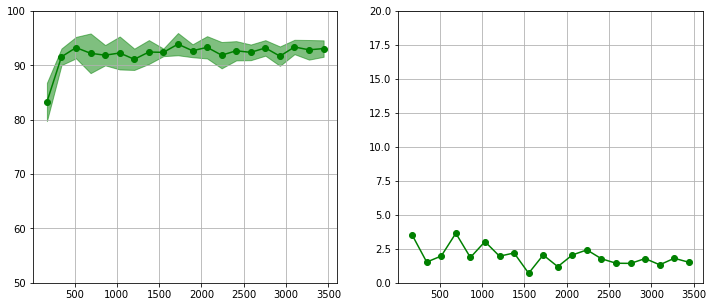

In [25]:
import matplotlib.pyplot as plt

n = np.linspace(.05, 1.0, 20)

X_train_val= pd.DataFrame(df.iloc[:, 1:].values)   #pd.DataFrame(labelled.iloc[:, :].values)
train_sizes =  X_train_val.shape[0]* n
print(train_sizes)
test_scores_mean = np.mean(score_tot, 0)
test_scores_std = np.std(score_tot,0)

_, axes = plt.subplots(1, 2, figsize=(12, 5))

#plt.plot(train_sizes, np.mean(score_tot, 0))

# Plot the learning curve for the deep one class network (TPR versus training dataset size)
axes[0].grid()
axes[0].fill_between(train_sizes, 
                    test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.5,
                         color="g")

axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")

axes[0].set_ylim(50, 100)

# Plot showing the 
axes[1].grid()
axes[1].plot(train_sizes,test_scores_std, 'o-', color="g",
                 label="Cross-validation score")
axes[1].set_ylim(0, 20) 


In [26]:
# Save the evaluation results for comparison with the standrard models

test_scores_mean = np.mean(score_tot, 0)
test_scores_std = np.std(score_tot,0)
deepsvdd_acc  = test_scores_mean 
deep_svdd_std = test_scores_std
deepsvdd_acc 

array([83.27165487, 91.57751938, 93.26407145, 92.21991911, 91.86956522,
       92.27789012, 91.11678463, 92.45230873, 92.39214695, 93.90394338,
       92.68402427, 93.32103134, 91.87158746, 92.68419279, 92.39231547,
       93.20559488, 91.6966633 , 93.38068756, 92.85911695, 93.08897877])

In [ ]:
from torch.utils.data import DataLoader
from sklearn.model_selection import KFold
from sklearn.utils import shuffle

#X_train_val=pd.concat([pd.DataFrame(df1.iloc[:,:].values), pd.DataFrame(np.zeros(df1.iloc[:,:].shape[0]))], axis=1)
X_train_val=pd.DataFrame(labelled.iloc[:, :].values)#df.iloc[:,1:].values)
X_train_val = shuffle(X_train_val)


X_train_val=pd.DataFrame(labelled.iloc[:, :].values)
X_train_val = shuffle(X_train_val)
score_tot=[]

# Perform k-fold cross validation
kf = KFold(n_splits = 5, shuffle=True, random_state=0)
kf.get_n_splits(X_train_val)
scores2=[]
for train, test in kf.split(X_train_val):
  dataset = Pairs_Dataset('', train, test)
  deep_SVDD = deepSVDD.DeepSVDD(cfg.settings['objective'], 1e-5)
  deep_SVDD.set_network(net_name)
  device = 'cuda' if torch.cuda.is_available() else 'cpu'
  pretrain(deep_SVDD, dataset, n_epochs= 90) 
  pred_train = deep_SVDD.train(dataset,n_epochs= 100)
  pred_test, _, scores1, threshold = deep_one_test(deep_SVDD.trainer, dataset, deep_SVDD.net)
  scores2.append(scores1)
  score_mean = np.mean(scores2)
score_tot.append(scores2)
scores2

INFO:root:Starting pretraining...
INFO:root:  Epoch 1/90	 Time: 0.690	 Loss: 560.39452689
INFO:root:  Epoch 2/90	 Time: 0.541	 Loss: 535.11204311
INFO:root:  Epoch 3/90	 Time: 0.541	 Loss: 526.97196307
INFO:root:  Epoch 4/90	 Time: 0.544	 Loss: 519.64668056
INFO:root:  Epoch 5/90	 Time: 0.536	 Loss: 510.35402788
INFO:root:  Epoch 6/90	 Time: 0.538	 Loss: 498.18554252
INFO:root:  Epoch 7/90	 Time: 0.547	 Loss: 482.51798793
INFO:root:  Epoch 8/90	 Time: 0.538	 Loss: 463.14428057
INFO:root:  Epoch 9/90	 Time: 0.538	 Loss: 440.45467268
INFO:root:  Epoch 10/90	 Time: 0.552	 Loss: 414.88384356
INFO:root:  Epoch 11/90	 Time: 0.557	 Loss: 387.47904968
INFO:root:  Epoch 12/90	 Time: 0.560	 Loss: 359.17646572
INFO:root:  Epoch 13/90	 Time: 0.554	 Loss: 331.01261684
INFO:root:  Epoch 14/90	 Time: 0.538	 Loss: 303.67502049
INFO:root:  Epoch 15/90	 Time: 0.540	 Loss: 277.99680001
INFO:root:  Epoch 16/90	 Time: 0.544	 Loss: 254.55469949
INFO:root:  Epoch 17/90	 Time: 0.553	 Loss: 233.38340650
INFO:r

[95.50072568940493,
 95.64586357039188,
 92.74310595065312,
 92.3076923076923,
 94.18604651162791]

In [ ]:
# DeepSVDD accuracy
deep_kfold_acc = scores2
deep_kfold_acc

[95.50072568940493,
 95.64586357039188,
 92.74310595065312,
 92.3076923076923,
 94.18604651162791]

In [ ]:
deep_kfold_av_acc = np.mean(deep_kfold_acc, 0)
deep_kfold_av_acc

94.07668680595404

In [ ]:
deep_kfold_std = np.std(deep_kfold_acc, 0)
deep_kfold_std

1.371855782315486

# Models comparison

In [100]:
# Combine all the accuracy scores 
accuracy.append(test_scores_mean_ens)
accuracy.append(deepsvdd_acc)
std.append(test_scores_std_ens)
std.append(deep_svdd_std)

In [101]:
accuracy

[array([92.1041456 , 92.10566229, 92.10599933, 91.81445905, 91.69733738,
        91.58088979, 91.23272666, 92.16043141, 91.4635996 , 91.11577351,
        88.79052915, 90.7677789 , 90.30316818, 90.18722615, 90.47944051,
        91.23356926, 91.64054601, 91.17677789, 90.82844624, 91.92989552]),
 array([77.65419616, 73.93663633, 63.94725312, 76.60802157, 79.91944725,
        84.21149309, 86.06993596, 86.65032019, 85.89720256, 86.36181328,
        86.1289181 , 89.25985844, 91.52157061, 91.23171554, 91.57954162,
        91.46376812, 92.10279744, 91.8124368 , 91.6380182 , 91.75412875]),
 array([84.11122346, 85.09571958, 82.71284125, 85.3281092 , 85.44438827,
        86.31445905, 86.25631951, 86.0239299 , 85.96629592, 85.96579036,
        86.37158746, 89.44405123, 93.73424334, 92.86450961, 92.92197506,
        92.57381193, 92.28395686, 91.70424671, 91.70424671, 91.35608359]),
 array([64.99376475, 64.18368723, 70.97977755, 80.6801483 , 81.02662622,
        87.22885069, 83.74351196, 84.20913381

In [102]:
train_sizes = train_sizes*2  
train_sizes

array([ 136,  274,  412,  550,  688,  826,  962, 1100, 1238, 1376, 1514,
       1652, 1790, 1926, 2064, 2202, 2340, 2478, 2616, 2754])

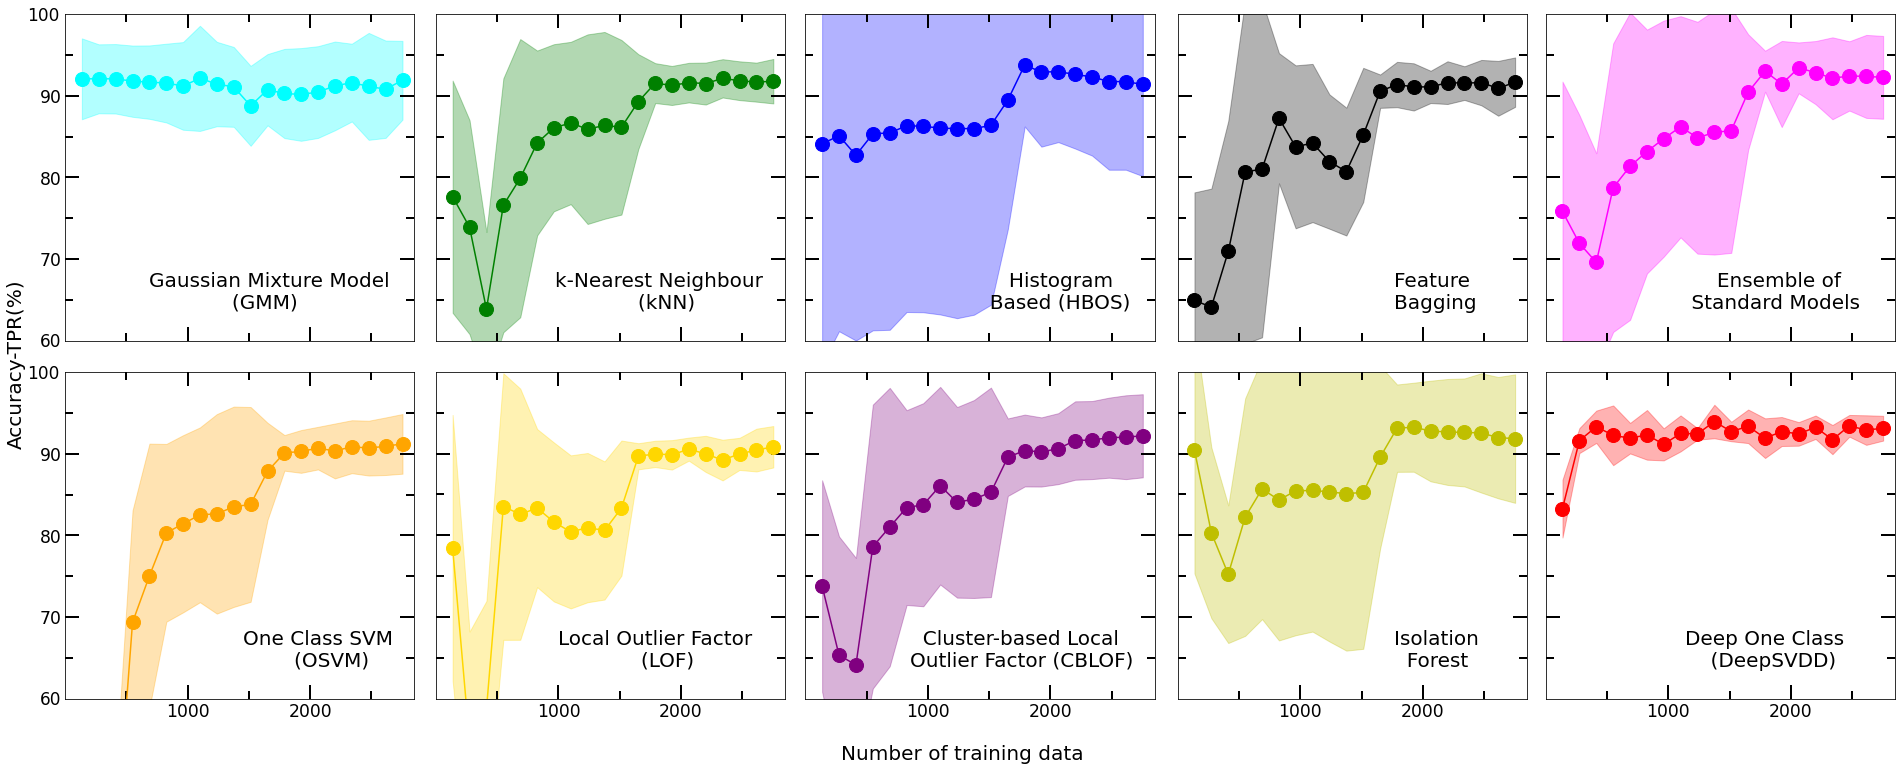

In [103]:
# Construct histograms showing the scores distribution of the labeled/unlabeled data for each algorithm used
from matplotlib import rcParams
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(26,10),nrows=2, ncols=5,constrained_layout=True, gridspec_kw = {'wspace':0.25, 'hspace':0.25})

ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9 = axes.flatten()

colors = ['red', 'tan']
ax0.plot(train_sizes,accuracy[0], 'o-', color="cyan", markersize=14, label= 'Gaussiann Mixture Model (GMM)' )
ax0.fill_between(train_sizes,accuracy[0] - std[0],  accuracy[0] + std[0], alpha=0.3,  color="cyan")
ax0.set_ylim(59.9, 100.1)
#ax0.set_title('Gaussian Mixture Model (GMM)',  fontsize=20, y=1.02) #fontweight='bold',
ax0.set_xlim(130, 2850)
ax0.text(0.24, 0.1, 'Gaussian Mixture Model\n             (GMM)', transform=ax0.transAxes,fontsize=20)
ax0.spines['bottom'].set_color('black')
ax0.spines['top'].set_color('black')
ax0.spines['right'].set_color('black')
ax0.spines['left'].set_color('black')
ax0.tick_params(axis = 'both', which='both', width=2)
ax0.tick_params(axis='x', colors='black')
ax0.tick_params(axis = 'both', which='major', length=14)
ax0.tick_params(axis = 'both', which='minor', length=8, color='black')
ax0.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
major_ticks_x = np.arange(0, 3000, 1000)
minor_ticks_x = np.arange(0, 3000, 500)
major_ticks_y = np.arange(60, 100.1, 10)
minor_ticks_y = np.arange(60, 100.1, 5)
ax0.set_xticks(major_ticks_x)
ax0.set_xticks(minor_ticks_x, minor=True)
ax0.set_yticks(major_ticks_y)
ax0.set_yticks(minor_ticks_y, minor=True)
ax0.set_xticklabels([])
#ax0.set_yticklabels([]) 
ax0.xaxis.get_major_ticks()[0].draw = lambda *args:None
ax0.yaxis.get_major_ticks()[0].draw = lambda *args:None
ax0.yaxis.get_major_ticks()[-1].draw = lambda *args:None
#ax0.yaxis.majorTicks[0].tick1line.set_markersize(0)
#ax0.yaxis.majorTicks[-1].tick1line.set_markersize(0)
ax0.text(-0.0712, -0.015, '60', transform=ax0.transAxes, fontsize= 17)
ax0.text(-0.11, 0.978, '100', transform=ax0.transAxes, fontsize= 17)

# kNN
ax1.plot(train_sizes, accuracy[1], 'o-', color="g", markersize=14, label= 'K Nearest Neighbors (KNN)' )
ax1.fill_between(train_sizes,accuracy[1] - std[1],  accuracy[1] + std[1], alpha=0.3,  color="g")
ax1.set_ylim(60, 100)
#ax1.set_title('k-Nearest Neighbour  (kNN)',  fontsize=20, y=1.02)  # fontweight='bold',
ax1.set_xlim(130, 2850)
ax1.text(0.34, 0.1, 'k-Nearest Neighbour\n             (kNN)', transform=ax1.transAxes,fontsize=20)
ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black')
ax1.spines['right'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.tick_params(axis = 'both', which='both', width=2)
ax1.tick_params(axis='x', colors='black')
ax1.tick_params(axis = 'both', which='major', length=14)
ax1.tick_params(axis = 'both', which='minor', length=8, color='black')
ax1.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
major_ticks_x = np.arange(0, 3000, 1000)
minor_ticks_x = np.arange(0, 3000, 500)
major_ticks_y = np.arange(60, 100, 10)
minor_ticks_y = np.arange(60, 100, 5)
ax1.set_xticks(major_ticks_x)
ax1.set_xticks(minor_ticks_x, minor=True)
ax1.set_yticks(major_ticks_y)
ax1.set_yticks(minor_ticks_y, minor=True)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.xaxis.get_major_ticks()[0].draw = lambda *args:None
ax1.yaxis.get_major_ticks()[0].draw = lambda *args:None

# HBOS 
ax2.plot(train_sizes, accuracy[2], 'o-', color="b",markersize=14, label= 'Histogram-base Outlier Detection (HBOS)' )
ax2.fill_between(train_sizes, accuracy[2] - std[2],  accuracy[2] + std[2], alpha=0.3,  color="b")
ax2.set_ylim(60, 100)
#ax2.set_title('Histogram Based (HBOS)', fontsize=20, y=1.02)  #fontweight='bold', 
ax2.set_xlim(130, 2850)
ax2.text(0.49, 0.1, '     Histogram\n  Based (HBOS)', transform=ax2.transAxes,fontsize=20)
ax2.spines['bottom'].set_color('black')
ax2.spines['top'].set_color('black')
ax2.spines['right'].set_color('black')
ax2.spines['left'].set_color('black')
ax2.tick_params(axis = 'both', which='both', width=2)
ax2.tick_params(axis='x', colors='black')
ax2.tick_params(axis = 'both', which='major', length=14)
ax2.tick_params(axis = 'both', which='minor', length=8, color='black')
ax2.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
major_ticks_x = np.arange(0, 3000, 1000)
minor_ticks_x = np.arange(0, 3000, 500)
major_ticks_y = np.arange(60, 100, 10)
minor_ticks_y = np.arange(60, 100, 5)
ax2.set_xticks(major_ticks_x)
ax2.set_xticks(minor_ticks_x, minor=True)
ax2.set_yticks(major_ticks_y)
ax2.set_yticks(minor_ticks_y, minor=True)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.xaxis.get_major_ticks()[0].draw = lambda *args:None
ax2.yaxis.get_major_ticks()[0].draw = lambda *args:None

# Feature Bagging
ax3.plot(train_sizes,accuracy[3], 'o-', color="black", markersize=14, label= 'Feature Bagging' )
ax3.fill_between(train_sizes, accuracy[3] - std[3],  accuracy[3] + std[3], alpha=0.3,  color="black")
ax3.set_ylim(60, 100)
#ax3.set_title('Feature Bagging', fontsize=20, y=1.02)  # fontweight='bold',
ax3.set_xlim(130, 2850)
ax3.text(0.62, 0.1, 'Feature\nBagging', transform=ax3.transAxes,fontsize=20)
ax3.spines['bottom'].set_color('black')
ax3.spines['top'].set_color('black')
ax3.spines['right'].set_color('black')
ax3.spines['left'].set_color('black')
ax3.tick_params(axis = 'both', which='both', width=2)
ax3.tick_params(axis='x', colors='black')
ax3.tick_params(axis = 'both', which='major', length=14)
ax3.tick_params(axis = 'both', which='minor', length=8, color='black')
ax3.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
major_ticks_x = np.arange(0, 3000, 1000)
minor_ticks_x = np.arange(0, 3000, 500)
major_ticks_y = np.arange(60, 100, 10)
minor_ticks_y = np.arange(60, 100, 5)
ax3.set_xticks(major_ticks_x)
ax3.set_xticks(minor_ticks_x, minor=True)
ax3.set_yticks(major_ticks_y)
ax3.set_yticks(minor_ticks_y, minor=True)
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax3.xaxis.get_major_ticks()[0].draw = lambda *args:None
ax3.yaxis.get_major_ticks()[0].draw = lambda *args:None

# Isolation Forest
ax8.plot(train_sizes,accuracy[4], 'o-', color="y",markersize=14, label= 'Isolation Forest' )
ax8.fill_between(train_sizes,accuracy[4] - std[4],  accuracy[4] + std[4], alpha=0.3,  color="y")
ax8.set_ylim(60, 100)
#ax8.set_title('Isolation Forest',  fontsize=20, y=1.02)  #fontweight='bold',
ax8.set_xlim(130, 2850)
ax8.text(0.62, 0.1, 'Isolation\n  Forest', transform=ax8.transAxes,fontsize=20)
ax8.spines['bottom'].set_color('black')
ax8.spines['top'].set_color('black')
ax8.spines['right'].set_color('black')
ax8.spines['left'].set_color('black')
ax8.tick_params(axis = 'both', which='both', width=2)
ax8.tick_params(axis='x', colors='black')
ax8.tick_params(axis = 'both', which='major', length=14)
ax8.tick_params(axis = 'both', which='minor', length=8, color='black')
ax8.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
major_ticks_x = np.arange(0, 3000, 1000)
minor_ticks_x = np.arange(0, 3000, 500)
major_ticks_y = np.arange(60, 100, 10)
minor_ticks_y = np.arange(60, 100, 5)
ax8.set_xticks(major_ticks_x)
ax8.set_xticks(minor_ticks_x, minor=True)
ax8.set_yticks(major_ticks_y)
ax8.set_yticks(minor_ticks_y, minor=True)
ax8.set_yticklabels([])
#ax8.set_xticklabels([])  #
ax8.xaxis.get_major_ticks()[0].draw = lambda *args:None
ax8.yaxis.get_major_ticks()[0].draw = lambda *args:None

# OCSVM
ax5.plot(train_sizes, accuracy[5], 'o-', color="orange", markersize= 14, label= 'One class SVM (OCSVM)' )
ax5.fill_between(train_sizes, accuracy[5]- std[5],  accuracy[5] + std[5], alpha=0.3,  color="orange")
ax5.set_ylim(59.9, 100.1)
#ax5.set_title('One Class SVM (OSVM)',fontsize=20, y=1.02) # fontweight='bold', 
ax5.set_xlim(130, 2850)
ax5.text(0.51, 0.1, 'One Class SVM\n        (OSVM)', transform=ax5.transAxes,fontsize=20)
ax5.spines['bottom'].set_color('black')
ax5.spines['top'].set_color('black')
ax5.spines['right'].set_color('black')
ax5.spines['left'].set_color('black')
ax5.tick_params(axis = 'both', which='both', width=2)
ax5.tick_params(axis='x', colors='black')
ax5.tick_params(axis = 'both', which='major', length=14)
ax5.tick_params(axis = 'both', which='minor', length=8, color='black')
ax5.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
major_ticks_x = np.arange(0, 3000, 1000)
minor_ticks_x = np.arange(0, 3000, 500)
major_ticks_y = np.arange(60, 100.1, 10)
minor_ticks_y = np.arange(60, 100.1, 5)
ax5.set_xticks(major_ticks_x)
ax5.set_xticks(minor_ticks_x, minor=True)
ax5.set_yticks(major_ticks_y)
ax5.set_yticks(minor_ticks_y, minor=True)
ax5.xaxis.get_major_ticks()[0].draw = lambda *args:None
ax5.yaxis.get_major_ticks()[0].draw = lambda *args:None
#ax5.set_xticklabels([])
#ax5.set_yticklabels([])
#ax5.yaxis.majorTicks[0].tick1line.set_markersize(0)
#ax5.yaxis.majorTicks[-1].tick1line.set_markersize(0)
ax5.yaxis.get_major_ticks()[-1].draw = lambda *args:None
ax5.text(-0.0712, -0.015, '60', transform=ax5.transAxes, fontsize= 17)
ax5.text(-0.11, 0.978, '100', transform=ax5.transAxes, fontsize= 17)

# LOF
ax6.plot(train_sizes, accuracy[6], 'o-', color="gold", markersize=14,label= 'Local Outlier Factor (LOF)' )
ax6.fill_between(train_sizes,accuracy[6] - std[6],  accuracy[6] + std[6], alpha=0.3,  color="gold")
ax6.set_ylim(60, 100)
#ax6.set_title('Local Outlier Factor (LOF)',fontsize=20, y=1.02) # fontweight='bold', 
ax6.set_xlim(130, 2850)
ax6.text(0.35, 0.1, 'Local Outlier Factor\n             (LOF)', transform=ax6.transAxes,fontsize=20)
ax6.spines['bottom'].set_color('black')
ax6.spines['top'].set_color('black')
ax6.spines['right'].set_color('black')
ax6.spines['left'].set_color('black')
ax6.tick_params(axis = 'both', which='both', width=2)
ax6.tick_params(axis='x', colors='black')
ax6.tick_params(axis = 'both', which='major', length=14)
ax6.tick_params(axis = 'both', which='minor', length=8, color='black')
ax6.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
major_ticks_x = np.arange(0, 3000, 1000)
minor_ticks_x = np.arange(0, 3000, 500)
major_ticks_y = np.arange(60, 100, 10)
minor_ticks_y = np.arange(60, 100, 5)
ax6.set_xticks(major_ticks_x)
ax6.set_xticks(minor_ticks_x, minor=True)
ax6.set_yticks(major_ticks_y)
ax6.set_yticks(minor_ticks_y, minor=True)
ax6.set_yticklabels([])
#ax6.set_xticklabels([])
ax6.xaxis.get_major_ticks()[0].draw = lambda *args:None
ax6.yaxis.get_major_ticks()[0].draw = lambda *args:None

# CBLOF
ax7.plot(train_sizes, accuracy[7], 'o-', color="purple",markersize= 14, label= 'Cluster Based Local Outlier Factor(CBLOF)' )
ax7.fill_between(train_sizes,accuracy[7] - std[7], accuracy[7] + std[7], alpha=0.3,  color="purple")
ax7.set_ylim(60, 100)
ax7.set_xlim(130, 2850)
ax7.text(0.3, 0.1, '  Cluster-based Local\nOutlier Factor (CBLOF)', transform=ax7.transAxes,fontsize=20)
ax7.spines['bottom'].set_color('black')
ax7.spines['top'].set_color('black')
ax7.spines['right'].set_color('black')
ax7.spines['left'].set_color('black')
ax7.tick_params(axis = 'both', which='both', width=2)
ax7.tick_params(axis='x', colors='black')
ax7.tick_params(axis = 'both', which='major', length=14)
ax7.tick_params(axis = 'both', which='minor', length=8, color='black')
ax7.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
major_ticks_x = np.arange(0, 3000, 1000)
minor_ticks_x = np.arange(0, 3000, 500)
major_ticks_y = np.arange(60, 100, 10)
minor_ticks_y = np.arange(60, 100, 5)
ax7.set_xticks(major_ticks_x)
ax7.set_xticks(minor_ticks_x, minor=True)
ax7.set_yticks(major_ticks_y)
ax7.set_yticks(minor_ticks_y, minor=True)
ax7.set_yticklabels([])
#ax7.set_xticklabels([])
ax7.xaxis.get_major_ticks()[0].draw = lambda *args:None
ax7.yaxis.get_major_ticks()[0].draw = lambda *args:None
ax7.xaxis.get_major_ticks()[0].draw = lambda *args:None
ax7.yaxis.get_major_ticks()[0].draw = lambda *args:None

# DeepSVDD
ax9.plot(train_sizes, accuracy[9], 'o-', color="r",markersize =14, label= 'DeepSVDD')
ax9.fill_between(train_sizes, accuracy[9] - std[9],  accuracy[9] + std[9], alpha=0.3,  color='r')
ax9.set_ylim(60, 100)
ax9.set_xlim(130, 2850)
#ax9.set_title('DeepSVDD', fontsize=20,  y=1.02) # fontweight='bold',
ax9.text(0.4, 0.1, 'Deep One Class\n    (DeepSVDD)', transform=ax9.transAxes,fontsize=20)
ax9.spines['bottom'].set_color('black')
ax9.spines['top'].set_color('black')
ax9.spines['right'].set_color('black')
ax9.spines['left'].set_color('black')
ax9.tick_params(axis = 'both', which='both', width=2)
ax9.tick_params(axis='x', colors='black')
ax9.tick_params(axis = 'both', which='major', length=14)
ax9.tick_params(axis = 'both', which='minor', length=8, color='black')
ax9.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
major_ticks_x = np.arange(0, 3000, 1000)
minor_ticks_x = np.arange(0, 3000, 500)
major_ticks_y = np.arange(60, 100, 10)
minor_ticks_y = np.arange(60, 100, 5)
ax9.set_xticks(major_ticks_x)
ax9.set_xticks(minor_ticks_x, minor=True)
ax9.set_yticks(major_ticks_y)
ax9.set_yticks(minor_ticks_y, minor=True)
ax9.set_yticklabels([])
#ax9.set_xticklabels([])
ax9.xaxis.get_major_ticks()[0].draw = lambda *args:None
ax9.yaxis.get_major_ticks()[0].draw = lambda *args:None


# Ensemble
ax4.plot(train_sizes, accuracy[8], 'o-', markersize=14, color="magenta", label='Ensemble') 
ax4.fill_between(train_sizes, accuracy[8] - std[8],  accuracy[8] + std[8], alpha=0.3,  color="magenta")
ax4.set_ylim(60, 100)
ax4.set_xlim(130, 2850)
#ax4.set_title('Ensemble of Standard Models',fontsize=20, y=1.02 ) # fontweight='bold', 
ax4.text(0.4, 0.1, '     Ensemble of\n Standard Models', transform=ax4.transAxes,fontsize=20)
ax4.spines['bottom'].set_color('black')
ax4.spines['top'].set_color('black')
ax4.spines['right'].set_color('black')
ax4.spines['left'].set_color('black')
ax4.tick_params(axis = 'both', which='both', width=2)
ax4.tick_params(axis='x', colors='black')
ax4.tick_params(axis = 'both', which='major', length=14)
ax4.tick_params(axis = 'both', which='minor', length=8, color='black')
ax4.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
major_ticks_x = np.arange(0, 3000, 1000)
minor_ticks_x = np.arange(0, 3000, 500)
major_ticks_y = np.arange(60, 100, 10)
minor_ticks_y = np.arange(60, 100, 5)
ax4.set_xticks(major_ticks_x)
ax4.set_xticks(minor_ticks_x, minor=True)
ax4.set_yticks(major_ticks_y)
ax4.set_yticks(minor_ticks_y, minor=True)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.xaxis.get_major_ticks()[0].draw = lambda *args:None
ax4.yaxis.get_major_ticks()[0].draw = lambda *args:None


import matplotlib.font_manager
rcParams["font.weight"] = "normal"
rcParams["axes.labelweight"] = "normal"
rcParams['font.family'] = 'sans-serif'
rcParams["font.sans-serif"] = "Helvetica"
rcParams["axes.labelsize"] = "xx-large"
rcParams["axes.labelweight"]= "bold"
rcParams["xtick.labelsize"] = "xx-large"
rcParams["ytick.labelsize"] = "xx-large"
rcParams['axes.facecolor'] = 'white'
rcParams['axes.grid']=False
rcParams['patch.edgecolor'] = 'black'


#fig.tight_layout()
fig.text(0.5, -0.05, 'Number of training data', ha='center',fontsize=20 )
fig.text(-0.01, 0.5, 'Accuracy-TPR(%)', va='center', rotation='vertical', fontsize=20)

#plt.savefig('figure4_new.png', rasterized=True,  bbox_inches="tight", dpi=600)
plt.show()

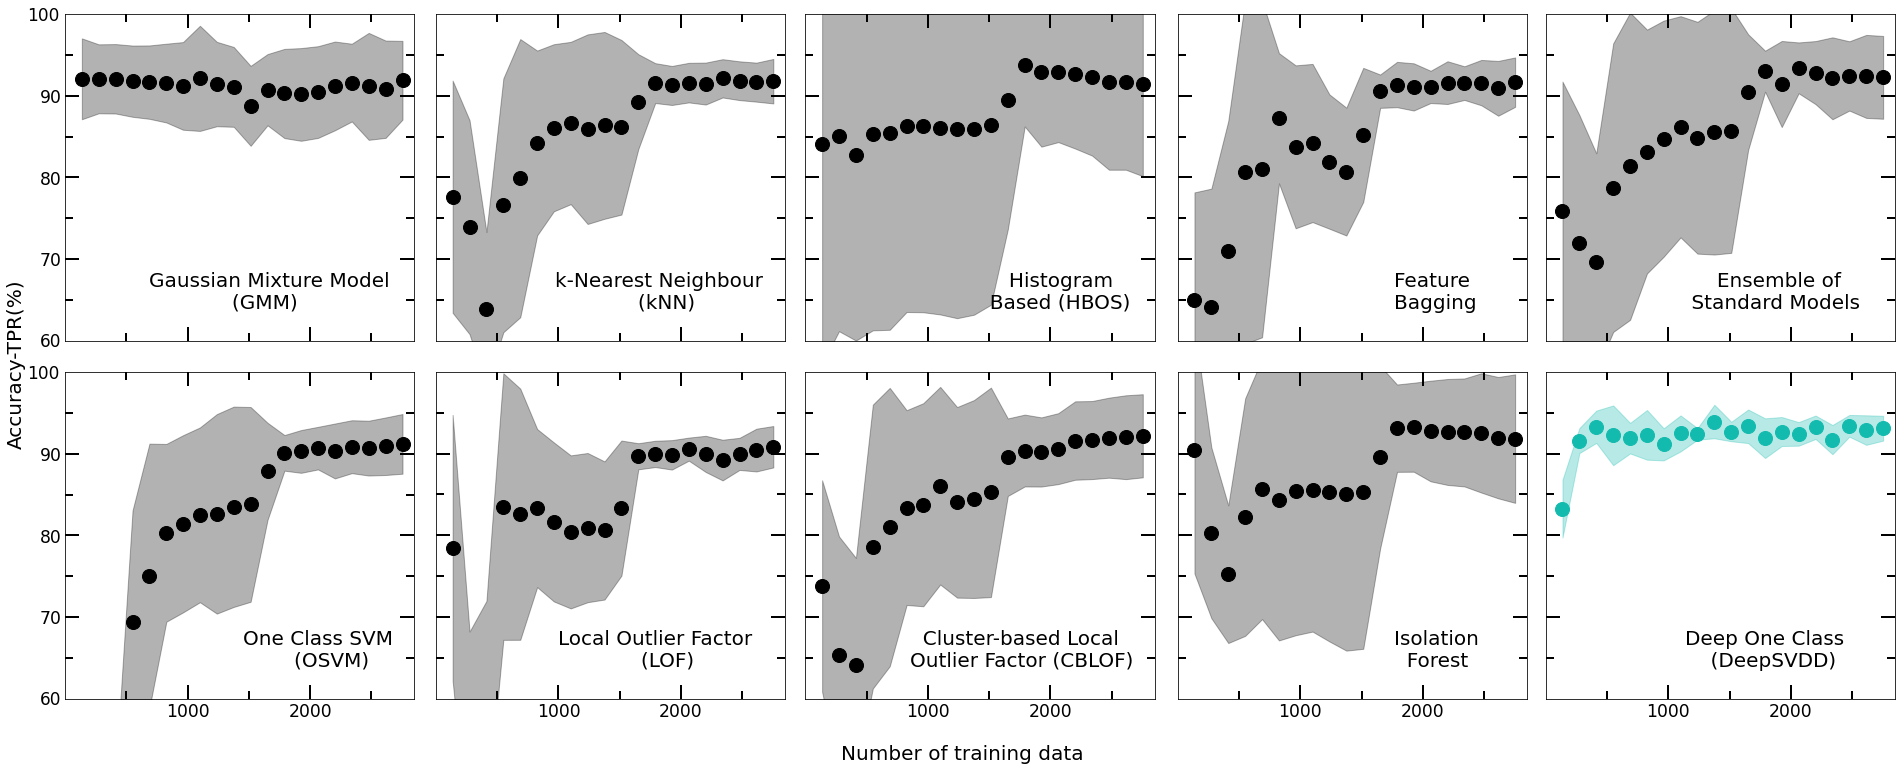

In [104]:
# Construct histograms showing the scores distribution of the labeled/unlabeled data for each algorithm used
from matplotlib import rcParams
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(26,10),nrows=2, ncols=5,constrained_layout=True, gridspec_kw = {'wspace':0.25, 'hspace':0.25})

ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9 = axes.flatten()

colors = ['red', 'tan']
ax0.plot(train_sizes,accuracy[0], 'o', color="black", markersize=14, label= 'Gaussiann Mixture Model (GMM)' )
ax0.fill_between(train_sizes,accuracy[0] - std[0],  accuracy[0] + std[0], alpha=0.3,  color="black")
ax0.set_ylim(59.9, 100.1)
#ax0.set_title('Gaussian Mixture Model (GMM)',  fontsize=20, y=1.02) #fontweight='bold',
ax0.set_xlim(130, 2850)
ax0.text(0.24, 0.1, 'Gaussian Mixture Model\n             (GMM)', transform=ax0.transAxes,fontsize=20)
ax0.spines['bottom'].set_color('black')
ax0.spines['top'].set_color('black')
ax0.spines['right'].set_color('black')
ax0.spines['left'].set_color('black')
ax0.tick_params(axis = 'both', which='both', width=2)
ax0.tick_params(axis='x', colors='black')
ax0.tick_params(axis = 'both', which='major', length=14)
ax0.tick_params(axis = 'both', which='minor', length=8, color='black')
ax0.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
major_ticks_x = np.arange(0, 3000, 1000)
minor_ticks_x = np.arange(0, 3000, 500)
major_ticks_y = np.arange(60, 100.1, 10)
minor_ticks_y = np.arange(60, 100.1, 5)
ax0.set_xticks(major_ticks_x)
ax0.set_xticks(minor_ticks_x, minor=True)
ax0.set_yticks(major_ticks_y)
ax0.set_yticks(minor_ticks_y, minor=True)
ax0.set_xticklabels([])
#ax0.set_yticklabels([]) 
ax0.xaxis.get_major_ticks()[0].draw = lambda *args:None
ax0.yaxis.get_major_ticks()[0].draw = lambda *args:None
ax0.yaxis.get_major_ticks()[-1].draw = lambda *args:None
#ax0.yaxis.majorTicks[0].tick1line.set_markersize(0)
#ax0.yaxis.majorTicks[-1].tick1line.set_markersize(0)
ax0.text(-0.0712, -0.015, '60', transform=ax0.transAxes, fontsize= 17)
ax0.text(-0.11, 0.978, '100', transform=ax0.transAxes, fontsize= 17)

# kNN
ax1.plot(train_sizes, accuracy[1], 'o', color="black", markersize=14, label= 'K Nearest Neighbors (KNN)' )
ax1.fill_between(train_sizes,accuracy[1] - std[1],  accuracy[1] + std[1], alpha=0.3,  color="black")
ax1.set_ylim(60, 100)
#ax1.set_title('k-Nearest Neighbour  (kNN)',  fontsize=20, y=1.02)  # fontweight='bold',
ax1.set_xlim(130, 2850)
ax1.text(0.34, 0.1, 'k-Nearest Neighbour\n             (kNN)', transform=ax1.transAxes,fontsize=20)
ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black')
ax1.spines['right'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.tick_params(axis = 'both', which='both', width=2)
ax1.tick_params(axis='x', colors='black')
ax1.tick_params(axis = 'both', which='major', length=14)
ax1.tick_params(axis = 'both', which='minor', length=8, color='black')
ax1.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
major_ticks_x = np.arange(0, 3000, 1000)
minor_ticks_x = np.arange(0, 3000, 500)
major_ticks_y = np.arange(60, 100, 10)
minor_ticks_y = np.arange(60, 100, 5)
ax1.set_xticks(major_ticks_x)
ax1.set_xticks(minor_ticks_x, minor=True)
ax1.set_yticks(major_ticks_y)
ax1.set_yticks(minor_ticks_y, minor=True)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.xaxis.get_major_ticks()[0].draw = lambda *args:None
ax1.yaxis.get_major_ticks()[0].draw = lambda *args:None

# HBOS 
ax2.plot(train_sizes, accuracy[2], 'o', color="black",markersize=14, label= 'Histogram-base Outlier Detection (HBOS)' )
ax2.fill_between(train_sizes, accuracy[2] - std[2],  accuracy[2] + std[2], alpha=0.3,  color="black")
ax2.set_ylim(60, 100)
#ax2.set_title('Histogram Based (HBOS)', fontsize=20, y=1.02)  #fontweight='bold', 
ax2.set_xlim(130, 2850)
ax2.text(0.49, 0.1, '     Histogram\n  Based (HBOS)', transform=ax2.transAxes,fontsize=20)
ax2.spines['bottom'].set_color('black')
ax2.spines['top'].set_color('black')
ax2.spines['right'].set_color('black')
ax2.spines['left'].set_color('black')
ax2.tick_params(axis = 'both', which='both', width=2)
ax2.tick_params(axis='x', colors='black')
ax2.tick_params(axis = 'both', which='major', length=14)
ax2.tick_params(axis = 'both', which='minor', length=8, color='black')
ax2.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
major_ticks_x = np.arange(0, 3000, 1000)
minor_ticks_x = np.arange(0, 3000, 500)
major_ticks_y = np.arange(60, 100, 10)
minor_ticks_y = np.arange(60, 100, 5)
ax2.set_xticks(major_ticks_x)
ax2.set_xticks(minor_ticks_x, minor=True)
ax2.set_yticks(major_ticks_y)
ax2.set_yticks(minor_ticks_y, minor=True)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.xaxis.get_major_ticks()[0].draw = lambda *args:None
ax2.yaxis.get_major_ticks()[0].draw = lambda *args:None

# Feature Bagging
ax3.plot(train_sizes,accuracy[3], 'o', color="black", markersize=14, label= 'Feature Bagging' )
ax3.fill_between(train_sizes, accuracy[3] - std[3],  accuracy[3] + std[3], alpha=0.3,  color="black")
ax3.set_ylim(60, 100)
#ax3.set_title('Feature Bagging', fontsize=20, y=1.02)  # fontweight='bold',
ax3.set_xlim(130, 2850)
ax3.text(0.62, 0.1, 'Feature\nBagging', transform=ax3.transAxes,fontsize=20)
ax3.spines['bottom'].set_color('black')
ax3.spines['top'].set_color('black')
ax3.spines['right'].set_color('black')
ax3.spines['left'].set_color('black')
ax3.tick_params(axis = 'both', which='both', width=2)
ax3.tick_params(axis='x', colors='black')
ax3.tick_params(axis = 'both', which='major', length=14)
ax3.tick_params(axis = 'both', which='minor', length=8, color='black')
ax3.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
major_ticks_x = np.arange(0, 3000, 1000)
minor_ticks_x = np.arange(0, 3000, 500)
major_ticks_y = np.arange(60, 100, 10)
minor_ticks_y = np.arange(60, 100, 5)
ax3.set_xticks(major_ticks_x)
ax3.set_xticks(minor_ticks_x, minor=True)
ax3.set_yticks(major_ticks_y)
ax3.set_yticks(minor_ticks_y, minor=True)
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax3.xaxis.get_major_ticks()[0].draw = lambda *args:None
ax3.yaxis.get_major_ticks()[0].draw = lambda *args:None

# Isolation Forest
ax8.plot(train_sizes,accuracy[4], 'o', color="black",markersize=14, label= 'Isolation Forest' )
ax8.fill_between(train_sizes,accuracy[4] - std[4],  accuracy[4] + std[4], alpha=0.3,  color="black")
ax8.set_ylim(60, 100)
#ax8.set_title('Isolation Forest',  fontsize=20, y=1.02)  #fontweight='bold',
ax8.set_xlim(130, 2850)
ax8.text(0.62, 0.1, 'Isolation\n  Forest', transform=ax8.transAxes,fontsize=20)
ax8.spines['bottom'].set_color('black')
ax8.spines['top'].set_color('black')
ax8.spines['right'].set_color('black')
ax8.spines['left'].set_color('black')
ax8.tick_params(axis = 'both', which='both', width=2)
ax8.tick_params(axis='x', colors='black')
ax8.tick_params(axis = 'both', which='major', length=14)
ax8.tick_params(axis = 'both', which='minor', length=8, color='black')
ax8.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
major_ticks_x = np.arange(0, 3000, 1000)
minor_ticks_x = np.arange(0, 3000, 500)
major_ticks_y = np.arange(60, 100, 10)
minor_ticks_y = np.arange(60, 100, 5)
ax8.set_xticks(major_ticks_x)
ax8.set_xticks(minor_ticks_x, minor=True)
ax8.set_yticks(major_ticks_y)
ax8.set_yticks(minor_ticks_y, minor=True)
ax8.set_yticklabels([])
#ax8.set_xticklabels([])  #
ax8.xaxis.get_major_ticks()[0].draw = lambda *args:None
ax8.yaxis.get_major_ticks()[0].draw = lambda *args:None

# OCSVM
ax5.plot(train_sizes, accuracy[5], 'o', color="black", markersize= 14, label= 'One class SVM (OCSVM)' )
ax5.fill_between(train_sizes, accuracy[5]- std[5],  accuracy[5] + std[5], alpha=0.3,  color="black")
ax5.set_ylim(59.9, 100.1)
#ax5.set_title('One Class SVM (OSVM)',fontsize=20, y=1.02) # fontweight='bold', 
ax5.set_xlim(130, 2850)
ax5.text(0.51, 0.1, 'One Class SVM\n        (OSVM)', transform=ax5.transAxes,fontsize=20)
ax5.spines['bottom'].set_color('black')
ax5.spines['top'].set_color('black')
ax5.spines['right'].set_color('black')
ax5.spines['left'].set_color('black')
ax5.tick_params(axis = 'both', which='both', width=2)
ax5.tick_params(axis='x', colors='black')
ax5.tick_params(axis = 'both', which='major', length=14)
ax5.tick_params(axis = 'both', which='minor', length=8, color='black')
ax5.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
major_ticks_x = np.arange(0, 3000, 1000)
minor_ticks_x = np.arange(0, 3000, 500)
major_ticks_y = np.arange(60, 100.1, 10)
minor_ticks_y = np.arange(60, 100.1, 5)
ax5.set_xticks(major_ticks_x)
ax5.set_xticks(minor_ticks_x, minor=True)
ax5.set_yticks(major_ticks_y)
ax5.set_yticks(minor_ticks_y, minor=True)
ax5.xaxis.get_major_ticks()[0].draw = lambda *args:None
ax5.yaxis.get_major_ticks()[0].draw = lambda *args:None
#ax5.set_xticklabels([])
#ax5.set_yticklabels([])
#ax5.yaxis.majorTicks[0].tick1line.set_markersize(0)
#ax5.yaxis.majorTicks[-1].tick1line.set_markersize(0)
ax5.yaxis.get_major_ticks()[-1].draw = lambda *args:None
ax5.text(-0.0712, -0.015, '60', transform=ax5.transAxes, fontsize= 17)
ax5.text(-0.11, 0.978, '100', transform=ax5.transAxes, fontsize= 17)

# LOF
ax6.plot(train_sizes, accuracy[6], 'o', color="black", markersize=14,label= 'Local Outlier Factor (LOF)' )
ax6.fill_between(train_sizes,accuracy[6] - std[6],  accuracy[6] + std[6], alpha=0.3,  color="black")
ax6.set_ylim(60, 100)
#ax6.set_title('Local Outlier Factor (LOF)',fontsize=20, y=1.02) # fontweight='bold', 
ax6.set_xlim(130, 2850)
ax6.text(0.35, 0.1, 'Local Outlier Factor\n             (LOF)', transform=ax6.transAxes,fontsize=20)
ax6.spines['bottom'].set_color('black')
ax6.spines['top'].set_color('black')
ax6.spines['right'].set_color('black')
ax6.spines['left'].set_color('black')
ax6.tick_params(axis = 'both', which='both', width=2)
ax6.tick_params(axis='x', colors='black')
ax6.tick_params(axis = 'both', which='major', length=14)
ax6.tick_params(axis = 'both', which='minor', length=8, color='black')
ax6.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
major_ticks_x = np.arange(0, 3000, 1000)
minor_ticks_x = np.arange(0, 3000, 500)
major_ticks_y = np.arange(60, 100, 10)
minor_ticks_y = np.arange(60, 100, 5)
ax6.set_xticks(major_ticks_x)
ax6.set_xticks(minor_ticks_x, minor=True)
ax6.set_yticks(major_ticks_y)
ax6.set_yticks(minor_ticks_y, minor=True)
ax6.set_yticklabels([])
#ax6.set_xticklabels([])
ax6.xaxis.get_major_ticks()[0].draw = lambda *args:None
ax6.yaxis.get_major_ticks()[0].draw = lambda *args:None

# CBLOF
ax7.plot(train_sizes, accuracy[7], 'o', color="black",markersize= 14, label= 'Cluster Based Local Outlier Factor(CBLOF)' )
ax7.fill_between(train_sizes,accuracy[7] - std[7], accuracy[7] + std[7], alpha=0.3,  color="black")
ax7.set_ylim(60, 100)
ax7.set_xlim(130, 2850)
ax7.text(0.3, 0.1, '  Cluster-based Local\nOutlier Factor (CBLOF)', transform=ax7.transAxes,fontsize=20)
ax7.spines['bottom'].set_color('black')
ax7.spines['top'].set_color('black')
ax7.spines['right'].set_color('black')
ax7.spines['left'].set_color('black')
ax7.tick_params(axis = 'both', which='both', width=2)
ax7.tick_params(axis='x', colors='black')
ax7.tick_params(axis = 'both', which='major', length=14)
ax7.tick_params(axis = 'both', which='minor', length=8, color='black')
ax7.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
major_ticks_x = np.arange(0, 3000, 1000)
minor_ticks_x = np.arange(0, 3000, 500)
major_ticks_y = np.arange(60, 100, 10)
minor_ticks_y = np.arange(60, 100, 5)
ax7.set_xticks(major_ticks_x)
ax7.set_xticks(minor_ticks_x, minor=True)
ax7.set_yticks(major_ticks_y)
ax7.set_yticks(minor_ticks_y, minor=True)
ax7.set_yticklabels([])
#ax7.set_xticklabels([])
ax7.xaxis.get_major_ticks()[0].draw = lambda *args:None
ax7.yaxis.get_major_ticks()[0].draw = lambda *args:None
ax7.xaxis.get_major_ticks()[0].draw = lambda *args:None
ax7.yaxis.get_major_ticks()[0].draw = lambda *args:None

# DeepSVDD
ax9.plot(train_sizes, accuracy[9], 'o', color="#13bbaf",markersize =14, label= 'DeepSVDD')
ax9.fill_between(train_sizes, accuracy[9] - std[9],  accuracy[9] + std[9], alpha=0.3,  color='#13bbaf')
ax9.set_ylim(60, 100)
ax9.set_xlim(130, 2850)
#ax9.set_title('DeepSVDD', fontsize=20,  y=1.02) # fontweight='bold',
ax9.text(0.4, 0.1, 'Deep One Class\n    (DeepSVDD)', transform=ax9.transAxes,fontsize=20)
ax9.spines['bottom'].set_color('black')
ax9.spines['top'].set_color('black')
ax9.spines['right'].set_color('black')
ax9.spines['left'].set_color('black')
ax9.tick_params(axis = 'both', which='both', width=2)
ax9.tick_params(axis='x', colors='black')
ax9.tick_params(axis = 'both', which='major', length=14)
ax9.tick_params(axis = 'both', which='minor', length=8, color='black')
ax9.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
major_ticks_x = np.arange(0, 3000, 1000)
minor_ticks_x = np.arange(0, 3000, 500)
major_ticks_y = np.arange(60, 100, 10)
minor_ticks_y = np.arange(60, 100, 5)
ax9.set_xticks(major_ticks_x)
ax9.set_xticks(minor_ticks_x, minor=True)
ax9.set_yticks(major_ticks_y)
ax9.set_yticks(minor_ticks_y, minor=True)
ax9.set_yticklabels([])
#ax9.set_xticklabels([])
ax9.xaxis.get_major_ticks()[0].draw = lambda *args:None
ax9.yaxis.get_major_ticks()[0].draw = lambda *args:None


# Ensemble
ax4.plot(train_sizes, accuracy[8], 'o', markersize=14, color="black", label='Ensemble') 
ax4.fill_between(train_sizes, accuracy[8] - std[8],  accuracy[8] + std[8], alpha=0.3,  color="black")
ax4.set_ylim(60, 100)
ax4.set_xlim(130, 2850)
#ax4.set_title('Ensemble of Standard Models',fontsize=20, y=1.02 ) # fontweight='bold', 
ax4.text(0.4, 0.1, '     Ensemble of\n Standard Models', transform=ax4.transAxes,fontsize=20)
ax4.spines['bottom'].set_color('black')
ax4.spines['top'].set_color('black')
ax4.spines['right'].set_color('black')
ax4.spines['left'].set_color('black')
ax4.tick_params(axis = 'both', which='both', width=2)
ax4.tick_params(axis='x', colors='black')
ax4.tick_params(axis = 'both', which='major', length=14)
ax4.tick_params(axis = 'both', which='minor', length=8, color='black')
ax4.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
major_ticks_x = np.arange(0, 3000, 1000)
minor_ticks_x = np.arange(0, 3000, 500)
major_ticks_y = np.arange(60, 100, 10)
minor_ticks_y = np.arange(60, 100, 5)
ax4.set_xticks(major_ticks_x)
ax4.set_xticks(minor_ticks_x, minor=True)
ax4.set_yticks(major_ticks_y)
ax4.set_yticks(minor_ticks_y, minor=True)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.xaxis.get_major_ticks()[0].draw = lambda *args:None
ax4.yaxis.get_major_ticks()[0].draw = lambda *args:None


import matplotlib.font_manager
rcParams["font.weight"] = "normal"
rcParams["axes.labelweight"] = "normal"
rcParams['font.family'] = 'sans-serif'
rcParams["font.sans-serif"] = "Helvetica"
rcParams["axes.labelsize"] = "xx-large"
rcParams["axes.labelweight"]= "bold"
rcParams["xtick.labelsize"] = "xx-large"
rcParams["ytick.labelsize"] = "xx-large"
rcParams['axes.facecolor'] = 'white'
rcParams['axes.grid']=False
rcParams['patch.edgecolor'] = 'black'


#fig.tight_layout()
fig.text(0.5, -0.05, 'Number of training data', ha='center',fontsize=20 )
fig.text(-0.01, 0.5, 'Accuracy-TPR(%)', va='center', rotation='vertical', fontsize=20)

#plt.savefig('figure4_new.png', rasterized=True,  bbox_inches="tight", dpi=600)
plt.show()

Text(0.33, -0.05, 'Number of training data')

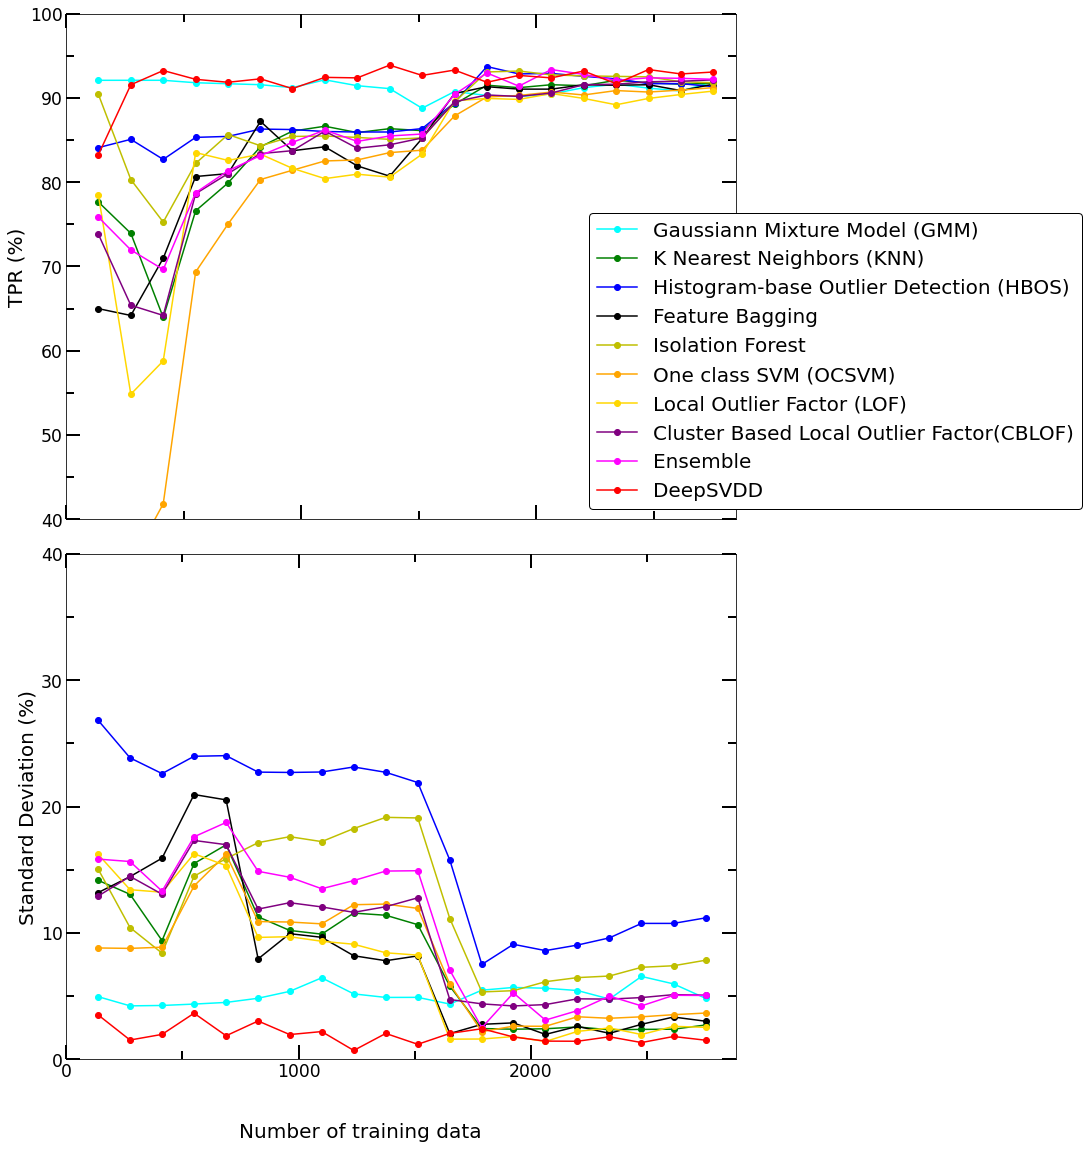

In [105]:
# Construct histograms showing the scores distribution of the labeled/unlabeled data for each algorithm used
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
fig, axes = plt.subplots(figsize=(15,15),nrows=2, ncols=1,constrained_layout=True, gridspec_kw = {'wspace':0.25, 'hspace':0.25})

ax0, ax1= axes.flatten()


ax0.plot(train_sizes,accuracy[0], 'o-', color="cyan", label= 'Gaussiann Mixture Model (GMM)' )
ax0.plot(train_sizes, accuracy[1], 'o-', color="g", label= 'K Nearest Neighbors (KNN)' )
ax0.plot(train_sizes, accuracy[2], 'o-', color="b", label= 'Histogram-base Outlier Detection (HBOS)' )
ax0.plot(train_sizes,accuracy[3], 'o-', color="black", label= 'Feature Bagging' )
ax0.plot(train_sizes,accuracy[4], 'o-', color="y", label= 'Isolation Forest' )
ax0.plot(train_sizes, accuracy[5], 'o-', color="orange", label= 'One class SVM (OCSVM)' )
ax0.plot(train_sizes, accuracy[6], 'o-', color="gold", label= 'Local Outlier Factor (LOF)' )
ax0.plot(train_sizes, accuracy[7], 'o-', color="purple", label= 'Cluster Based Local Outlier Factor(CBLOF)' )
ax0.plot(train_sizes, accuracy[8], 'o-', color="magenta", label='Ensemble') 
ax0.plot(train_sizes, accuracy[9], 'o-', color="red", label= 'DeepSVDD')
ax0.set_ylim(40, 100)
ax0.set_xlim(130, 2850)
#ax0.text(0.24, 0.1, 'Gaussian Mixture Model\n             (GMM)', transform=ax0.transAxes,fontsize=20)
ax0.spines['bottom'].set_color('black')
ax0.spines['top'].set_color('black')
ax0.spines['right'].set_color('black')
ax0.spines['left'].set_color('black')
ax0.tick_params(axis = 'both', which='both', width=2)
ax0.tick_params(axis='x', colors='black')
ax0.tick_params(axis = 'both', which='major', length=14)
ax0.tick_params(axis = 'both', which='minor', length=8, color='black')
ax0.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
major_ticks_x = np.arange(0, 3000, 1000)
minor_ticks_x = np.arange(0, 3000, 500)
major_ticks_y = np.arange(40, 100.1, 10)
minor_ticks_y = np.arange(40, 100.1, 5)
ax0.set_xticks(major_ticks_x)
ax0.set_xticks(minor_ticks_x, minor=True)
ax0.set_yticks(major_ticks_y)
ax0.set_yticks(minor_ticks_y, minor=True)
ax0.set_xticklabels([])
#ax0.set_yticklabels([]) 
ax0.set_ylabel('TPR (%)', fontsize=20)


ax1.set_ylim(0, 40)
ax1.plot(train_sizes, std[0], 'o-', color="cyan", label= 'Gaussiann Mixture Model (GMM)' )
ax1.plot(train_sizes, std[1], 'o-', color="g", label= 'K Nearest Neighbors (KNN)' )
ax1.plot(train_sizes, std[2], 'o-', color="b", label= 'Histogram-base Outlier Detection (HBOS)' )
ax1.plot(train_sizes, std[3], 'o-', color="black", label= 'Feature Bagging' )
ax1.plot(train_sizes, std[4], 'o-', color="y", label= 'Isolation Forest' )
ax1.plot(train_sizes, std[5], 'o-', color="orange", label= 'One class SVM (OCSVM)' )
ax1.plot(train_sizes, std[6], 'o-', color="gold", label= 'Local Outlier Factor (LOF)' )
ax1.plot(train_sizes, std[7], 'o-', color="purple", label= 'Cluster Based Local Outlier Factor(CBLOF)' )
ax1.plot(train_sizes, std[8], 'o-', color="magenta", label= 'Ensemble' )
ax1.plot(train_sizes, std[9], 'o-', color="red", label= 'DeepSVDD')
ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black')
ax1.spines['right'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.tick_params(axis = 'both', which='both', width=2)
ax1.tick_params(axis='x', colors='black')
ax1.tick_params(axis = 'both', which='major', length=14)
ax1.tick_params(axis = 'both', which='minor', length=8, color='black')
ax1.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
major_ticks_x = np.arange(0, 3000, 1000)
minor_ticks_x = np.arange(0, 3000, 500)
major_ticks_y = np.arange(0, 40.1, 10)
minor_ticks_y = np.arange(0, 40.1, 5)
ax1.set_xticks(major_ticks_x)
ax1.set_xticks(minor_ticks_x, minor=True)
ax1.set_yticks(major_ticks_y)
ax1.set_yticks(minor_ticks_y, minor=True)
ax1.set_ylabel('Standard Deviation (%)', fontsize=20)

ax0.legend(prop={'size': 20},  loc=(0.78, 0.02), facecolor='white', framealpha=1, edgecolor='black')

fig.text(0.33, -0.05, 'Number of training data', ha='center',fontsize=20 )
#plt.savefig('learning_curves_si.svg', dpi=300)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


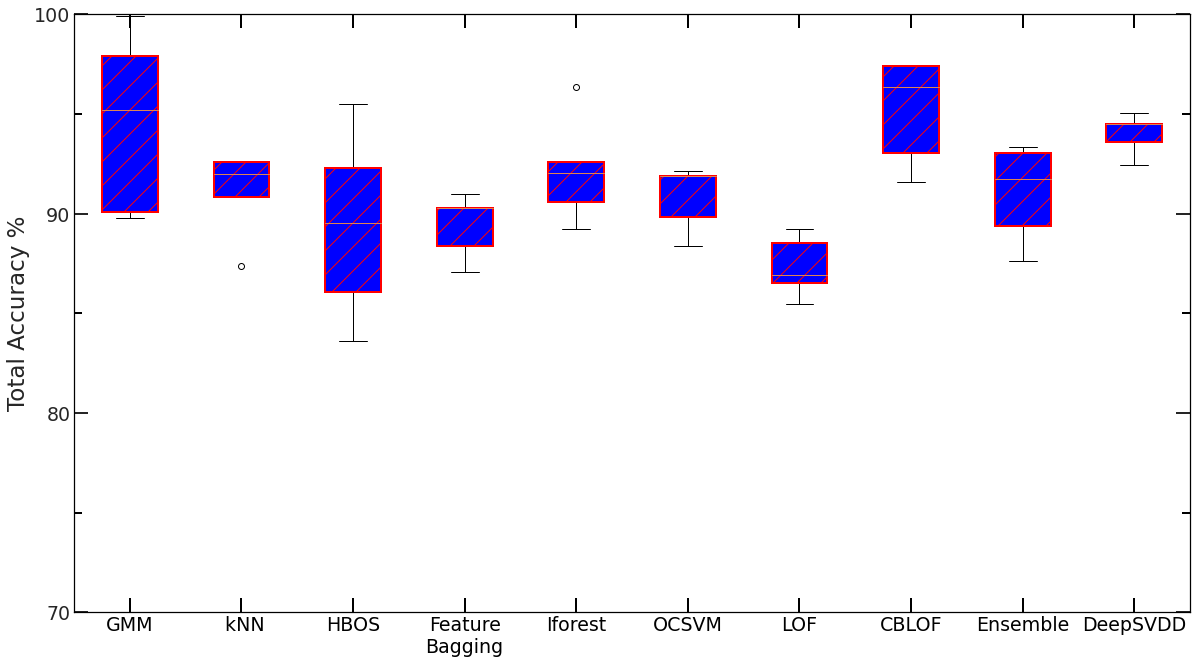

In [ ]:
# Box plot with scores
#Import the accuracies table 

# Accuracy on the known data 
import seaborn as sns
from __future__ import division, print_function
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve

model_acc = pd.read_csv('/content/drive/My Drive/cocrystal_design/data/kfold_accuracy.csv')
data1 = [model_acc.GMM , model_acc.kNN ,model_acc.HBOS  ,model_acc.Feat_bag ,model_acc.Iforest ,model_acc.OCSVM ,model_acc.LOF ,model_acc.CBLOF ,model_acc.Ensemble ,model_acc.DeepSVDD ]

sns.set(rc={'figure.figsize':(20 ,11)})
sns.set_style("whitegrid", {'axes.grid' : False})

fig1, ax1 = plt.subplots()
ax1.set_ylim(70, 100)
ax1.set_yticks([80, 90 ,100])
ax1.set_xticklabels(['GMM', ' kNN', 'HBOS', 'Feature\nBagging',   'Iforest', 'OCSVM',  'LOF', 'CBLOF', 'Ensemble', 'DeepSVDD' ])
ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black')
ax1.spines['right'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.tick_params(axis = 'both', which='both', width=2)
ax1.tick_params(axis='x', colors='black')
ax1.tick_params(axis = 'both', which='major', length=14)
ax1.tick_params(axis = 'both', which='minor', length=8, color='black')
ax1.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
major_ticks_y = np.arange(70, 100.1, 10)
minor_ticks_y = np.arange(70, 100.1, 5)

ax1.set_yticks(major_ticks_y)
ax1.set_yticks(minor_ticks_y, minor=True)
bp0=ax1.boxplot(data1, patch_artist=True)

for box in bp0['boxes']:
    # change outline color
    box.set(color='red', linewidth=2)
    # change fill color
    box.set(facecolor = 'blue' )
    # change hatch
    box.set(hatch = '/')
#plt.xlabel('One class classification models',  fontsize=18)
plt.ylabel('Total Accuracy %', fontsize=23 )
plt.xticks(fontsize=19)
plt.yticks(fontsize=19)
#plt.title('AUC=%.3f,   F1-score=%.3f' % (auc, f1) ,fontsize=18)
ax1.xaxis.label.set_color('black')
ax1.tick_params(axis='x', colors='black')
ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['right'].set_color('black')
#plt.savefig("box_plots.png", dpi=600)




In [ ]:
model_scores = pd.read_csv('/content/drive/My Drive/cocrystal_design/data/model_scores.csv')       
lab_deep_scores = pd.read_csv('/content/drive/My Drive/cocrystal_design/data/labelled_deep.csv')    
unlab_deep_scores = pd.read_csv('/content/drive/My Drive/cocrystal_design/data/unlabelled_deep.csv')     
ensemble_scores = pd.read_csv('/content/drive/My Drive/cocrystal_design/data/ensemble_scores.csv')       

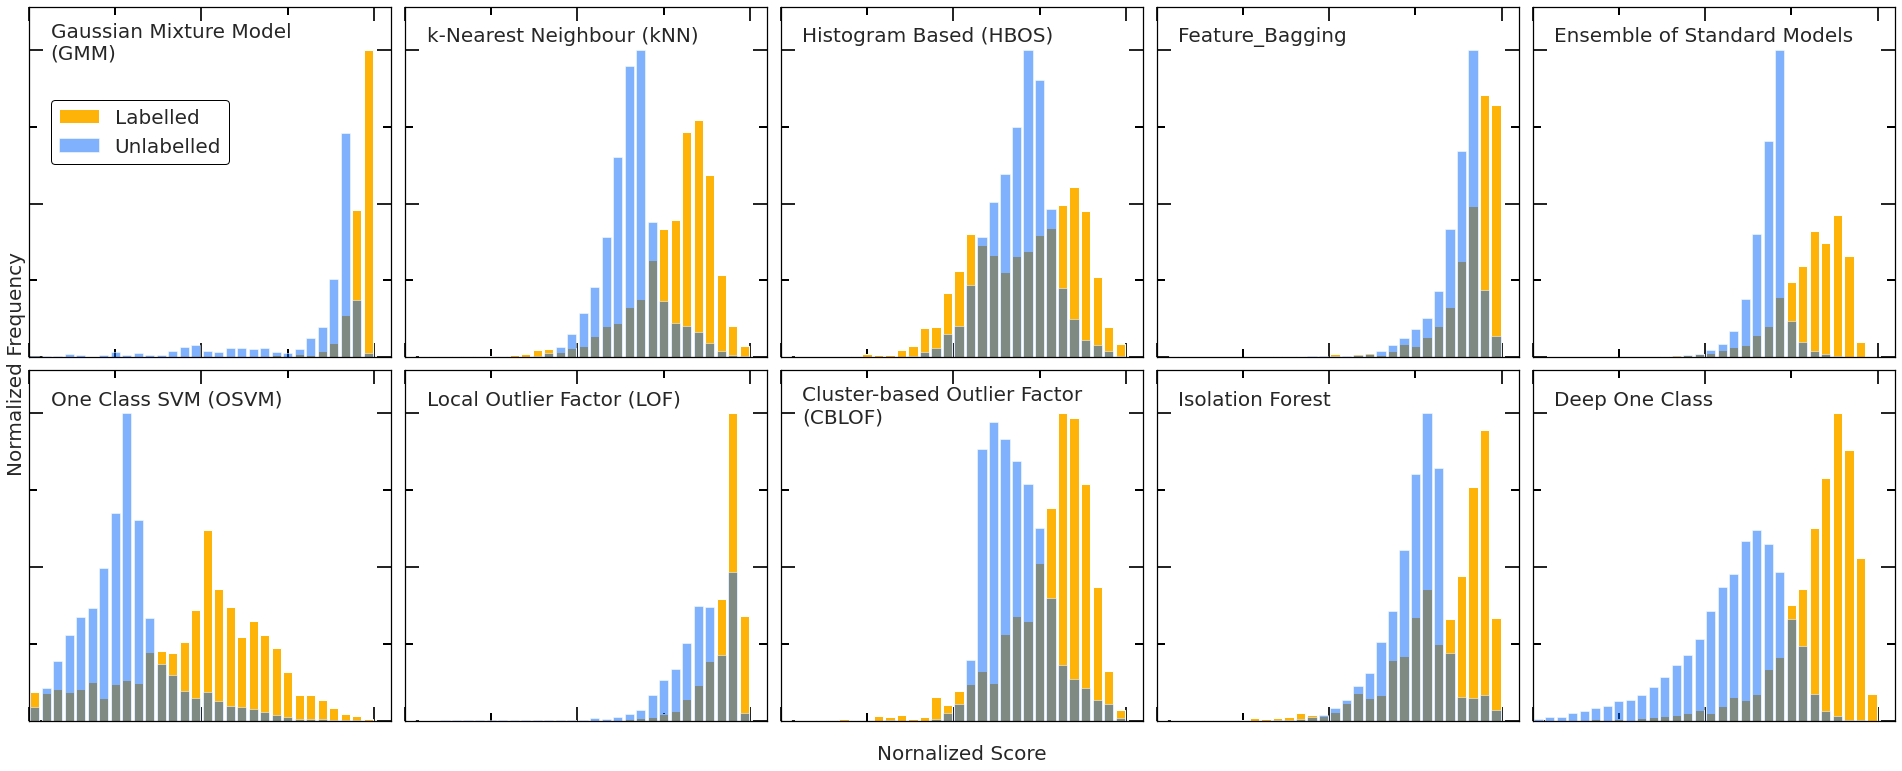

In [ ]:
# Construct histograms showing the scores distribution of the labeled/unlabeled data for each algorithm used
import matplotlib.font_manager
from matplotlib import rcParams
import matplotlib.pyplot as plt


fig, axes = plt.subplots(figsize=(26, 10), nrows=2, ncols=5,
                         constrained_layout=True, gridspec_kw={'wspace': 0.05, 'hspace': 0.1})

ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9 = axes.flatten()

rcParams["font.weight"] = "normal"
rcParams["axes.labelweight"] = "normal"
rcParams['font.family'] = 'sans-serif'
rcParams["font.sans-serif"] = "Helvetica"
rcParams["axes.labelsize"] = "xx-large"
rcParams["axes.labelweight"] = "bold"
rcParams["xtick.labelsize"] = "xx-large"
rcParams["ytick.labelsize"] = "xx-large"


major_ticks_x = np.arange(0, 1.1, 0.5)
minor_ticks_x = np.arange(0, 1.1, 0.25)
major_ticks_y = np.arange(0, 1.1, 0.5)
minor_ticks_y = np.arange(0, 1.1, 0.25)

n_bins = 30


def set_ticks(ax):
    ax.tick_params(axis='both', which='both', direction="in", width=2)
    ax.tick_params(axis='both', which='major', direction="in",  length=14)
    ax.tick_params(axis='both', which='minor', length=8,
                   direction="in",  color='black')
    ax.tick_params(axis='both', which='both', bottom=True,
                  top=True, left=True, right=True, direction="in")
    ax.set_xticks(major_ticks_x)
    ax.set_xticks(minor_ticks_x, minor=True)
    ax.set_yticks(major_ticks_y)
    ax.set_yticks(minor_ticks_y, minor=True)
    #ax.tick_params(axis='both', top='off', bottom='off', left='off', right='off')
    #ax.xaxis.set_ticks_position('none') 
    #ax.yaxis.set_ticks_position('none') 
    #ax.set_xticks([], minor=True)
    #ax.set_yticks([], minor=True)


def set_spines(ax):
    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['left'].set_color('black')


def set_prop(ax):
    ax.axis(aspect='equal')
    ax.set(adjustable='box')  # , aspect='equal')
    ax.set_xlim(0, 1.05)
    ax.set_ylim(0, 1.14)
    ax.grid(False)
    set_spines(ax)
    ax.set_facecolor('xkcd:white')
    ax.axis('on')
    #set_ticks(ax)

def norm_plot(ax, x, y, alpha=1, **kwargs):
    hist, bins = np.histogram(x, **kwargs)
    hist1, _ = np.histogram(y, **kwargs)
    n_max = np.max([hist, hist1])
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    ax.bar(center, hist / n_max, align='center', width = width, alpha=alpha)
    return hist, n_max


def lab_unlab_plot(ax, lab_d, unlab_d, n_bins):
    hist_lab, bins_lab = np.histogram(lab_d, bins=n_bins, density=True, range=(0,1))
    hist_unlab, bins_unlab = np.histogram(unlab_d, bins=n_bins, density=True, range=(0,1))
    n_max = np.max([hist_lab, hist_unlab])
    width_lab = 0.8 * (bins_lab[1] - bins_lab[0])
    width_unlab = 0.8 * (bins_unlab[1] - bins_unlab[0])
    center_lab = (bins_lab[:-1] + bins_lab[1:]) / 2
    center_unlab = (bins_unlab[:-1] + bins_unlab[1:]) / 2
    ax.bar(center_lab, hist_lab / n_max, align='center', width=width_lab, alpha=1, color='#feb308', label = 'Labelled')
    ax.bar(center_unlab, hist_unlab / n_max, align='center', width=width_unlab, alpha=0.5, color='#0165fc', label = 'Unlabelled')



# Gaussian Mixture Model
lab_unlab_plot(ax0, model_scores.gmm1[:3444], model_scores.gmm1[3444:], n_bins)
# ax0.axis(aspect='equal')
ax0.text(0.06, 0.85, 'Gaussian Mixture Model\n(GMM)',
         transform=ax0.transAxes, ha="left", fontsize=20)
#ax0.legend(prop={'size': 20}, loc=(0.02, 0.65), facecolor='white', framealpha=0)
ax0.legend(prop={'size': 20}, loc=(0.06, 0.55), facecolor='white', edgecolor='black', framealpha=1)#,  borderpad=1 ) #shadow=True, fancybox=True, loc=(0.75, -0.15),
ax0.set_xticklabels([])
ax0.set_yticklabels([])

# knn
n_bins = 30
lab_unlab_plot(ax1, model_scores.knn1[:1722], model_scores.knn1[1722:], n_bins)
ax1.text(0.06, 0.9, 'k-Nearest Neighbour (kNN)',
         transform=ax1.transAxes, ha="left", fontsize=20)
#ax1.legend(prop={'size': 20}, loc=(0.02, 0.7), facecolor='white', framealpha=0)
ax1.set_xticklabels([])
ax1.set_yticklabels([])

# HBOS
lab_unlab_plot(ax2, model_scores.hbos1[:1722], model_scores.hbos1[1722:], n_bins)
ax2.text(0.06, 0.9, 'Histogram Based (HBOS)',
         transform=ax2.transAxes, ha="left", fontsize=20)
#ax2.legend(prop={'size': 20}, loc=(0.02, 0.7), facecolor='white', framealpha=0)
ax2.set_xticklabels([])
ax2.set_yticklabels([])

# Feature Bagging
lab_unlab_plot(ax3, model_scores.feat_bag[:1722], model_scores.feat_bag[1722:], n_bins)
ax3.text(0.06, 0.9, 'Feature_Bagging',
         transform=ax3.transAxes, ha="left", fontsize=20)
#ax3.legend(prop={'size': 20}, loc=(0.02, 0.7), facecolor='white', framealpha=0)
ax3.set_xticklabels([])
ax3.set_yticklabels([])

# Isolation Forest
lab_unlab_plot(ax8, model_scores.ifor1[:1722], model_scores.ifor1[1722:], n_bins)
ax8.text(0.06, 0.9, 'Isolation Forest',
         transform=ax8.transAxes, ha="left", fontsize=20)
#ax8.legend(prop={'size': 20}, loc=(0.02, 0.7), facecolor='white', framealpha=0)
ax8.set_xticklabels([])
ax8.set_yticklabels([])

# OCSVM
lab_unlab_plot(ax5, model_scores.ocsvm1[:1722], model_scores.ocsvm1[1722:], n_bins)
ax5.text(0.06, 0.9, 'One Class SVM (OSVM)',
         transform=ax5.transAxes, ha="left", fontsize=20)
#ax5.legend(prop={'size': 20}, loc=(0.02, 0.7), facecolor='white', framealpha=0)
ax5.set_xticklabels([])
ax5.set_yticklabels([])

# LOF
lab_unlab_plot(ax6, model_scores.lof1[:1722], model_scores.lof1[1722:], n_bins)
ax6.text(0.06, 0.9, 'Local Outlier Factor (LOF)',
         transform=ax6.transAxes, ha="left", fontsize=20)
#ax6.legend(prop={'size': 20}, loc=(0.02, 0.65),
 #          facecolor='white', framealpha=0)
ax6.set_xticklabels([])
ax6.set_yticklabels([])


# CBLOF
lab_unlab_plot(ax7, model_scores.cblof1[:1722], model_scores.cblof1[1722:], n_bins)
ax7.text(0.06, 0.85, 'Cluster-based Outlier Factor\n(CBLOF)',
         transform=ax7.transAxes, ha="left", fontsize=20)
#ax7.legend(prop={'size': 20}, loc=(0.02, 0.65),
 #          facecolor='white', framealpha=0)
ax7.set_xticklabels([])
ax7.set_yticklabels([])

# DeepSVDD
lab_unlab_plot(ax9, lab_deep_scores.train_score, unlab_deep_scores.test_score, n_bins)
ax9.text(0.06, 0.9, 'Deep One Class',
         transform=ax9.transAxes, ha="left", fontsize=20)
#ax9.legend(prop={'size': 20}, loc=(0.02, 0.7), facecolor='white', framealpha=0)
ax9.set_xticklabels([])
ax9.set_yticklabels([])

# Ensemble
lab_unlab_plot(ax4, ensemble_scores.ens[:1722], ensemble_scores.ens[1722:], n_bins)
ax4.text(0.06, 0.9, 'Ensemble of Standard Models', 
        transform=ax4.transAxes, ha="left", fontsize=20)
#ax4.legend(prop={'size': 20}, loc=(0.02, 0.7), facecolor='white', framealpha=0)
ax4.set_xticklabels([])
ax4.set_yticklabels([])

for ax in axes.flatten():
  set_prop(ax)
  set_ticks(ax)

fig.tight_layout()


fig.text(0.5, -0.05, 'Nornalized Score', ha='center',fontsize=20 )
fig.text(-0.01, 0.5, 'Normalized Frequency', va='center', rotation='vertical', fontsize=20)
#plt.savefig('figure2_new.png', rasterized=True,  bbox_inches="tight", dpi=600)

plt.show()


In [ ]:
# Scatterplot comparing the scores of the ensemble and the deep neural network

lab_deep_scores = pd.read_csv('/content/drive/My Drive/cocrystal_design/data/labelled_deep.csv')    
unlab_deep_scores = pd.read_csv('/content/drive/My Drive/cocrystal_design/data/unlabelled_deep.csv')     
ensemble_scores = pd.read_csv('/content/drive/My Drive/cocrystal_design/data/ensemble_scores.csv')       

In [ ]:
lab_deep = lab_deep_scores # pd.read_csv('labelled_deep.csv')
unlab_deep = unlab_deep_scores# pd.read_csv('unlabelled_deep.csv')
unlab_deep[unlab_deep<0] =0
deep = np.concatenate([lab_deep.train_score, unlab_deep.test_score])
ens = ensemble_scores
data = pd.concat([pd.DataFrame(deep, columns=['deep']), pd.DataFrame(ens, columns=['ens'])], axis=1)
data=data[data.deep>0]
data1 = data[data.deep>0.7]
x= data1.deep
slope, intercept, r_value, p_value, std_err = stats.linregress( data1['deep'] ,data1['ens'])
line = slope*data.deep+intercept
tzaki = pd.concat([pd.DataFrame(data.deep.values, columns=['deep']), pd.DataFrame(line, columns=['line'])], axis=1)

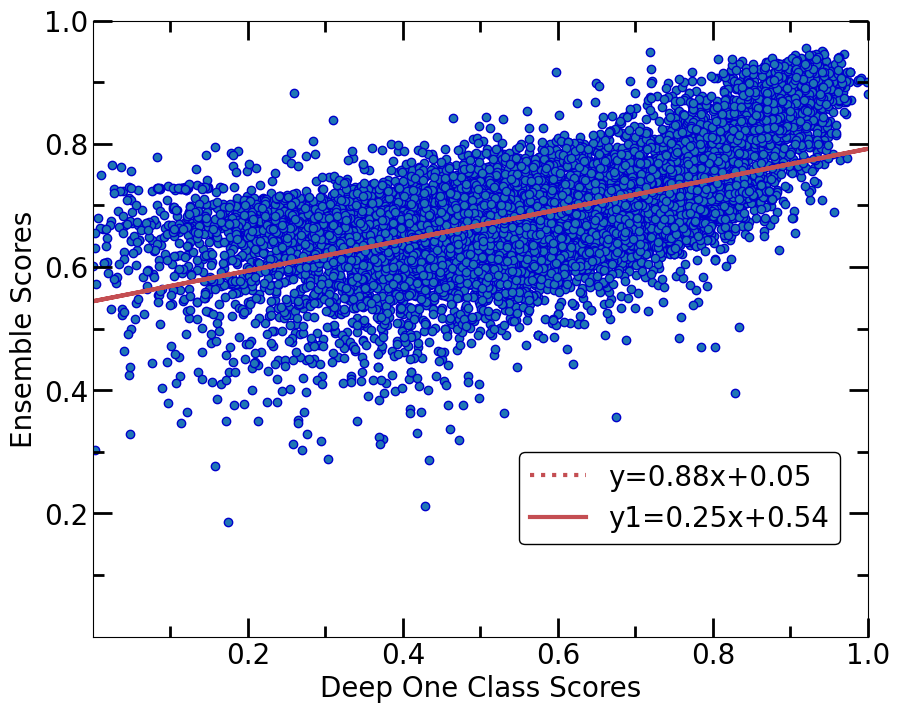

In [ ]:
from matplotlib import rc
import seaborn as sns
import matplotlib.font_manager
#plt.rcParams["font.weight"] = "light"
#plt.rcParams["axes.labelweight"] = "light"
plt.rcParams['axes.facecolor'] = 'white'


plt.style.use('default')
import matplotlib.font_manager
rcParams["font.weight"] = "normal"
rcParams["axes.labelweight"] = "normal"
rcParams['font.family'] = 'sans-serif'
rcParams["font.sans-serif"] = "Helvetica"
rcParams["axes.labelsize"] = "xx-large"
rcParams["axes.labelweight"]= "normal"
rcParams["xtick.labelsize"] = "xx-large"
rcParams["ytick.labelsize"] = "xx-large"
rcParams['axes.facecolor'] = 'white'
rcParams['axes.grid']=False

#fig = plt.figure(figsize=(10,8))
fig, ax = plt.subplots(figsize=(10,8))
rcParams["axes.edgecolor"] = "0.15"
rcParams["axes.linewidth"]  = 1.25

plt.scatter(data.deep, data.ens, edgecolors='#0000CC')
slope, intercept, r_value, p_value, std_err = stats.linregress( data.deep , data.ens)
line = slope*deep+intercept
#plt.plot(deep, line, 'r', linewidth=3.0, label='y={:.2f}x+{:.2f}'.format(slope,intercept))

#plt.legend(loc='lower right')

plt.grid(False)

plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('Deep One Class Scores', fontsize=20)
plt.ylabel('Ensemble Scores', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.rcParams['axes.spines.top'] = True
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = True
# this is an inset axes over the main axes
#a = plt.axes([.6, .15, .28, .28], facecolor='white')
#sns.regplot(x="deep", y="ens", data=data1, color='b',
 #line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept), 'color': 'red'})

#plt.scatter(data1.deep, data1.ens, edgecolors='#0000CC')
x= data1.deep
slope, intercept, r_value, p_value, std_err = stats.linregress( data1['deep'] ,data1['ens'])
line = slope*data.deep+intercept
#plt.plot(data.deep, line,  'r', linestyle='-', linewidth=3.0, dashes=(5, 2), label='y1={:.2f}x+{:.2f}'.format(slope,intercept))
plt.plot(tzaki[tzaki.deep > 0.7].deep,tzaki[tzaki.deep > 0.7].line, 'r-',  linewidth=3.0)
plt.plot(tzaki[tzaki.deep < 0.7].deep,tzaki[tzaki.deep < 0.7].line, 'r:',  linewidth=3.0, label='y={:.2f}x+{:.2f}'.format(slope,intercept))


slope, intercept, r_value, p_value, std_err = stats.linregress( data.deep , data.ens)
line = slope*deep+intercept
plt.plot(deep, line, 'r', linewidth=3.0, label='y1={:.2f}x+{:.2f}'.format(slope,intercept))

major_ticks_x = np.arange(0, 1.001, 0.2)
minor_ticks_x = np.arange(0, 1.001, 0.1)
major_ticks_y = np.arange(0, 1.001, 0.2)
minor_ticks_y = np.arange(0, 1.001, 0.1)
ax.tick_params(axis = 'both', which='both', width=2)
ax.tick_params(axis = 'both', which='major', length=14)
ax.tick_params(axis = 'both', which='minor', length=8, color='black')
ax.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction="in")
ax.set_xticks(major_ticks_x)
ax.set_xticks(minor_ticks_x, minor=True)
ax.set_yticks(major_ticks_y)
ax.set_yticks(minor_ticks_y, minor=True)
ax.xaxis.get_major_ticks()[0].draw = lambda *args:None
ax.yaxis.get_major_ticks()[0].draw = lambda *args:None
#plt.title('Probability')
#plt.xticks([])
#plt.yticks([])
plt.legend(prop={'size': 20}, loc=(0.55, 0.15), facecolor='white', edgecolor='black', framealpha=1 )
#plt.savefig('scatter1.png', dpi=600)